<a href="https://colab.research.google.com/github/ChaimaAraibi/Analyse-Videos/blob/main/Analyse_Video_Segmentation_Temporelle_et_Spatiale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1/ Load and read video

In [ ]:
#Capturing the video
import cv2
from google.colab.patches import cv2_imshow
cap = cv2.VideoCapture('video1-.mp4')

##2/ Display Video properties

In [ ]:
if cap.isOpened():
    # get cap property
    nb_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    print ("frames count:", nb_frames, ", height:", height, ", width:", width, ", fps:", fps)
else:
  print ("it's closed")


frames count: 144 , height: 576 , width: 320 , fps: 30


##3/ Show and store frames

frame number 15


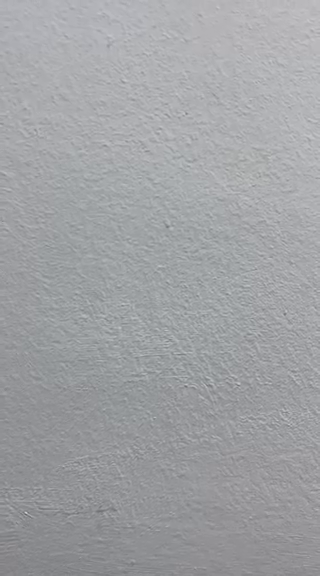

frame number 30


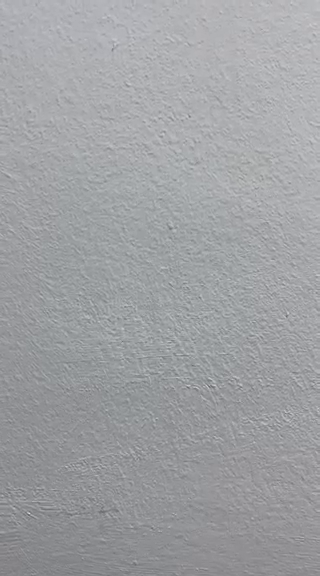

frame number 45


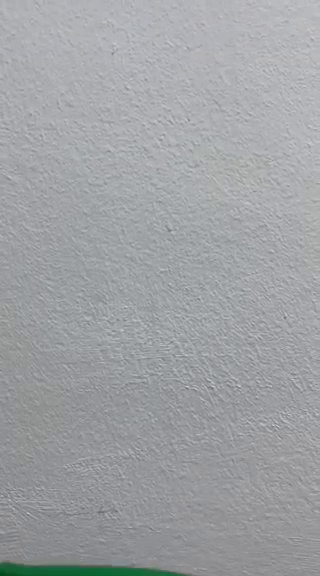

frame number 60


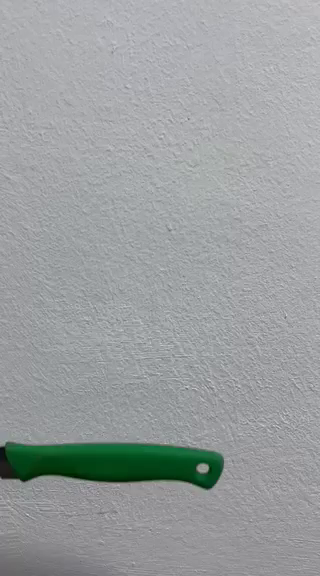

frame number 75


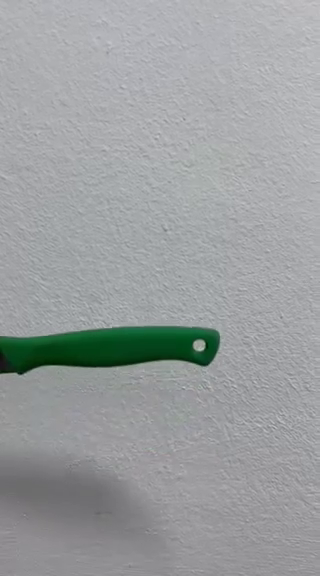

frame number 90


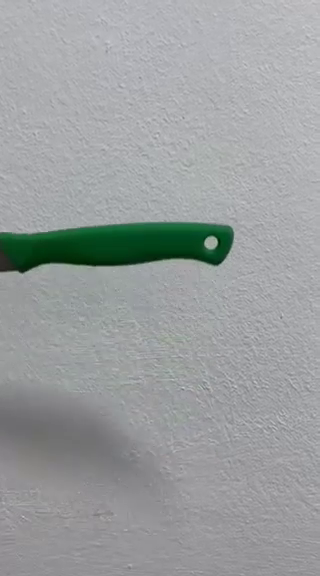

frame number 105


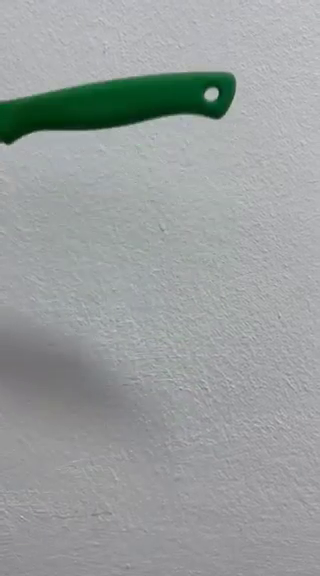

frame number 120


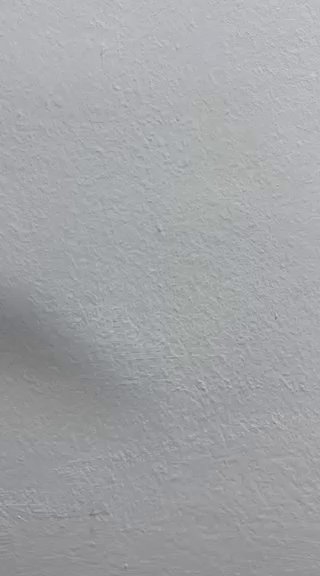

frame number 135


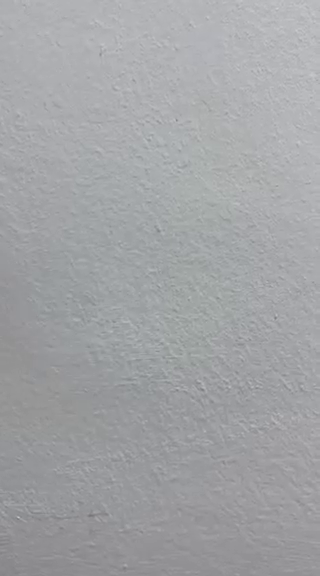

In [ ]:
import cv2
import os
import numpy as np

name_list = []
# Check if camera opened successfully
if (cap.isOpened()== False):
  print("Error opening video stream or file")
frame_counter = 0
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  while ret == True:
    frame_counter = frame_counter +1
    name = f'{frame_counter}.jpg'
    name_list.append(name)
    #cv2.imwrite(name, frame)
    cv2.imwrite(name,frame)
    ret, frame = cap.read()
    if (frame_counter % 15 == 0):
      print ("frame number", frame_counter)
      cv2_imshow(frame)
    # Press Q on keyboard to  exit
    if cv2.waitKey(50) & 0xFF == ord('q'):
      break

  # Break the loop
  else:
    break

# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

##Show Gray Scaled Frames

In [ ]:
for frame in name_list:
  src = cv2.imread(frame)
  # Window name in which image is displayed
  window_name = 'Image'

  # Using cv2.cvtColor() method
  # Using cv2.COLOR_BGR2GRAY color space
  # conversion code
  image = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY )

  # Displaying the image
  cv2_imshow( image)


##Transforming the frames to a video

In [ ]:
def toVideo(name_list,video_name):
  frameSize = (320, 576)
  out = cv2.VideoWriter(video_name,cv2.VideoWriter_fourcc(*'DIVX'), 30, frameSize)
  for filename in name_list:
    img = cv2.imread(filename)
    out.write(img)

  out.release()

##**Segmentation Spatiale**

## Heuristic Thresholding

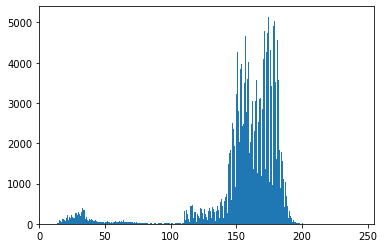

In [ ]:
# plot 1 image hitogram
import matplotlib.pyplot as plt
import cv2
im = cv2.imread('90.jpg')
# calculate mean value from RGB channels and flatten to 1D array
vals = im.mean(axis=2).flatten()
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

In [ ]:
# algorthme de seuillage heuristique
import numpy as np
import cv2
from IPython.core.display import Image

def seg_heur(image, T0):
  G1 = []
  G2 = []
  T1 = T0/2
  while abs(T1-T0)>5:
    T1=T0
    ret,thresh = cv2.threshold(image,T0,255,cv2.THRESH_BINARY)
    for i in range (thresh.shape[0]): #traverses through height of the thresh
        for j in range (thresh.shape[1]): #traverses through width of the thresh
            if thresh[i][j] < T0:
              G1.append(image[i][j])
            else:
              G2.append(image[i][j])
    m1 = np.mean(G1)
    m2 = np.mean(G2)
    T0=(m1+m2)/2

  print (T0)
  return T0



In [ ]:
#try diffrent T0s on the image
src = cv2.imread("90.jpg")
image = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY )
T01=seg_heur(image, 63)
T02=seg_heur(image, 127)
T03=seg_heur(image, 200)


103.19495546131657
119.29400159337638
165.68764823522062


In [ ]:
ret,thresh1 = cv2.threshold(image,T01,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(image,T02,255,cv2.THRESH_BINARY)
ret,thresh3 = cv2.threshold(image,T03,255,cv2.THRESH_BINARY)

Text(0.5, 1.0, 'T03=165.68')

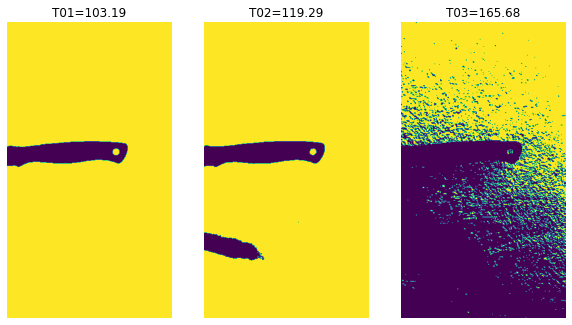

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 3
fig.add_subplot(rows, columns, 1)
plt.imshow(thresh1)
plt.axis('off')
plt.title("T01=103.19")
fig.add_subplot(rows, columns, 2)
plt.imshow(thresh2)
plt.axis('off')
plt.title("T02=119.29")
fig.add_subplot(rows, columns, 3)
plt.imshow(thresh3)
plt.axis('off')
plt.title("T03=165.68")

**Interprétations**:
L'algorithme de seuillage heuristique depend fortement du seuil initial. Initialisé à 127 et 200 l'algorithme s'approche du seuil optimal (qui devrait être legerement supérieur à  100, d’après l'histogramme de l'image) mais s’arrête sur des minimum locaux (119 et 165).

## Otsu Thresholding

Obtained threshold:  105.0


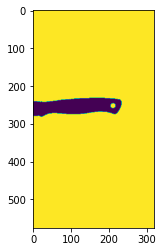

In [ ]:
#otsu
src = cv2.imread("90.jpg")
image = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY )
otsu_threshold, image_result = cv2.threshold(
image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print("Obtained threshold: ", otsu_threshold)
plt.imshow(image_result)

In [ ]:
list_otsu=[]
for frame in name_list:
  src = cv2.imread(frame)
  # Window name in which image is displayed
  window_name = 'Image'

  # Using cv2.cvtColor() method
  # Using cv2.COLOR_BGR2GRAY color space
  # conversion code
  image = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY )
  otsu_threshold, image_result = cv2.threshold(
  image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  name = f'{frame}otsu.jpg'
  list_otsu.append(name)
  cv2.imwrite(name,image_result)
  # Displaying the image
  #cv2_imshow( image)
print(list_otsu)

['1.jpgotsu.jpg', '2.jpgotsu.jpg', '3.jpgotsu.jpg', '4.jpgotsu.jpg', '5.jpgotsu.jpg', '6.jpgotsu.jpg', '7.jpgotsu.jpg', '8.jpgotsu.jpg', '9.jpgotsu.jpg', '10.jpgotsu.jpg', '11.jpgotsu.jpg', '12.jpgotsu.jpg', '13.jpgotsu.jpg', '14.jpgotsu.jpg', '15.jpgotsu.jpg', '16.jpgotsu.jpg', '17.jpgotsu.jpg', '18.jpgotsu.jpg', '19.jpgotsu.jpg', '20.jpgotsu.jpg', '21.jpgotsu.jpg', '22.jpgotsu.jpg', '23.jpgotsu.jpg', '24.jpgotsu.jpg', '25.jpgotsu.jpg', '26.jpgotsu.jpg', '27.jpgotsu.jpg', '28.jpgotsu.jpg', '29.jpgotsu.jpg', '30.jpgotsu.jpg', '31.jpgotsu.jpg', '32.jpgotsu.jpg', '33.jpgotsu.jpg', '34.jpgotsu.jpg', '35.jpgotsu.jpg', '36.jpgotsu.jpg', '37.jpgotsu.jpg', '38.jpgotsu.jpg', '39.jpgotsu.jpg', '40.jpgotsu.jpg', '41.jpgotsu.jpg', '42.jpgotsu.jpg', '43.jpgotsu.jpg', '44.jpgotsu.jpg', '45.jpgotsu.jpg', '46.jpgotsu.jpg', '47.jpgotsu.jpg', '48.jpgotsu.jpg', '49.jpgotsu.jpg', '50.jpgotsu.jpg', '51.jpgotsu.jpg', '52.jpgotsu.jpg', '53.jpgotsu.jpg', '54.jpgotsu.jpg', '55.jpgotsu.jpg', '56.jpgotsu.jpg', 

In [ ]:
toVideo(list_otsu,"otsu_output.mp4")

**Interprétations**: le résultat d'otsu est plus optimal et n'est atteint par la méthode heuristique qu'avec une bonne initialisation

##**Segmentation temporelle**

## Frame Subtraction

In [ ]:
def nframes_sub(n,namelist,s):
  frame_counter = 0
  for nbf in range (nb_frames - n):
    frame_counter = frame_counter +1
    diff = abs(cv2.imread(name_list[nbf+n]) -  cv2.imread(name_list[nbf]))
    diff_thresh = (diff < otsu_threshold) * diff
    name = f'{s + str(frame_counter)}.jpg'
    namelist.append(name)
    cv2.imwrite(name,diff_thresh)
    cv2_imshow(diff_thresh)

In [ ]:
n1_list=[]
nframes_sub(1,n1_list,"1N")
toVideo(n1_list,"N1.mp4")

In [ ]:
n2_list=[]
nframes_sub(2,n2_list,"2N")
toVideo(n2_list,"N2.mp4")

In [ ]:
n3_list=[]
nframes_sub(3,n3_list,"3N")
toVideo(n3_list,"N3.mp4")

**Interprétations:**


**N1** Le changement qui se passe un frame N et un frane N+1 n'est pas assez important pour détecter l'interieur de l'objet (vue q'il y aura as de changement de couleur dans la surface intérieur). Par conséquent seul le contour de notre objet est soustrait du background.

**N2** La soustraction de deux frames montre de meilleur de resultats. L’intérieur de l'objet est pris en compte.

**N3** Dans ce cas le changement entre un frame N et un frame N+3 est parfois assez grand de façon à détecter l'objet deux fois (l'absence de sa position initiale et son nouvelle apparition)

## Adaptive Background Substraction

In [ ]:
def adaptive_sub(alpha):
  I=cv2.imread(name_list[1])
  B=cv2.imread(name_list[0])
  for nbf in range (nb_frames - 1):
    diff = abs(I - B)
    diff_thresh = (diff < otsu_threshold) * diff
    I = cv2.imread(name_list[nbf+1])
    B = alpha*I + (1-alpha)*cv2.imread(name_list[nbf])
    cv2_imshow(diff_thresh)


In [ ]:
adaptive_sub(0.5)

**Intérpretations**: Pour des valeurs de alpha proche de 0 cette methode fonctionne comme la soustraction de 1 frame. Pour des valeurs de alpha proche de 1 l'incorporation du frame N+1 est tres importante dans la soustraction N.

Dans notre cas, Alpha = 0.5 donne une meilleur extraction du background par rapport à la soustraction 1 frame précédente. Mais, la detection de l’intérieur de l'objet reste limitée.

GMG

In [ ]:
! pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


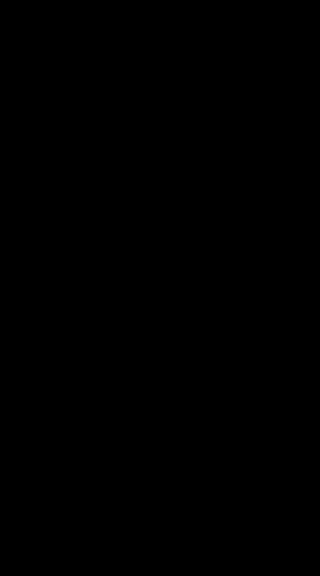

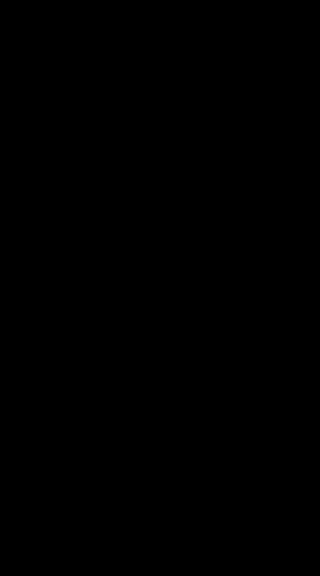

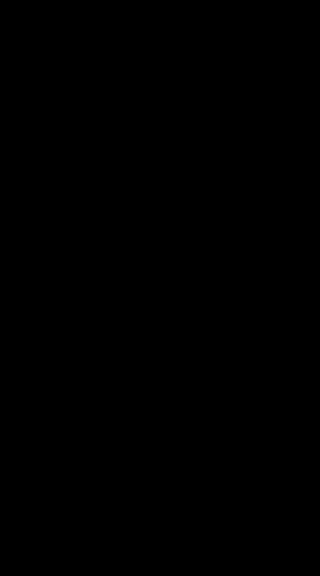

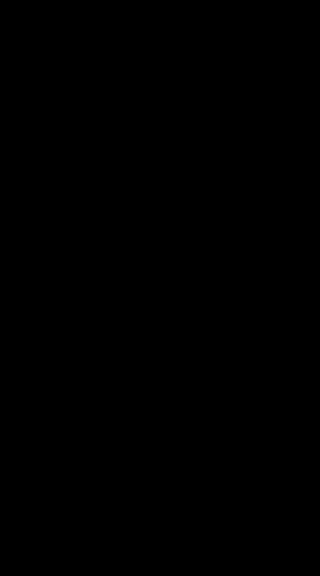

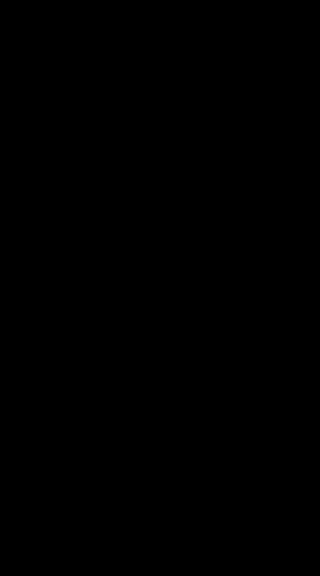

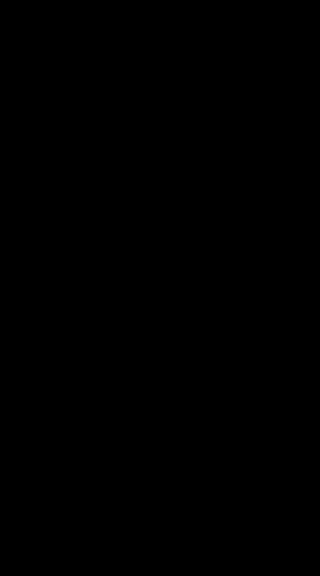

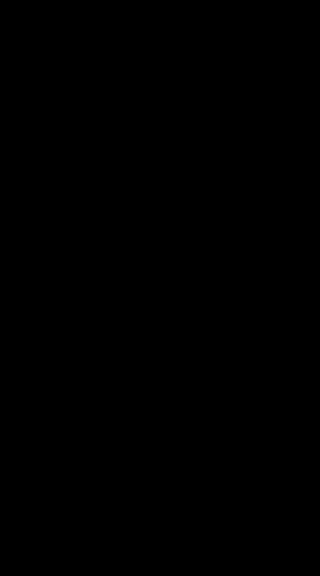

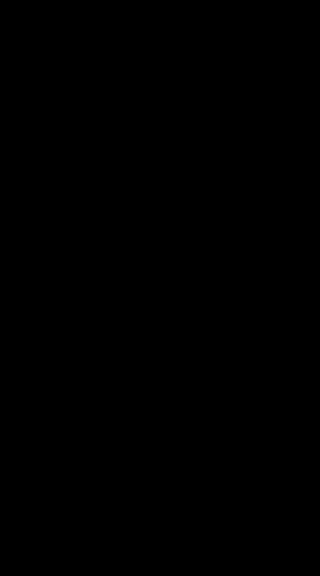

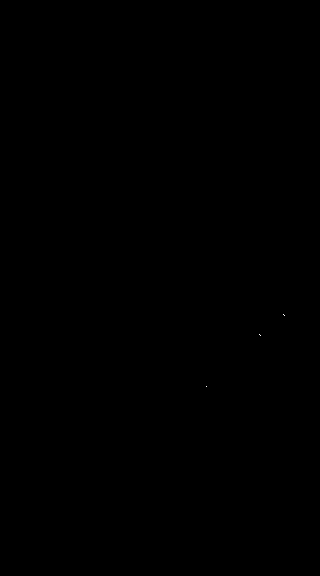

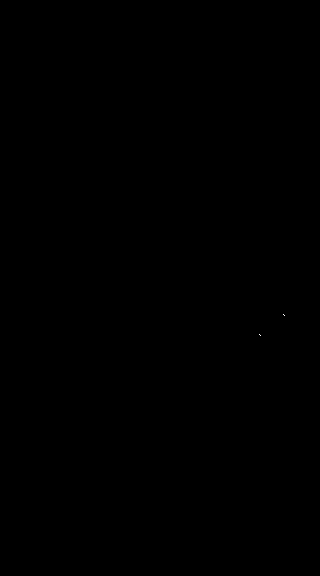

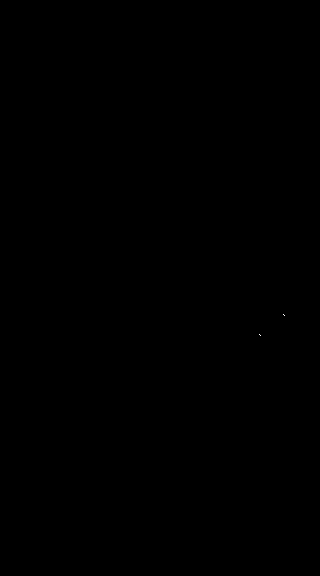

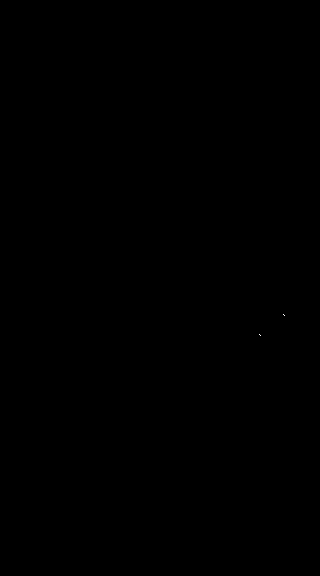

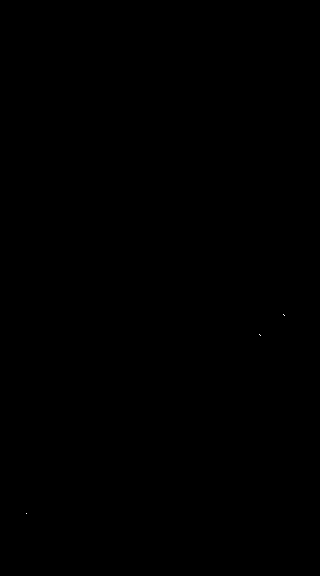

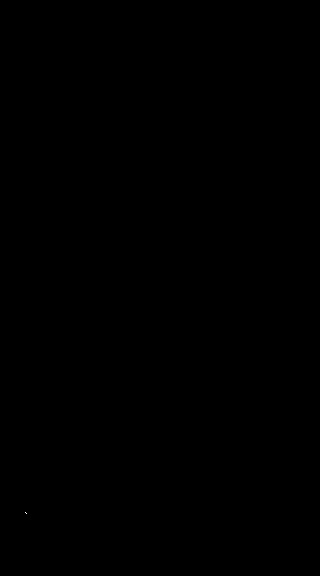

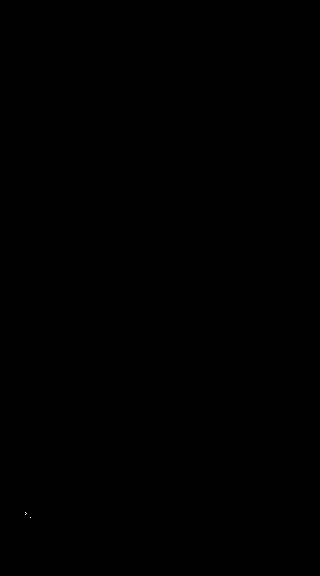

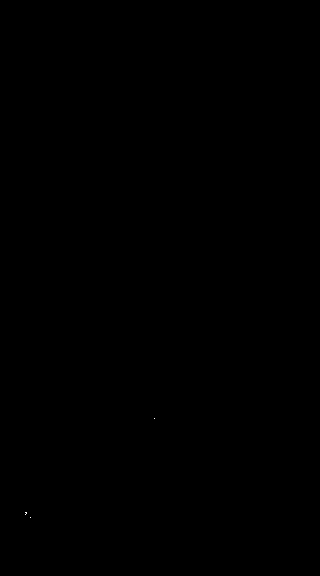

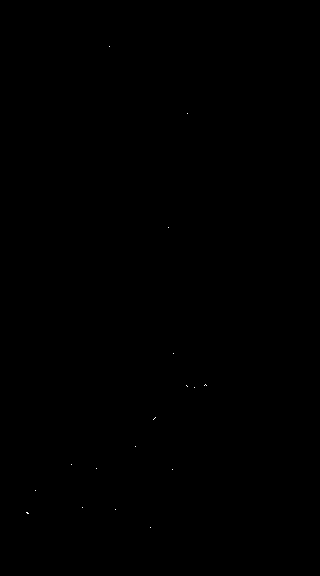

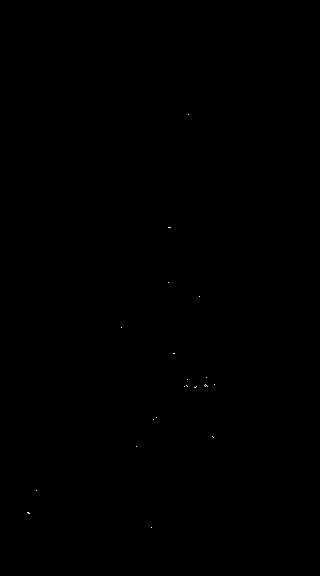

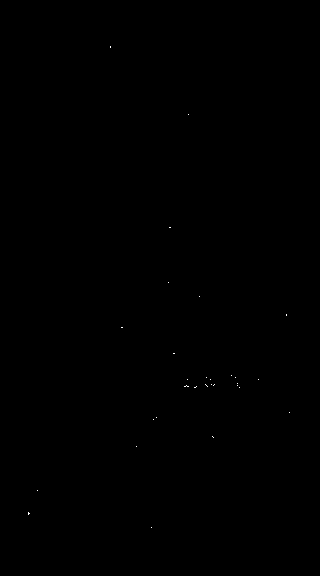

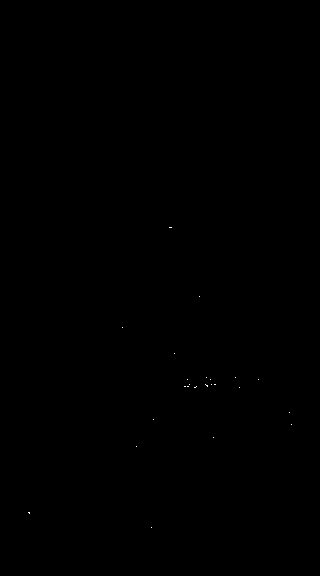

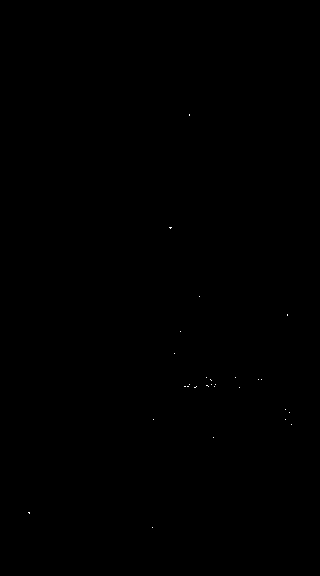

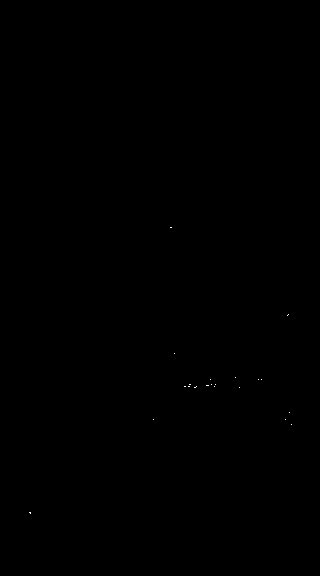

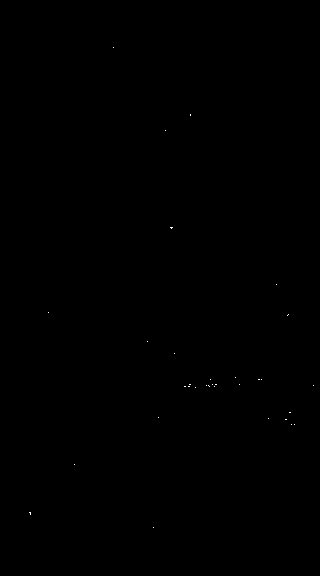

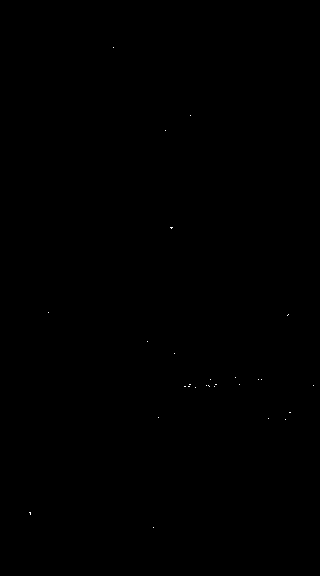

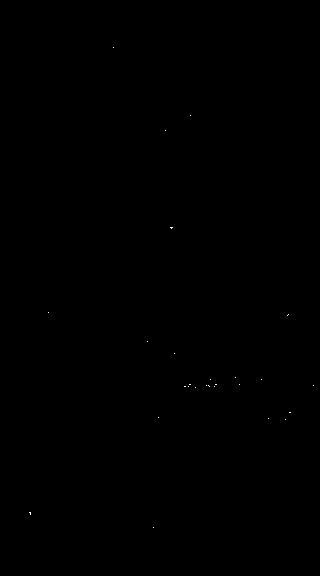

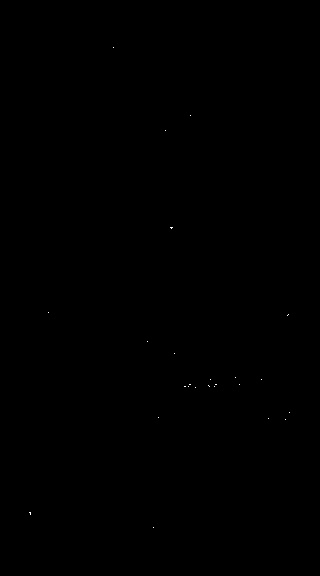

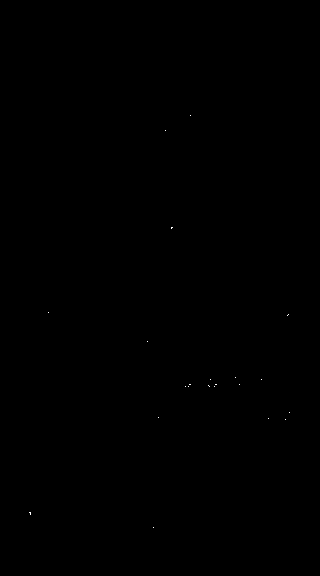

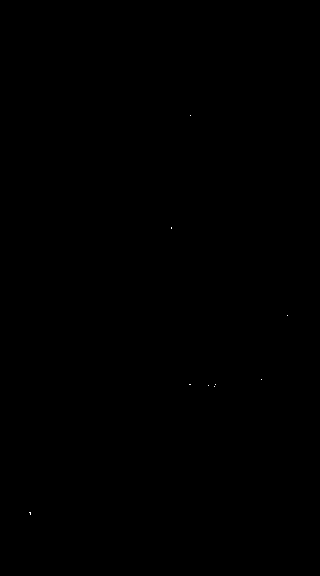

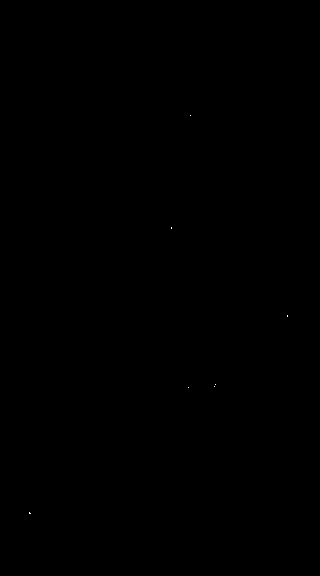

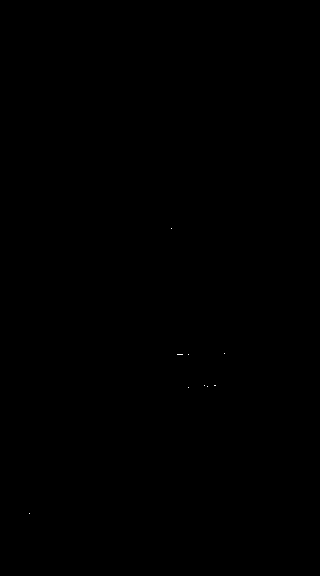

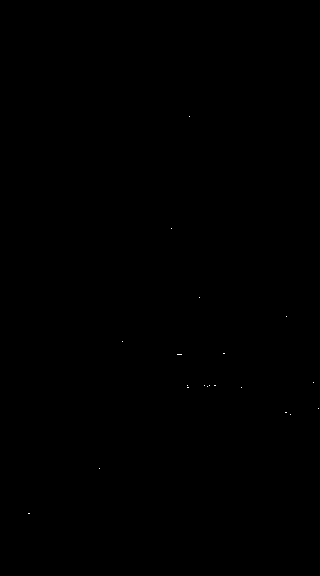

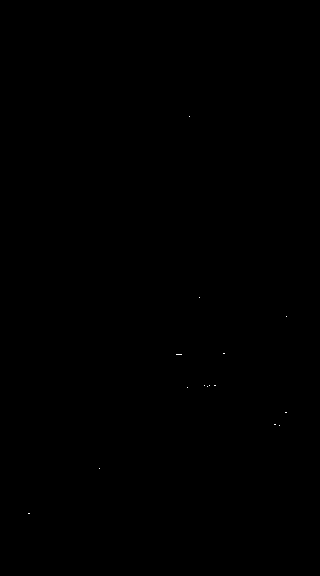

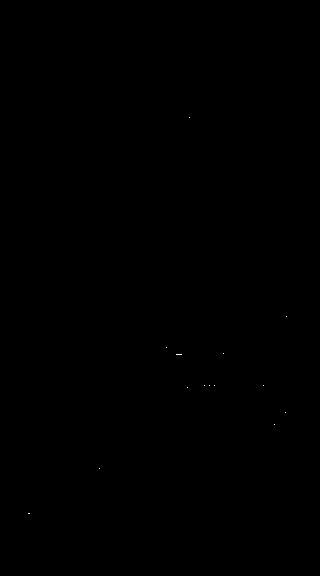

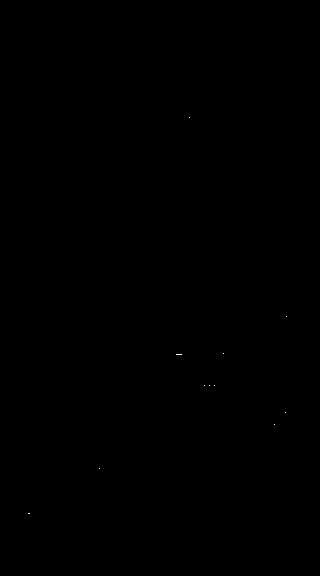

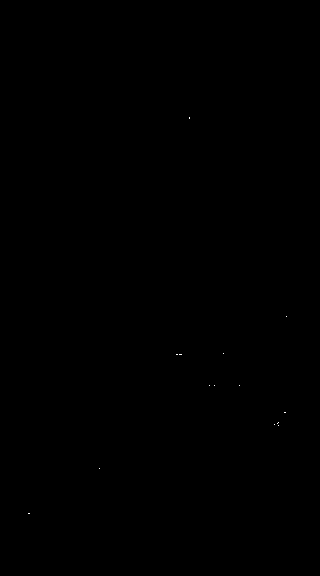

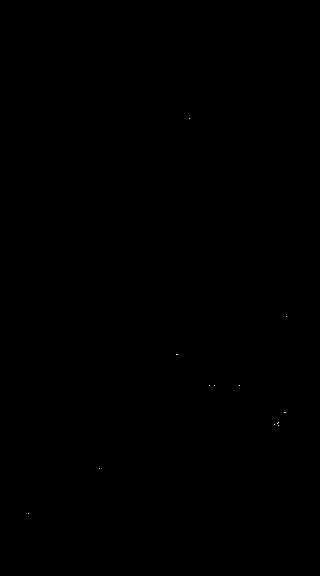

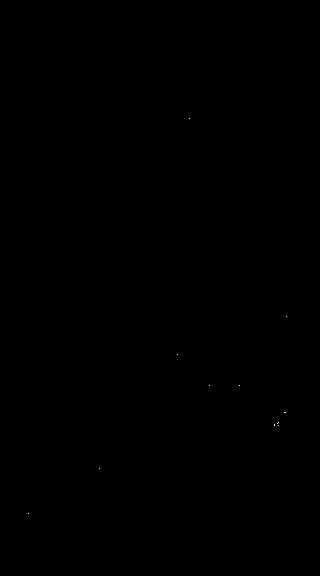

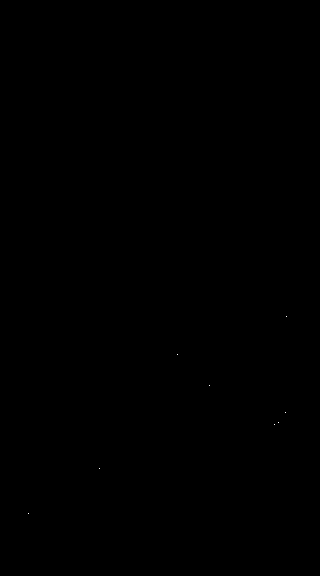

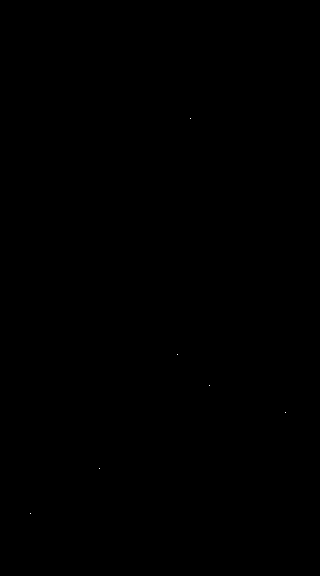

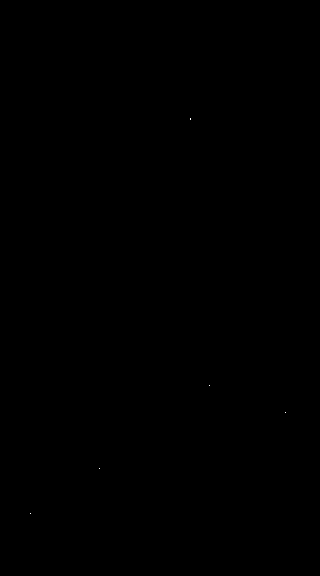

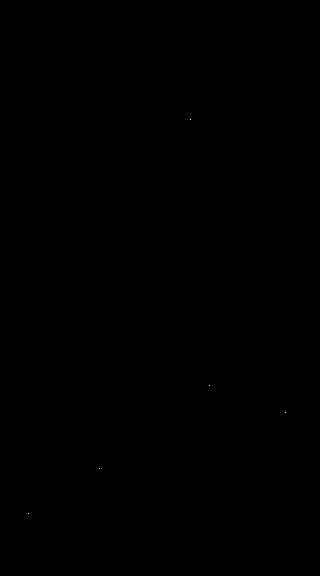

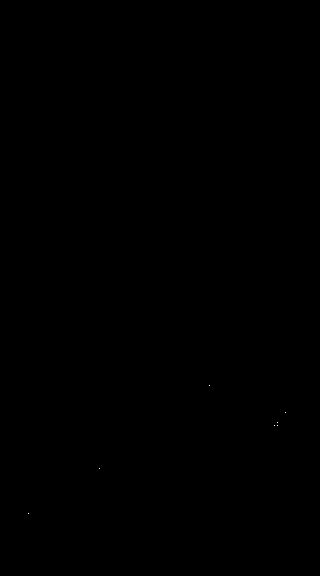

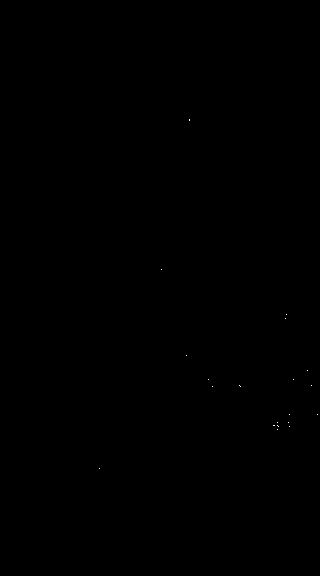

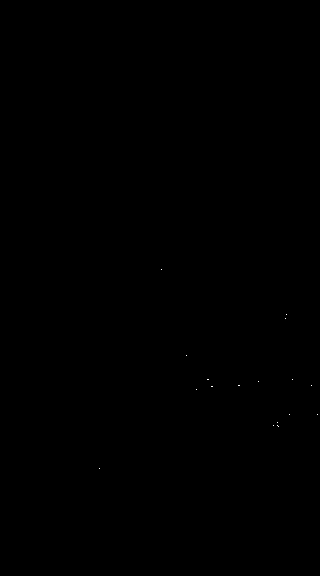

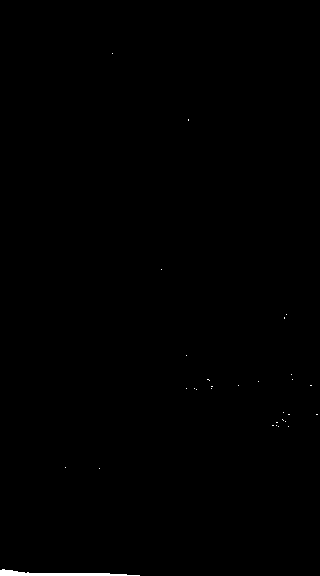

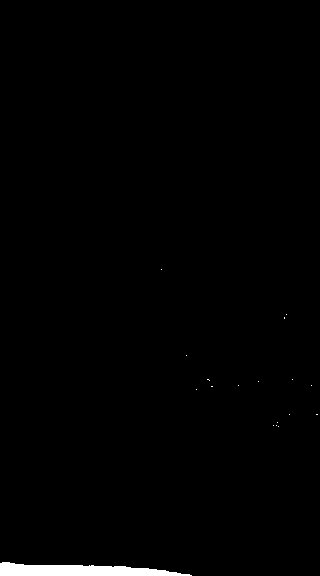

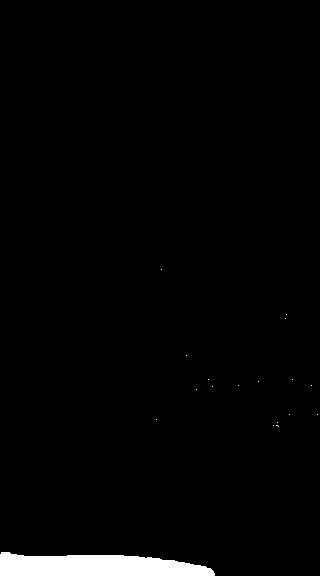

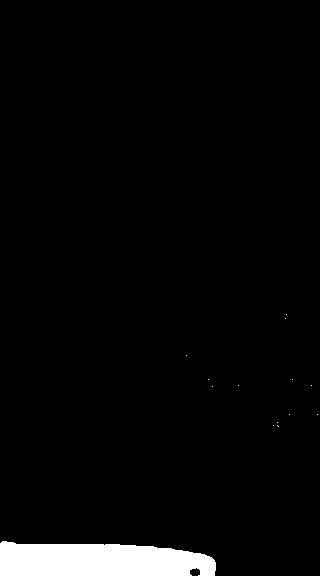

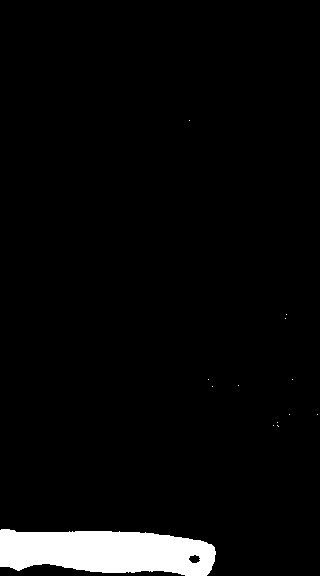

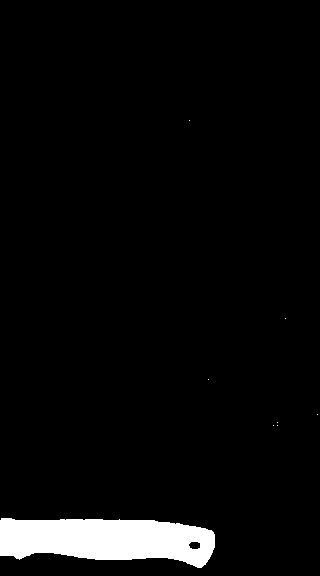

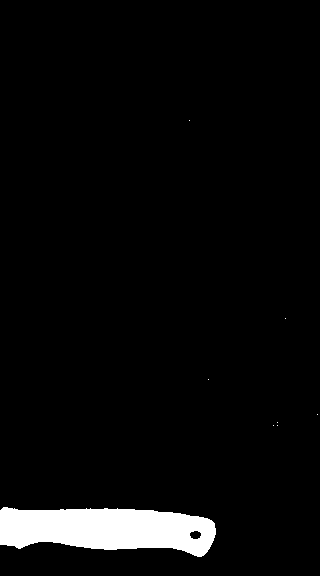

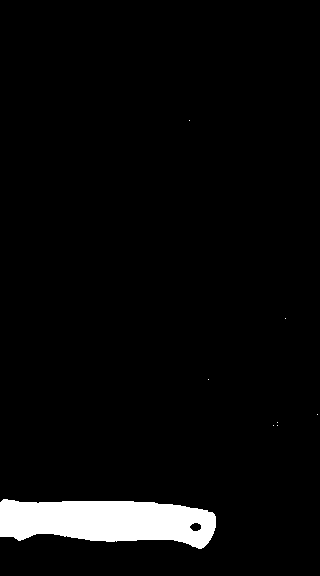

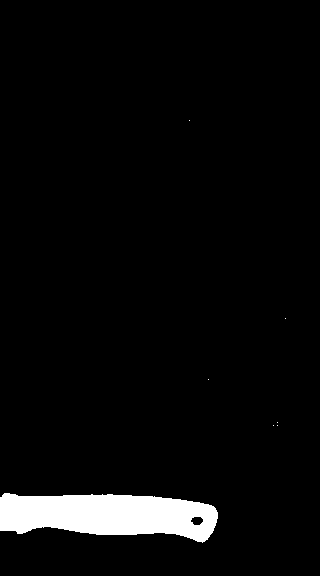

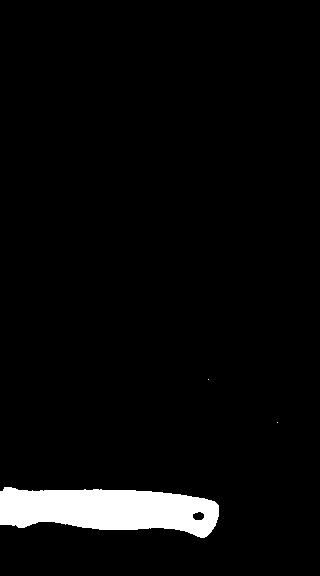

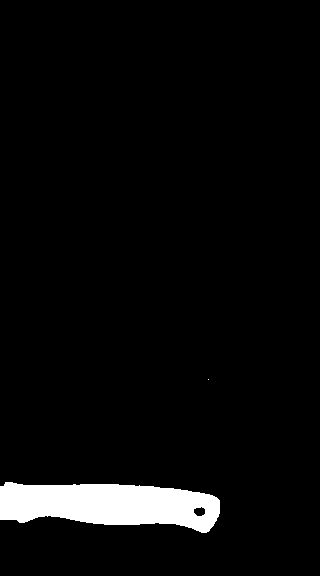

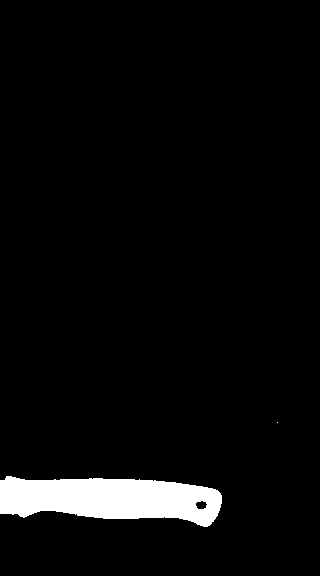

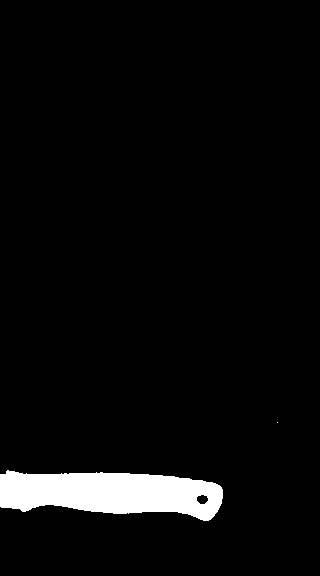

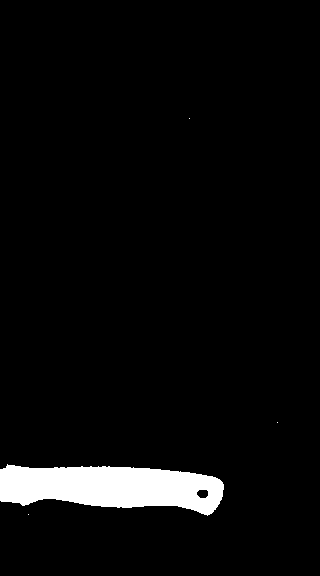

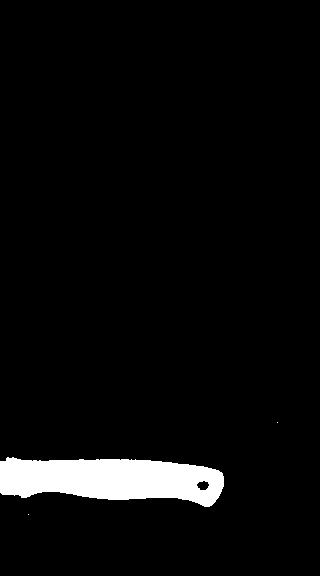

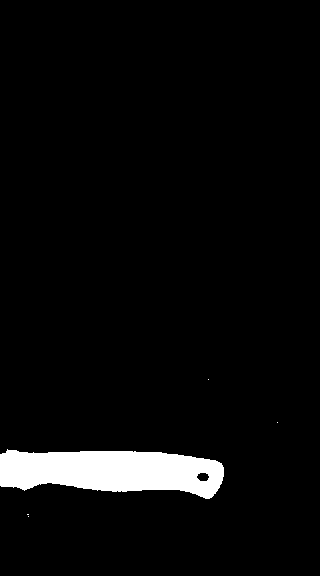

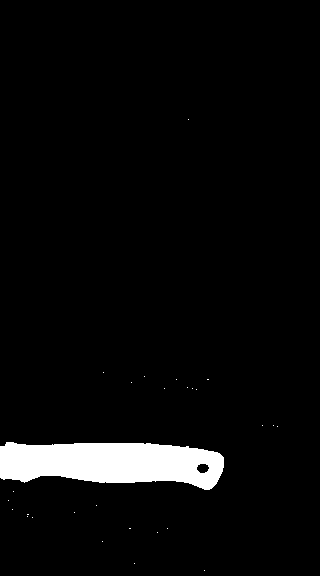

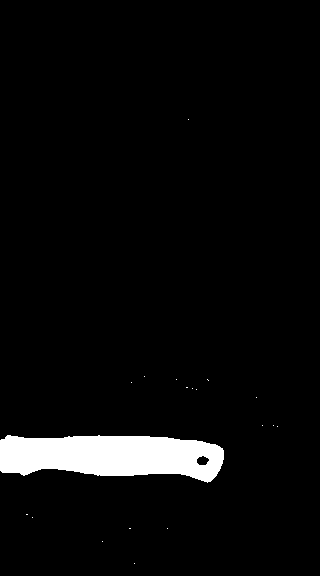

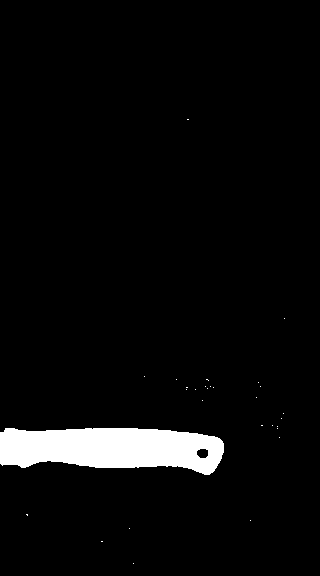

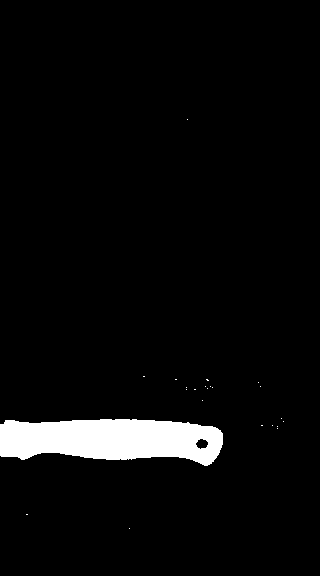

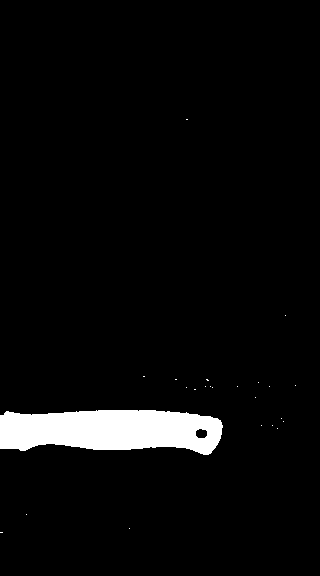

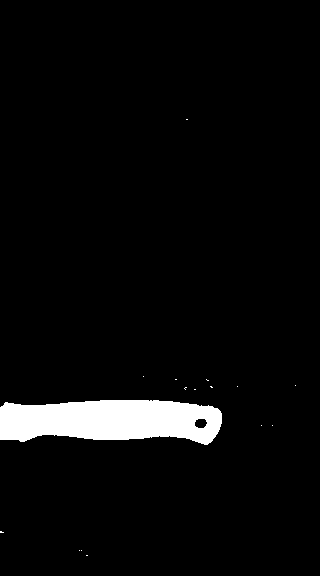

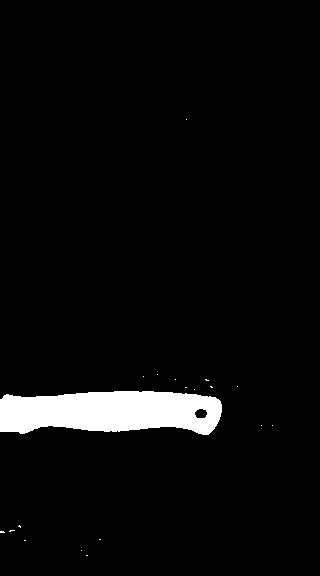

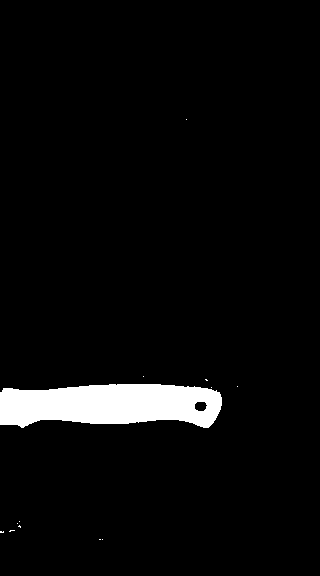

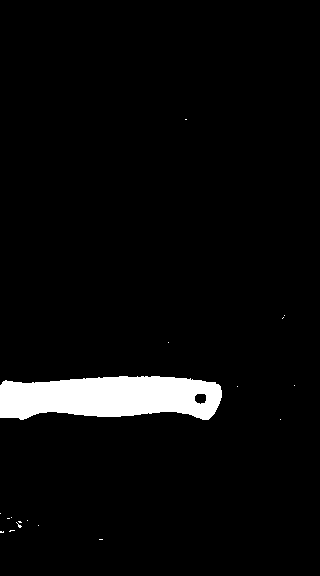

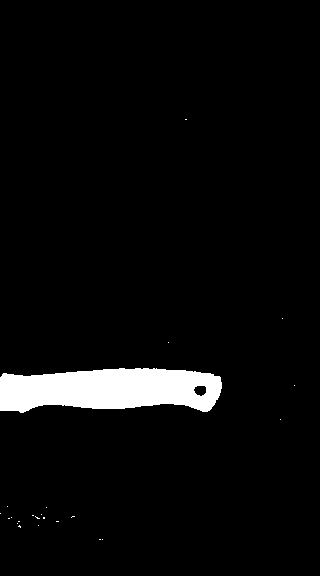

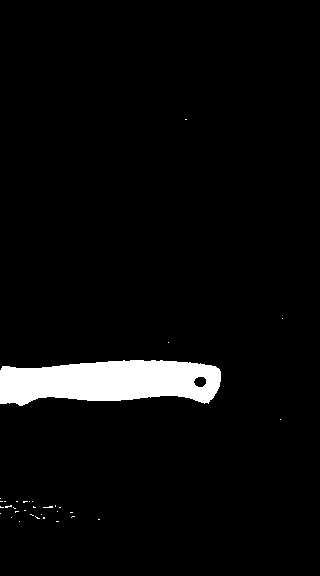

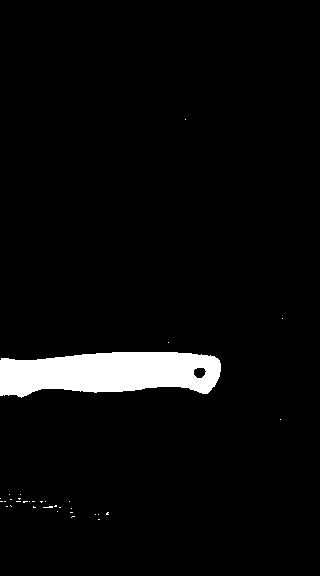

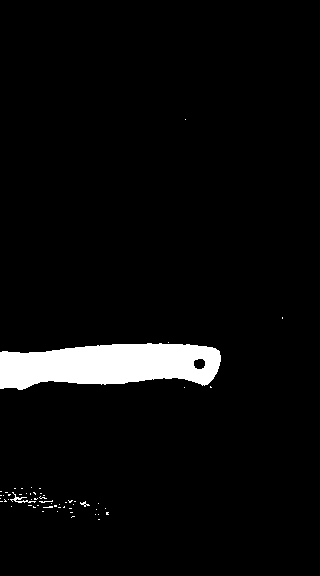

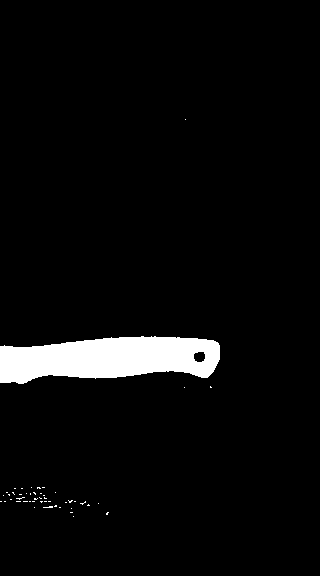

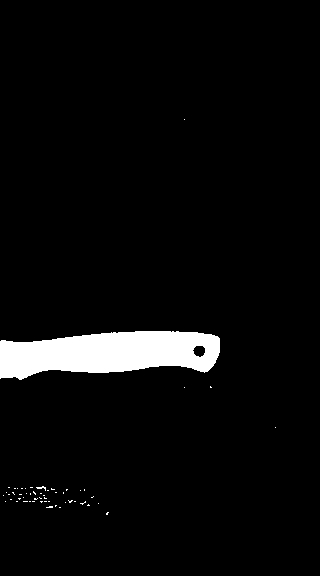

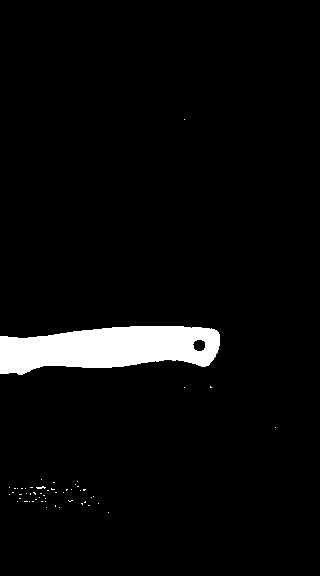

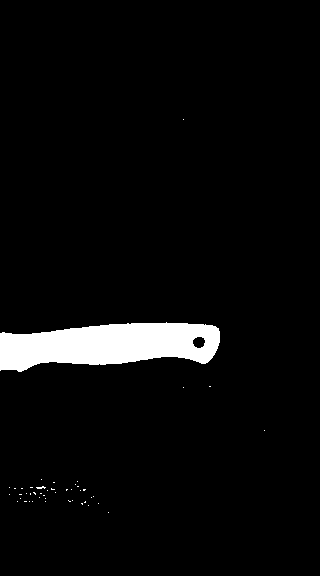

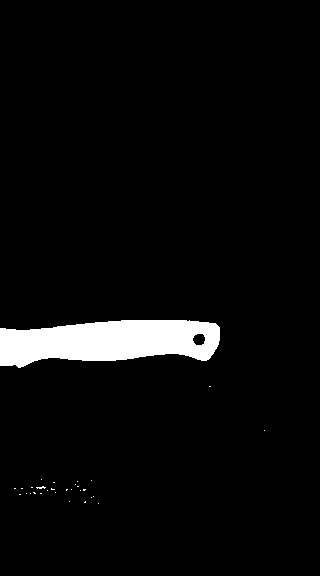

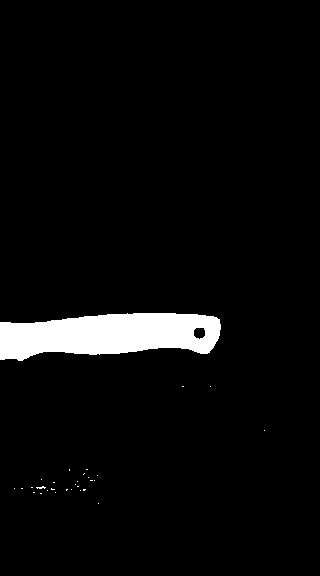

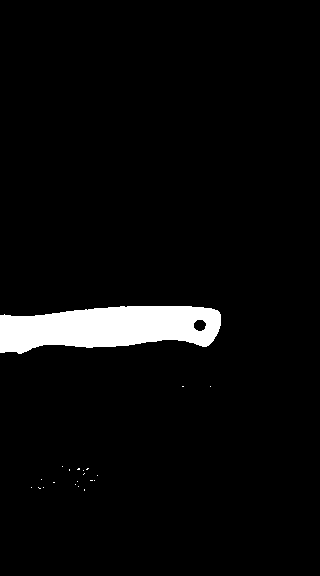

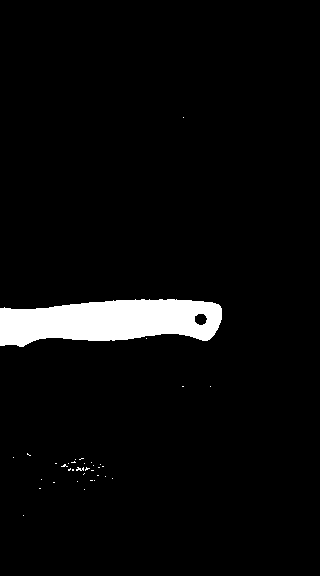

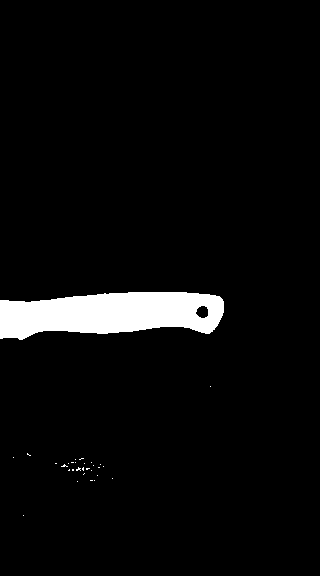

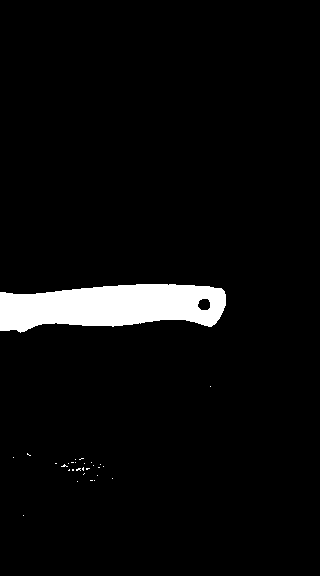

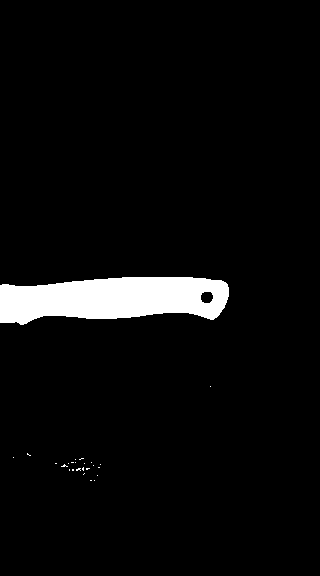

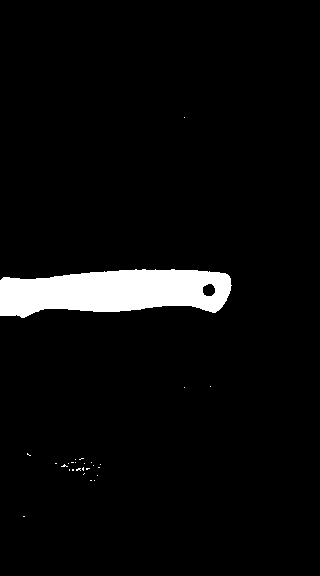

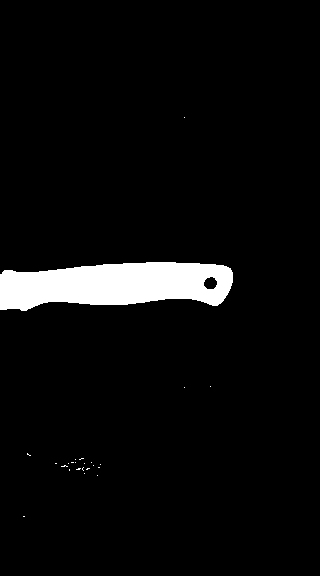

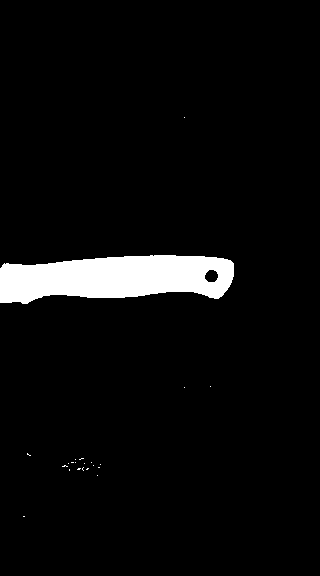

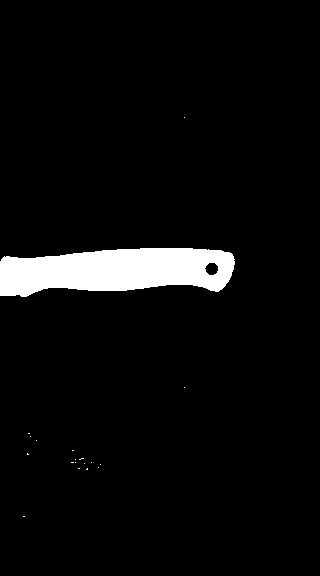

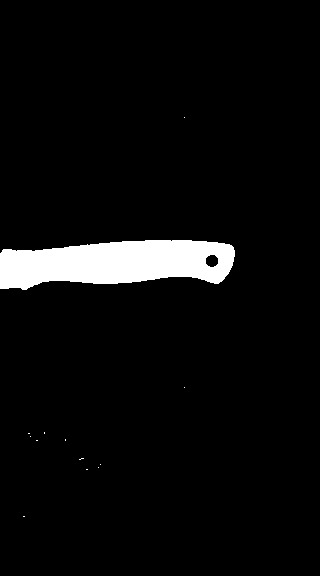

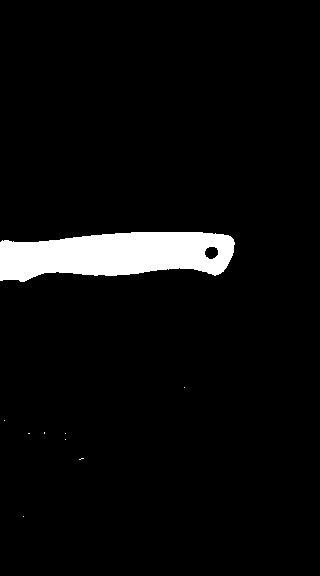

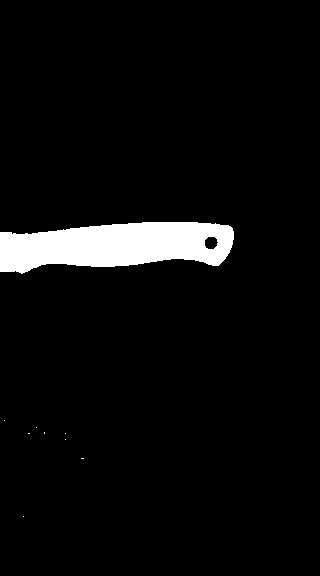

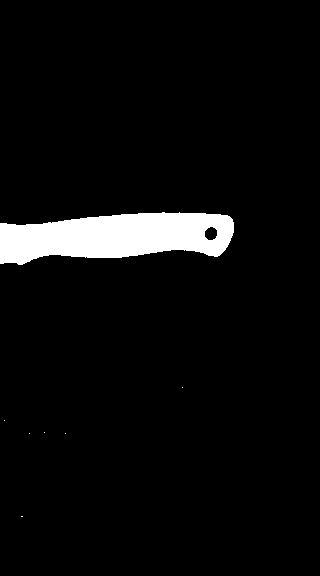

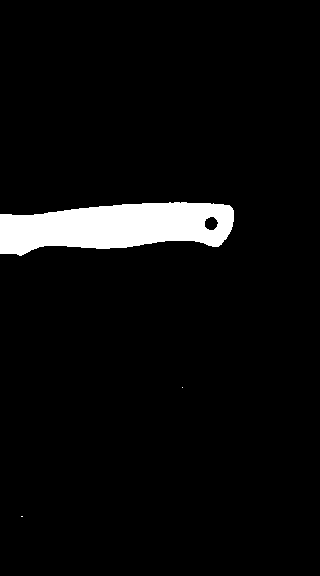

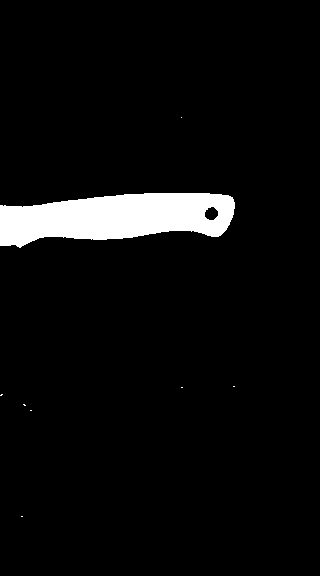

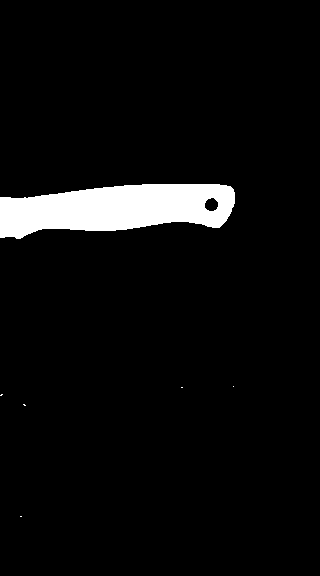

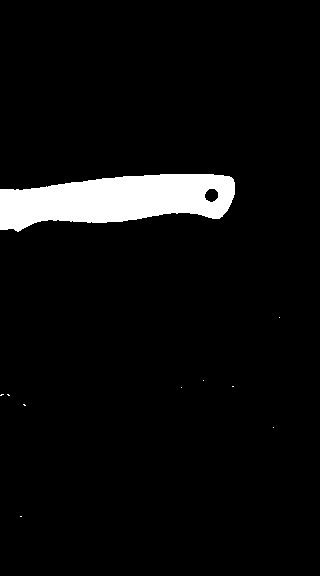

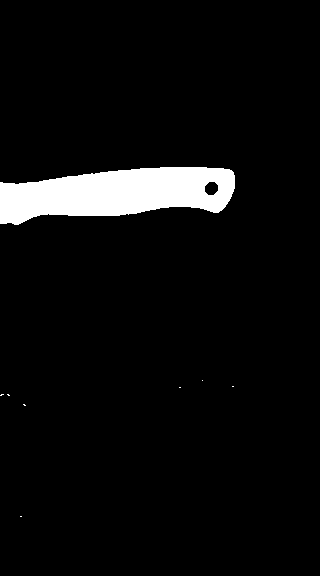

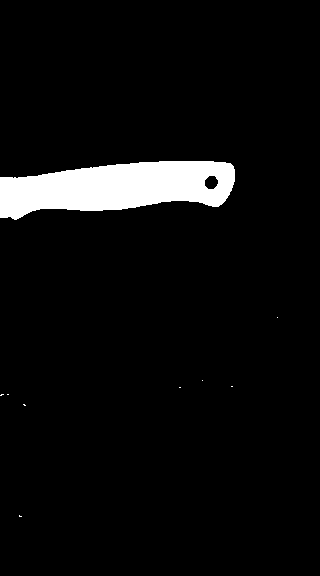

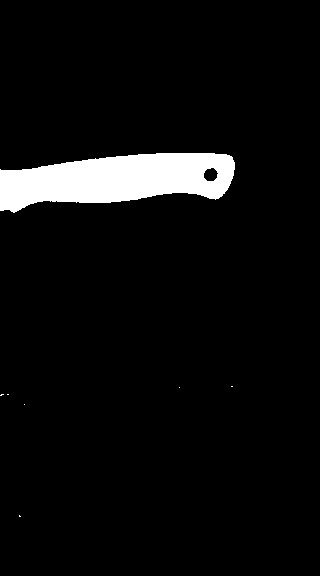

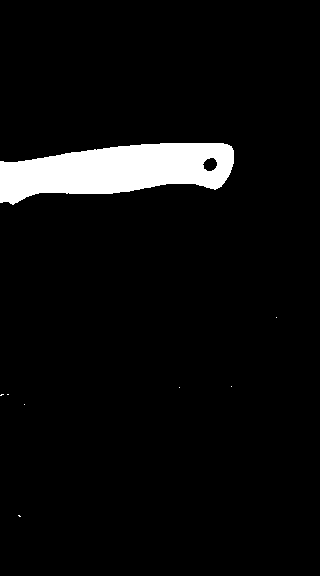

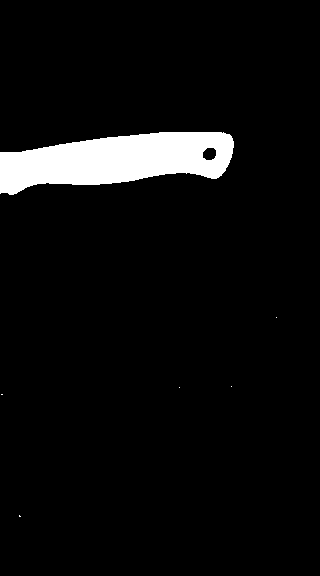

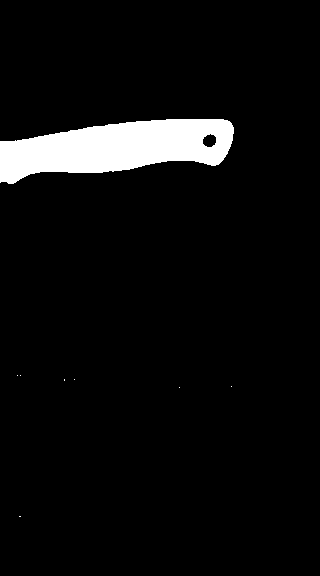

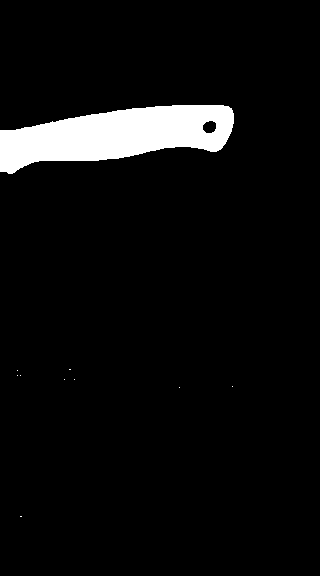

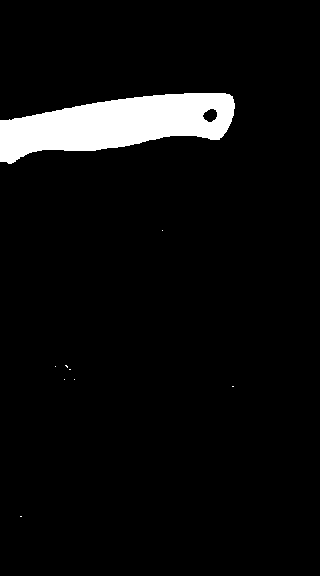

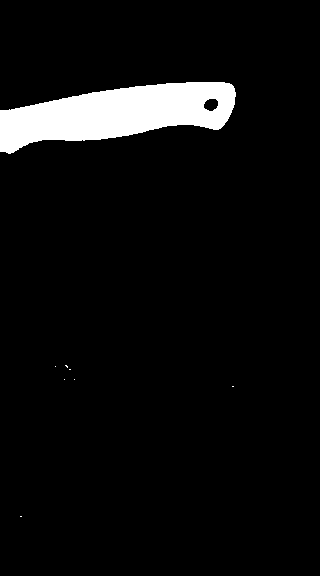

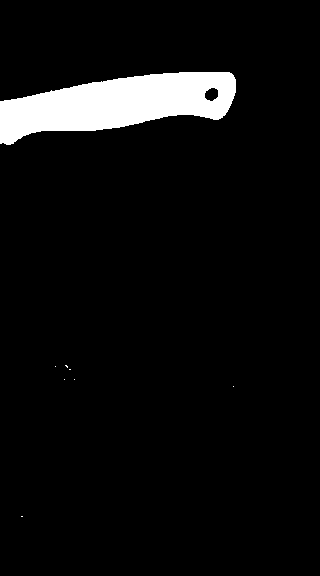

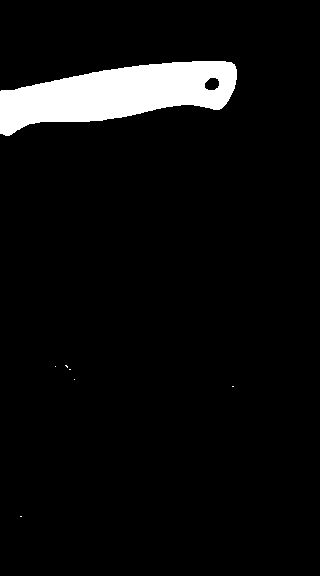

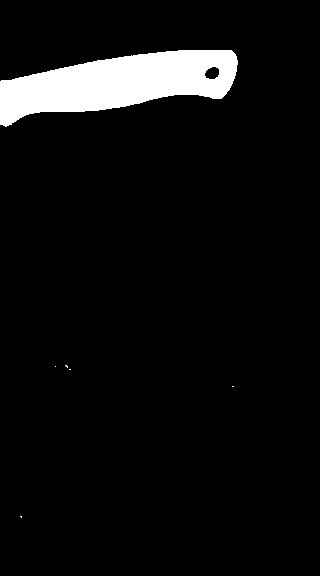

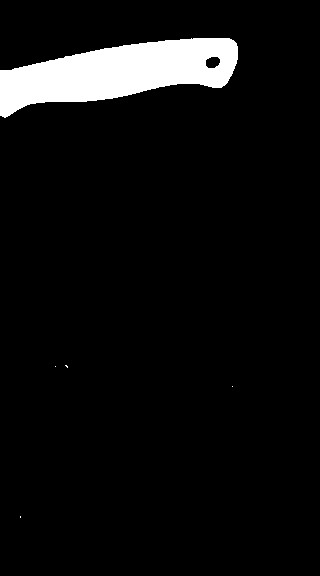

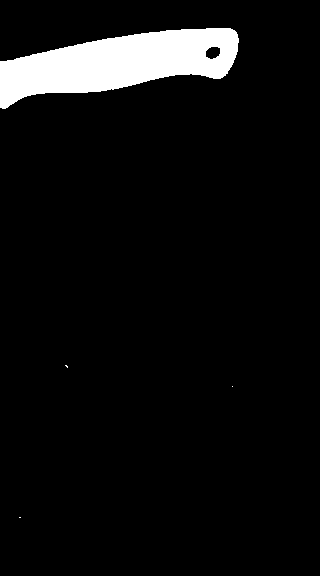

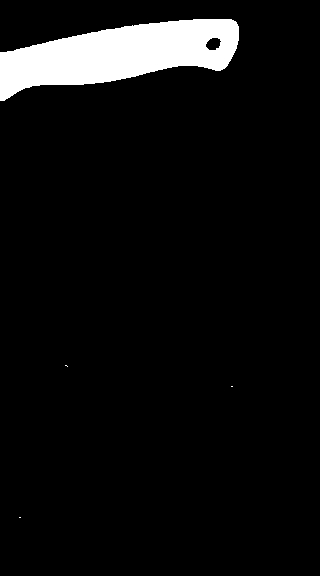

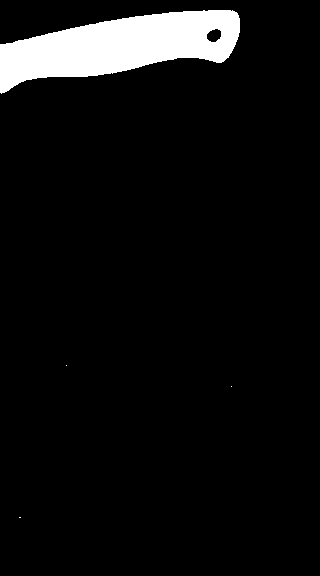

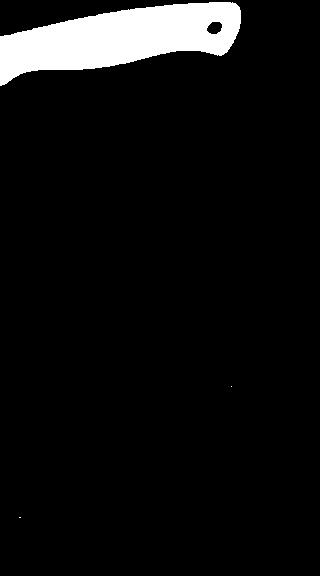

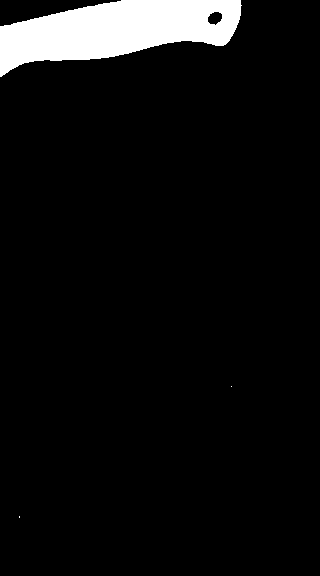

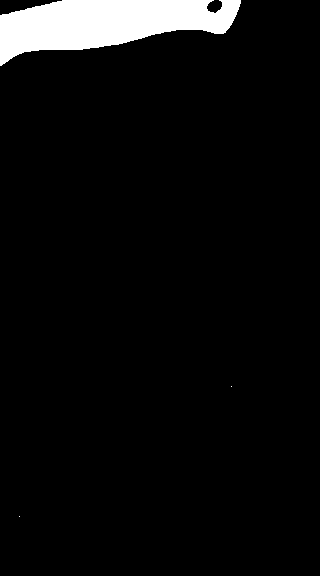

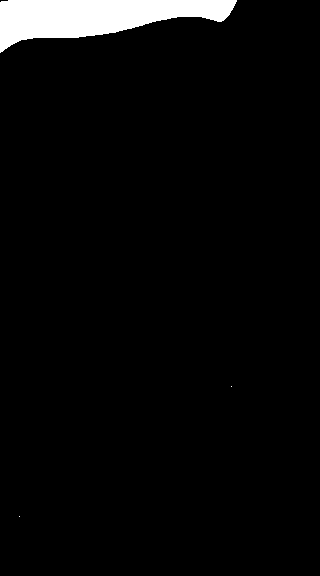

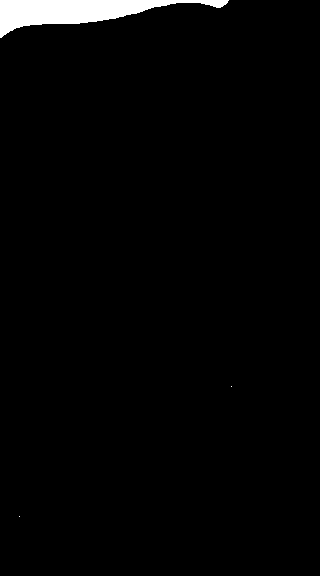

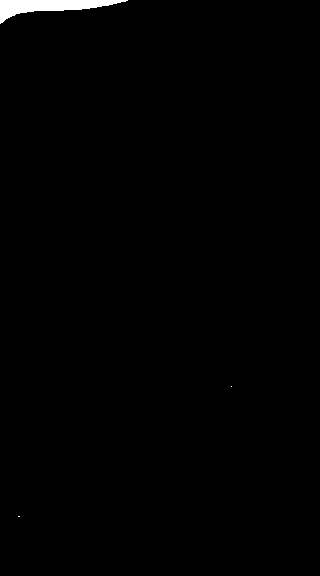

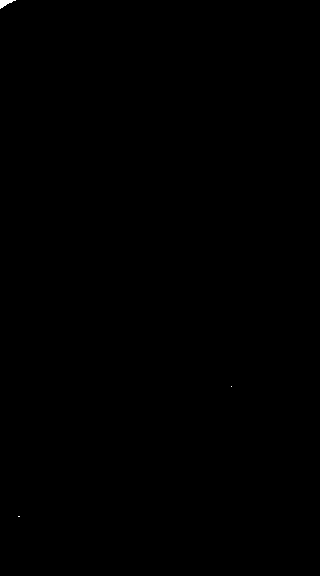

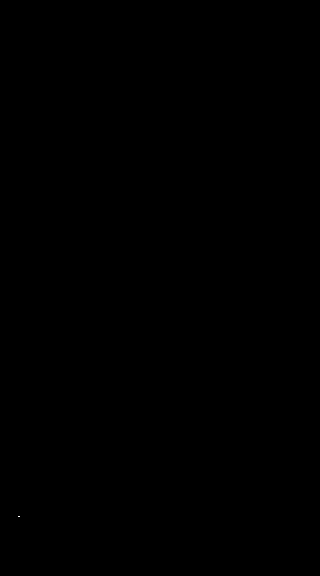

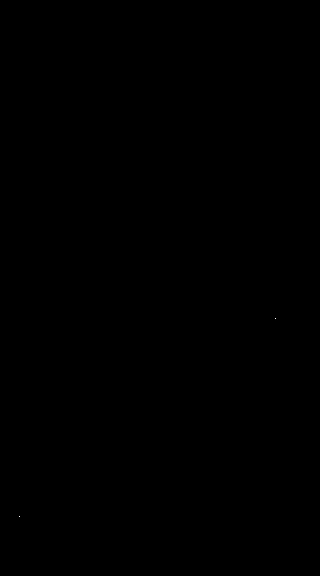

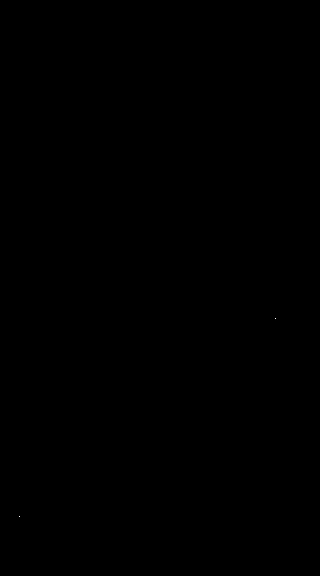

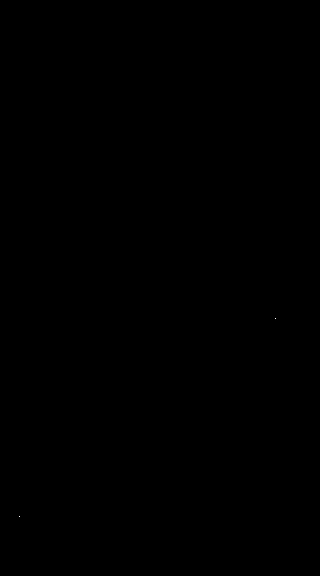

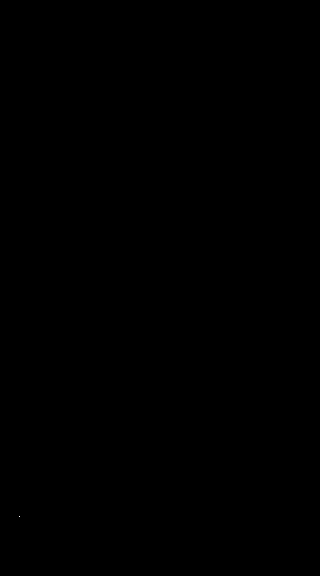

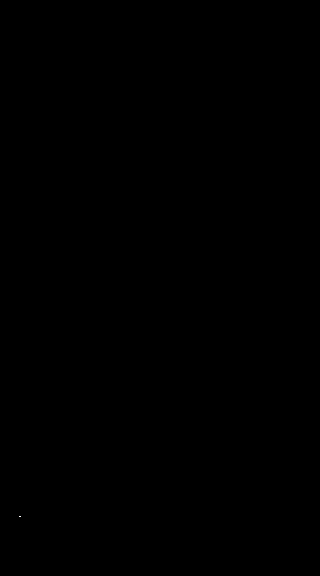

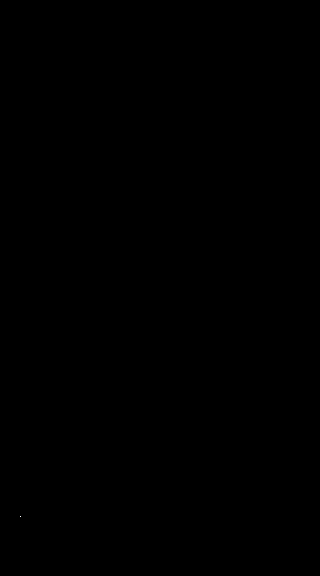

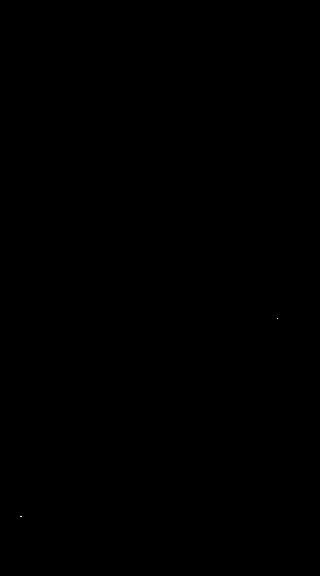

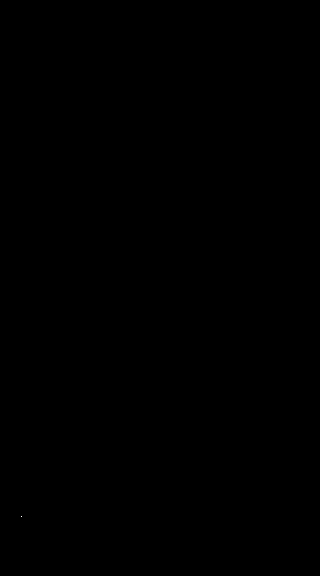

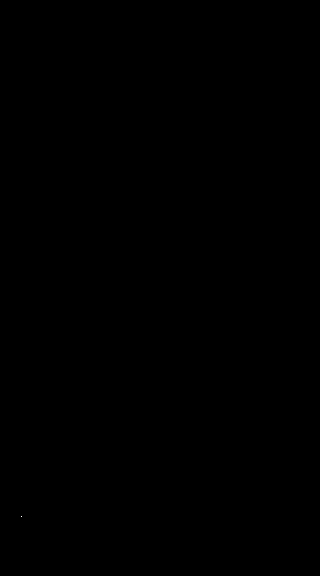

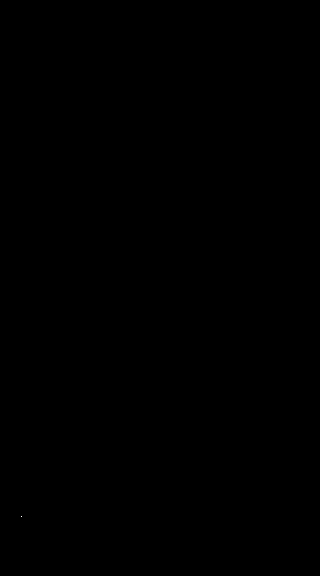

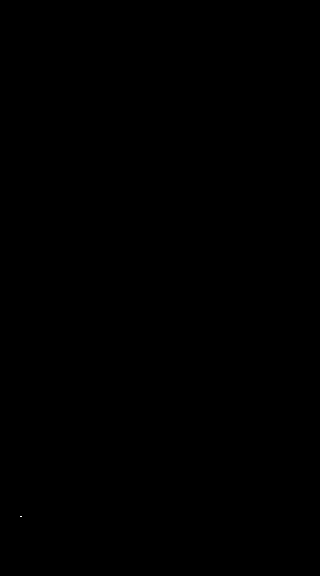

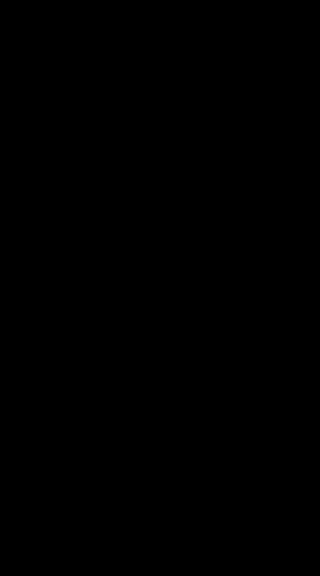

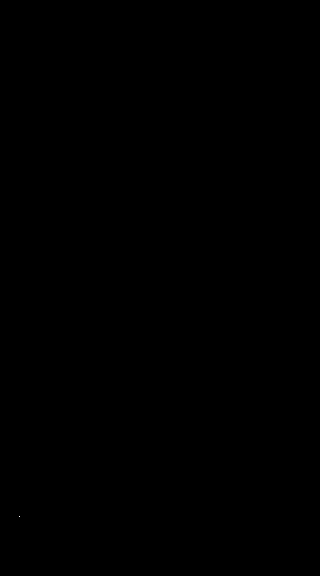

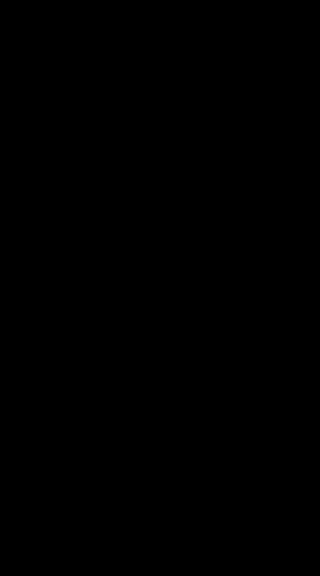

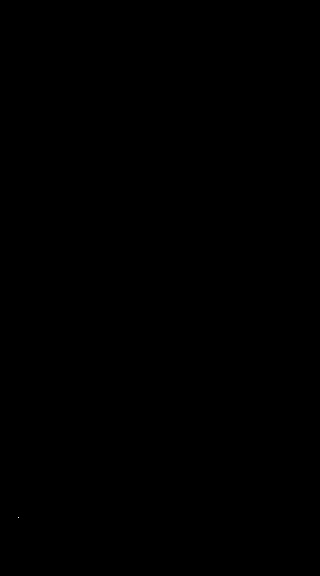

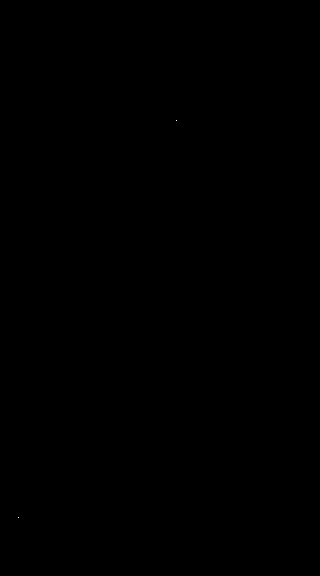

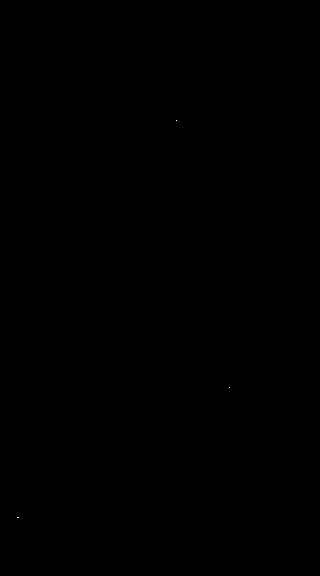

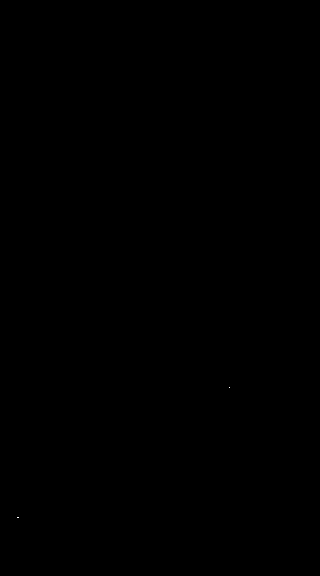

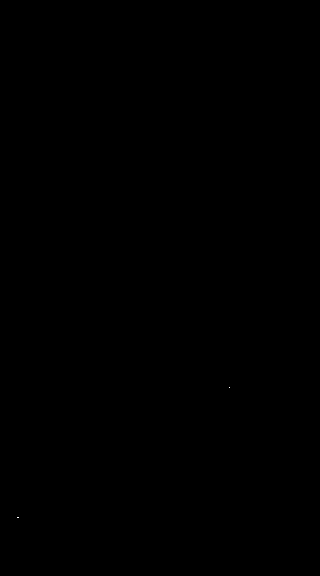

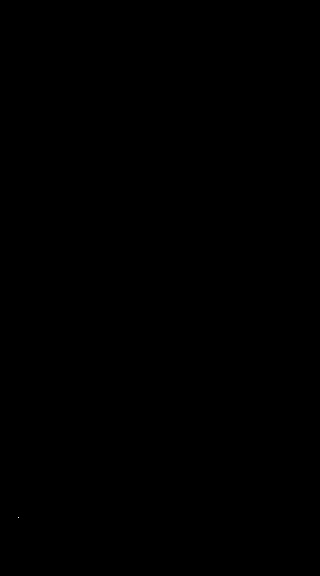

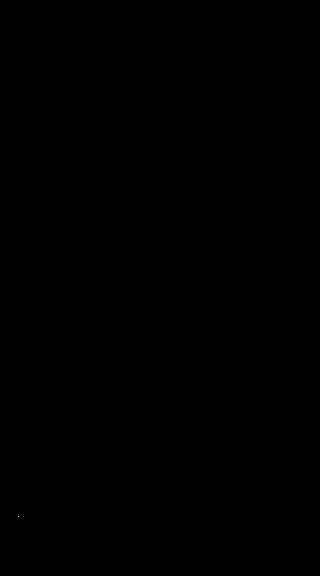

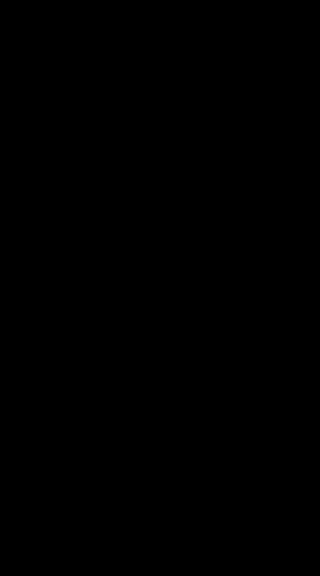

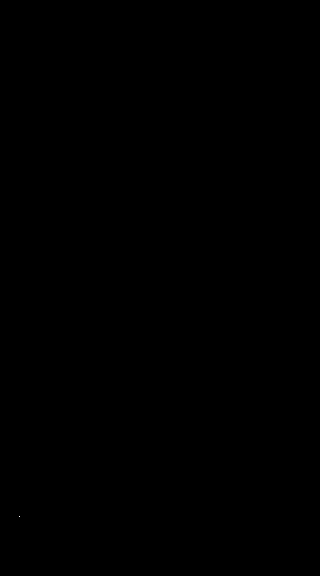

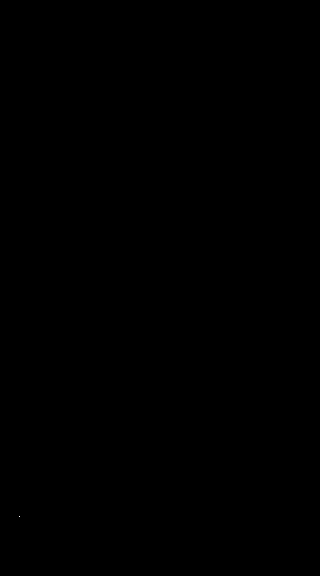

AttributeError: ignored

In [ ]:
import numpy as np

cap = cv2.VideoCapture('video1-.mp4')

fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)

    cv2_imshow(fgmask)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

**Interprétations:** La méthode de soustraction de fond MOG (mixture of gaussians) modélise chaque pixel par gaussiennes (K entre 3 et 5). Un certain poids est affecté à ces gaussiennes qui représente la durée de présence de ces pixels dans l'image, ce qui aide à identifier l'arrière plan.

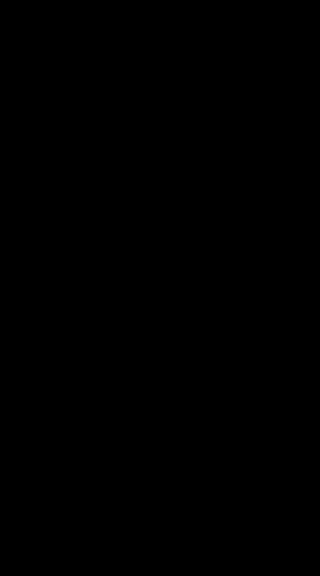

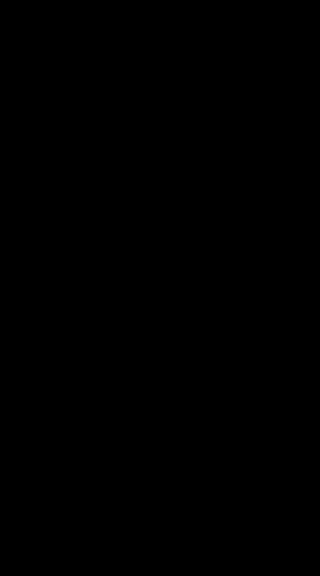

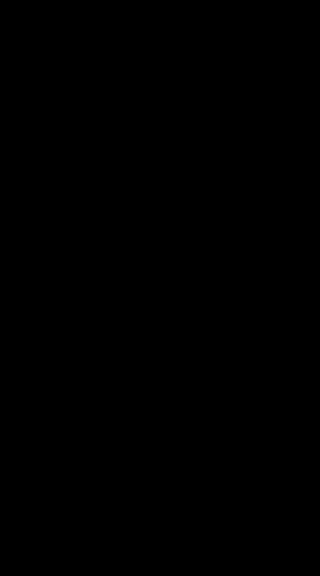

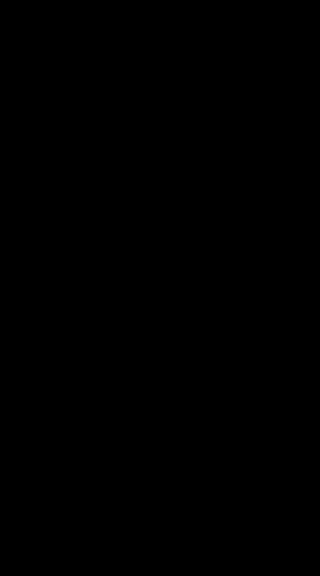

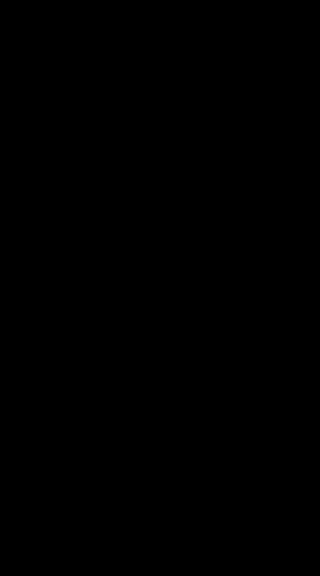

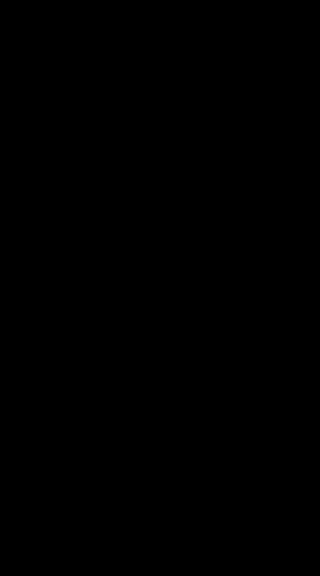

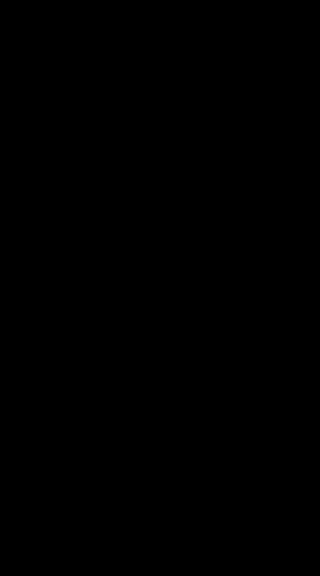

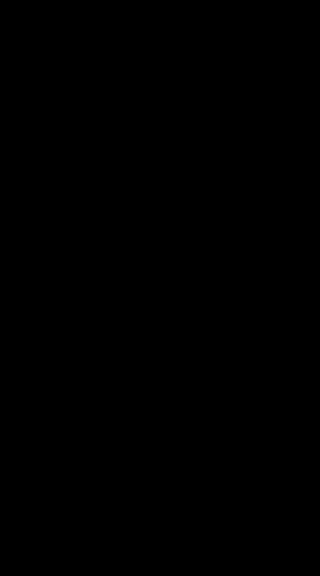

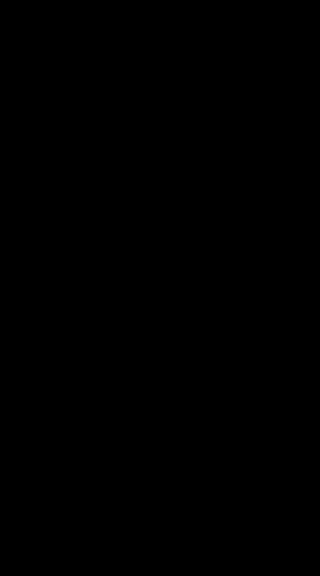

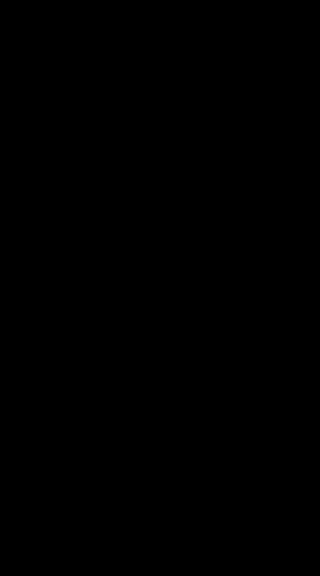

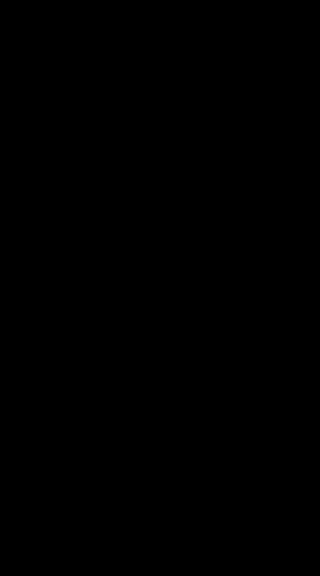

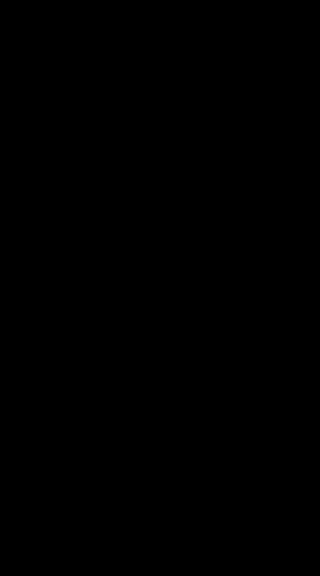

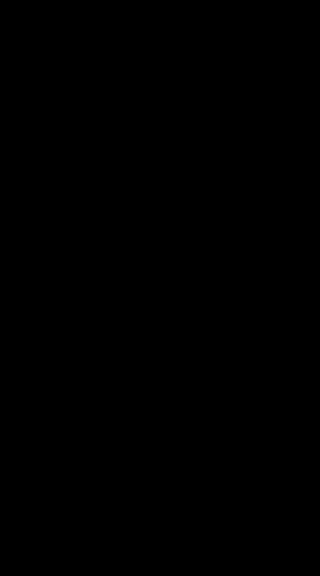

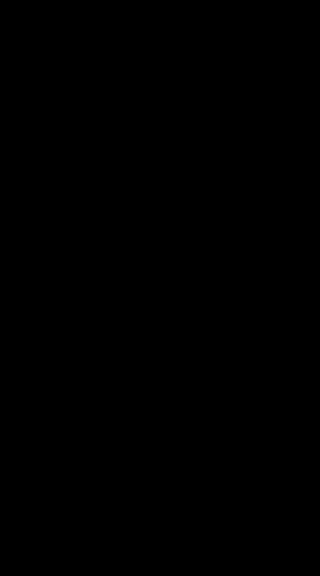

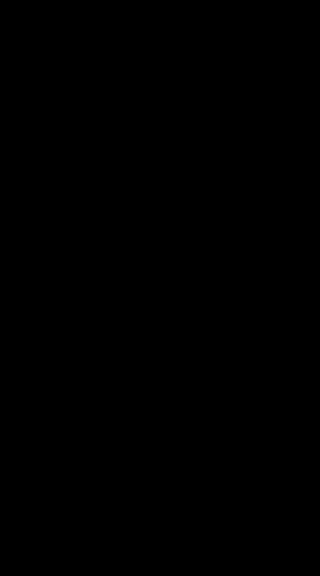

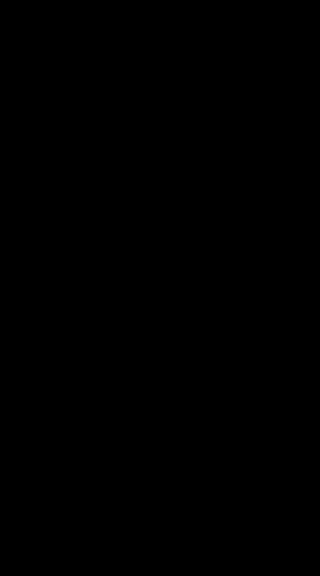

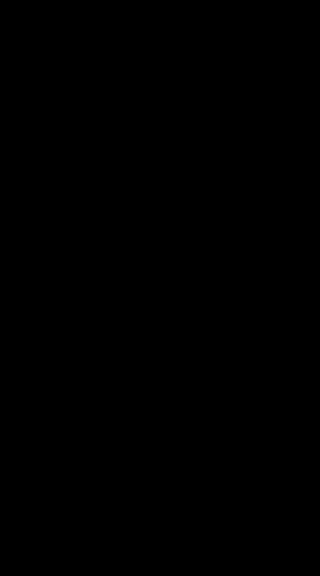

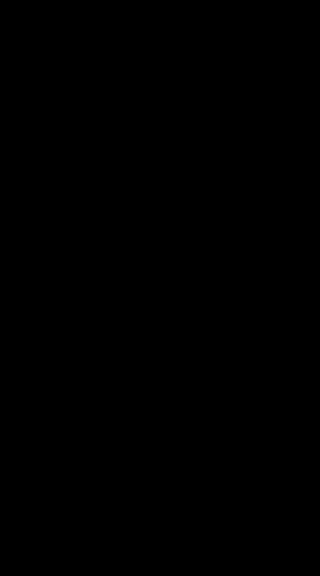

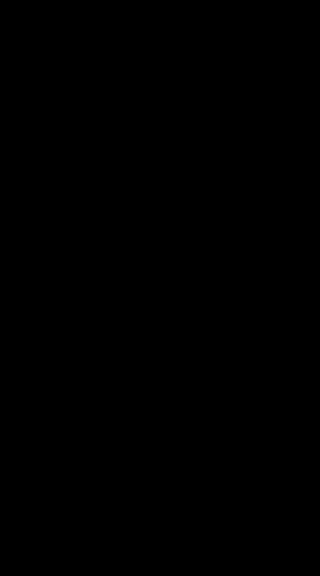

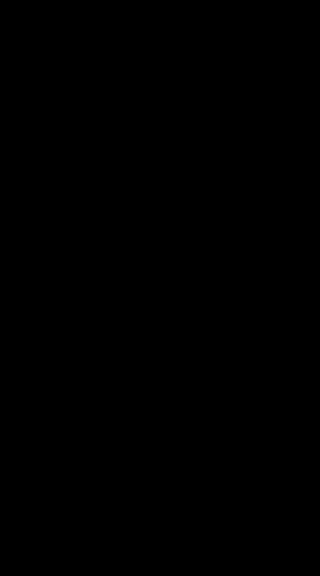

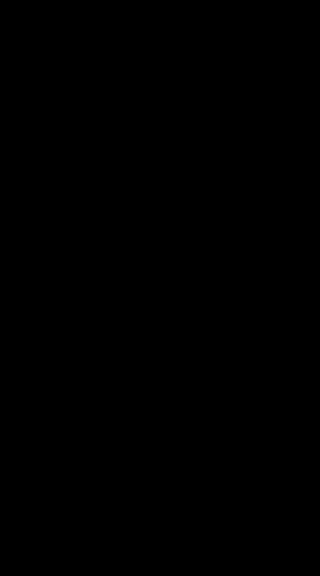

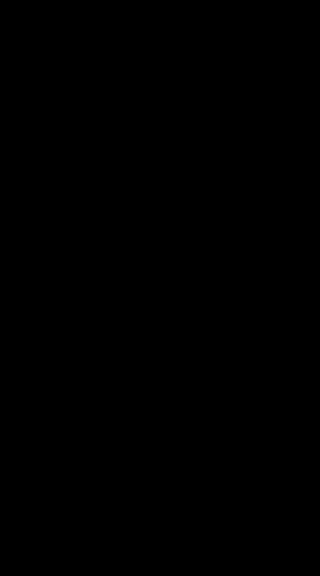

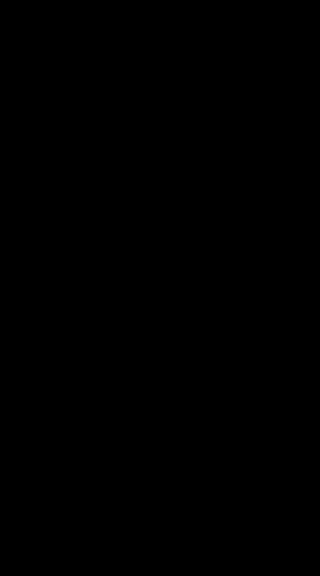

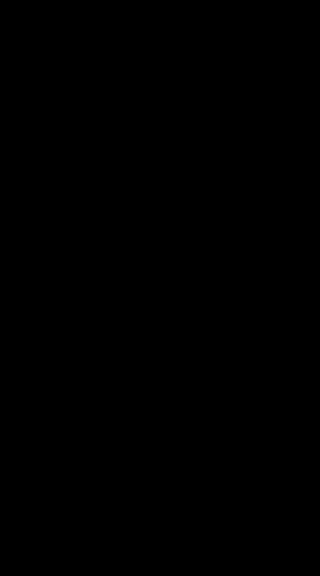

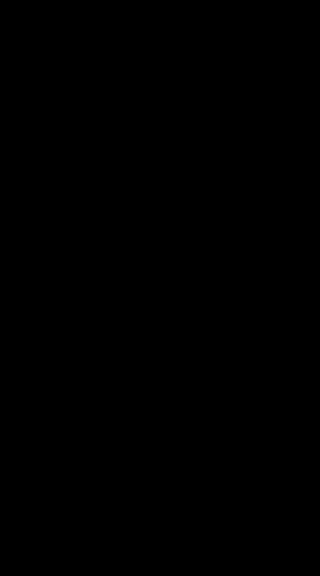

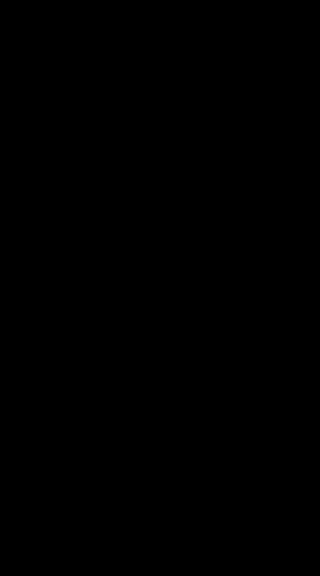

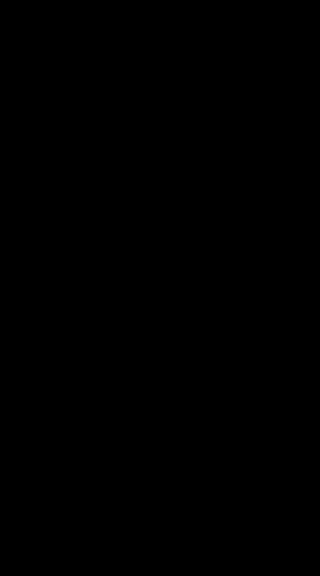

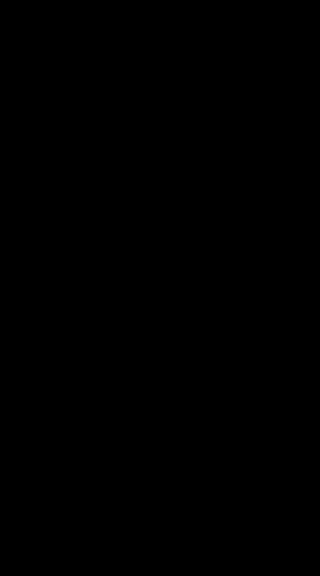

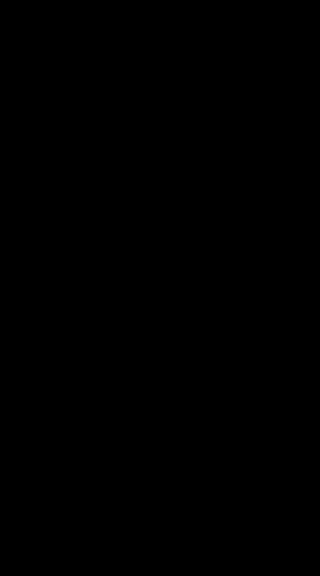

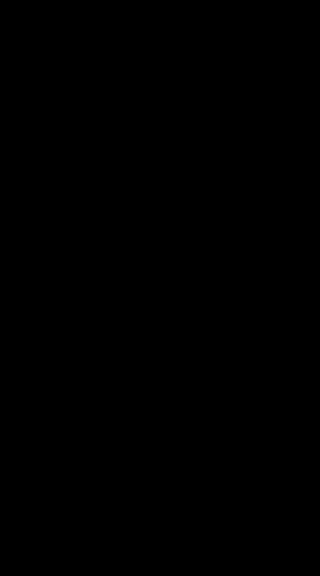

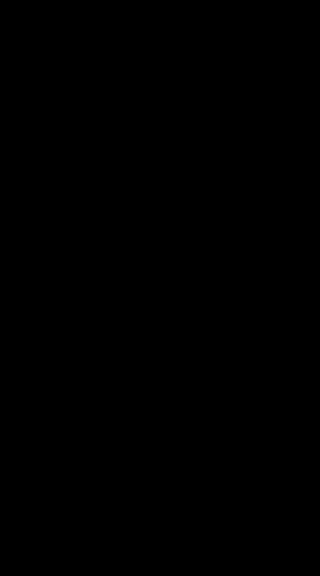

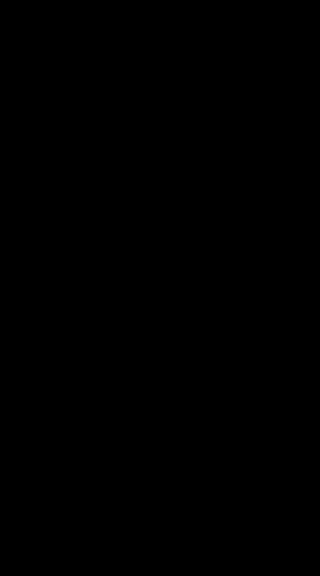

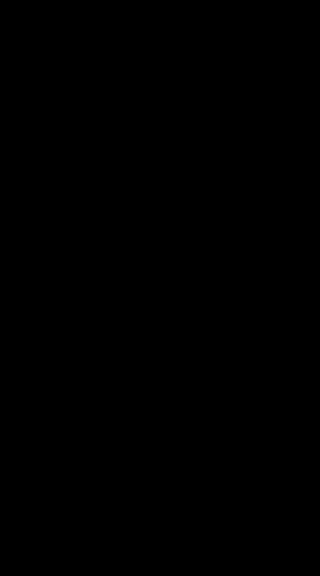

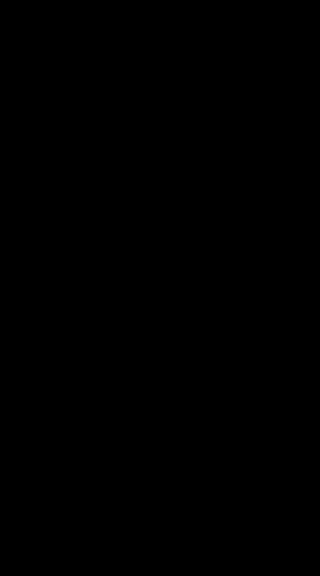

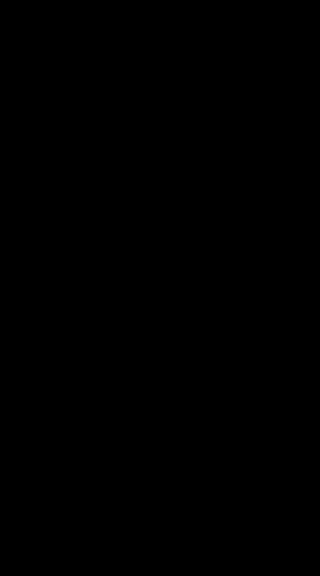

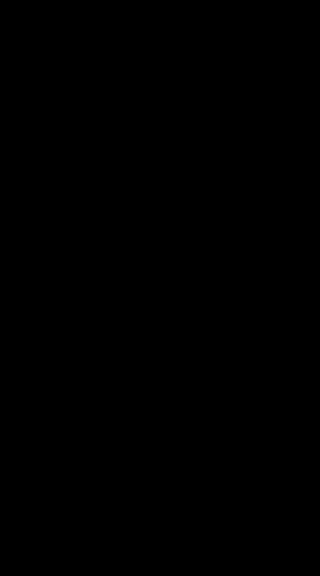

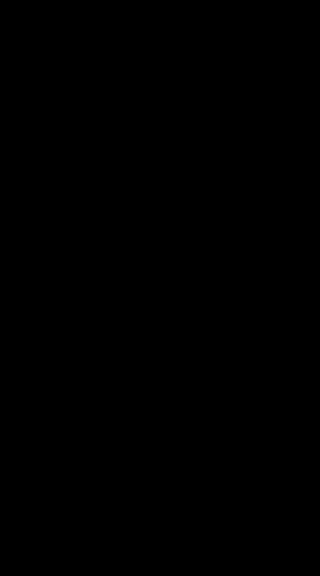

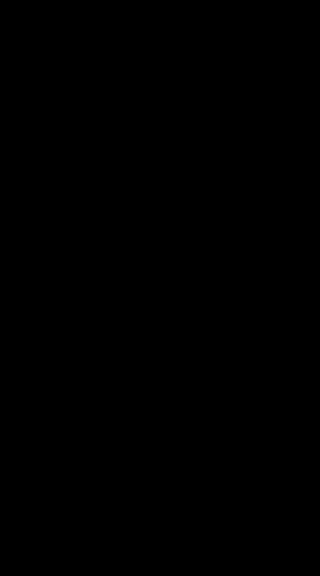

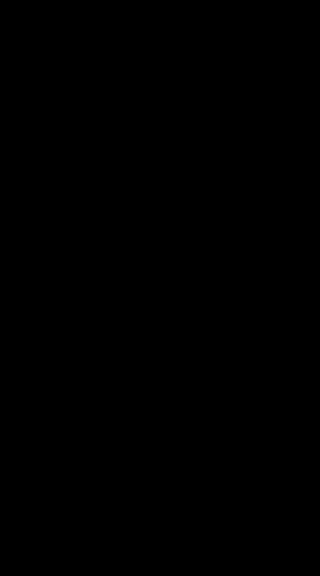

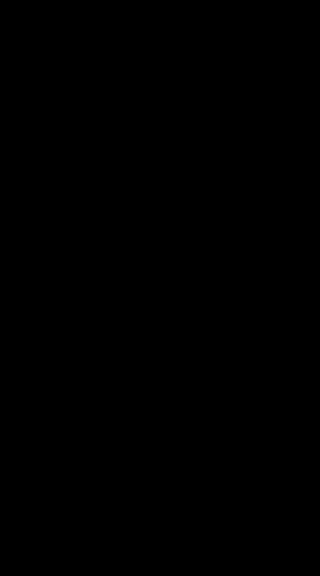

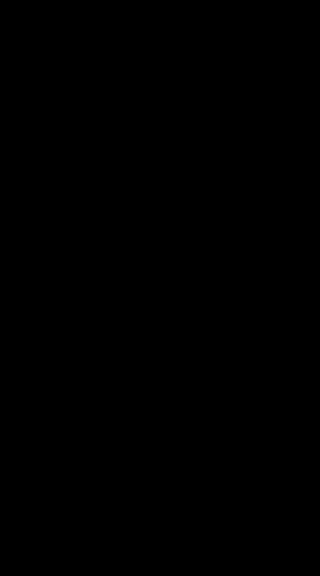

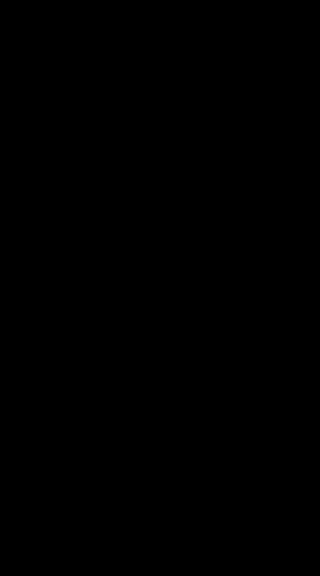

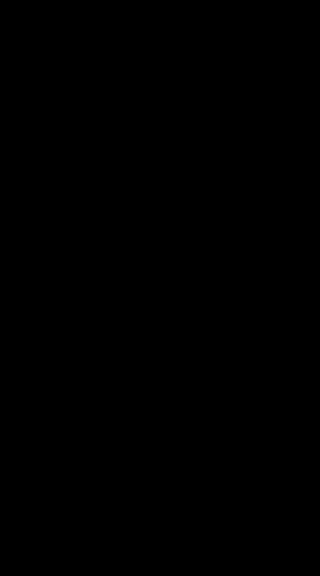

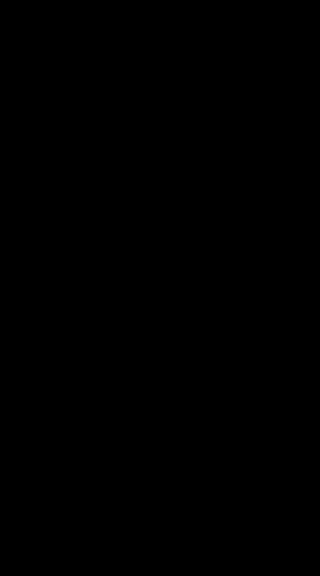

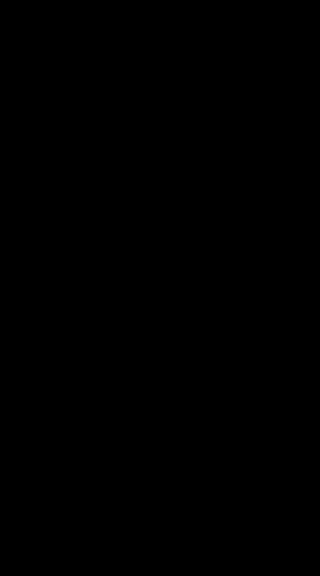

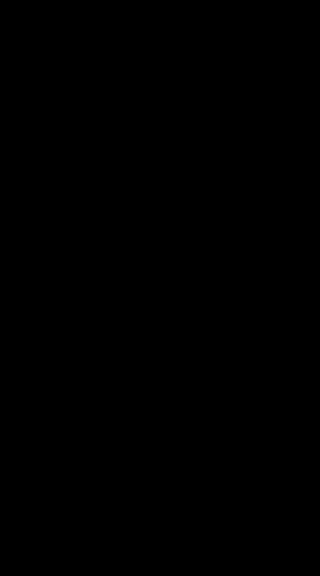

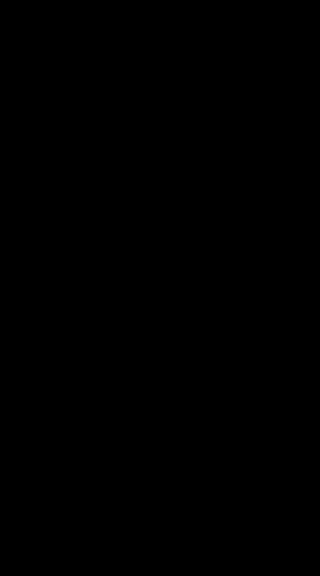

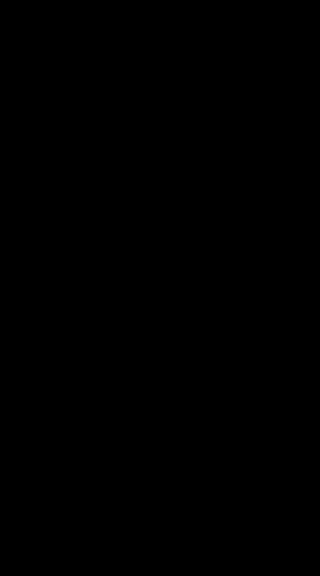

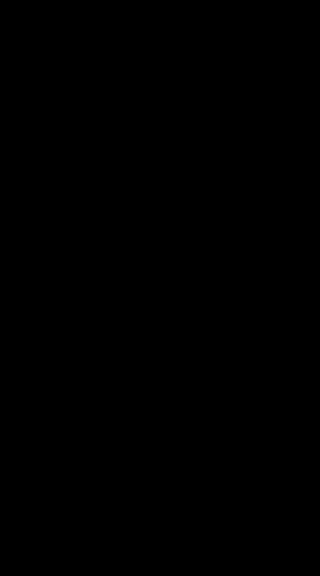

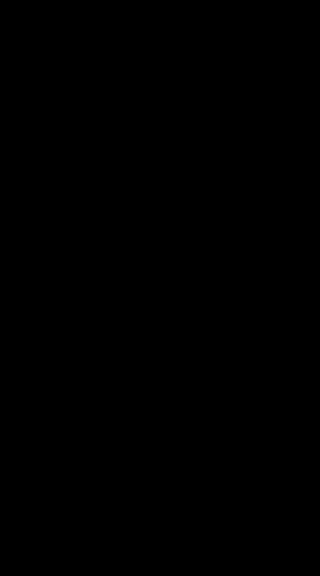

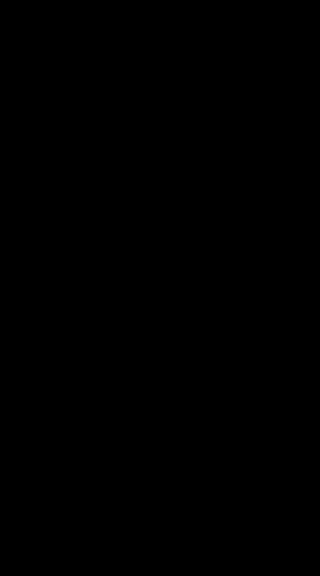

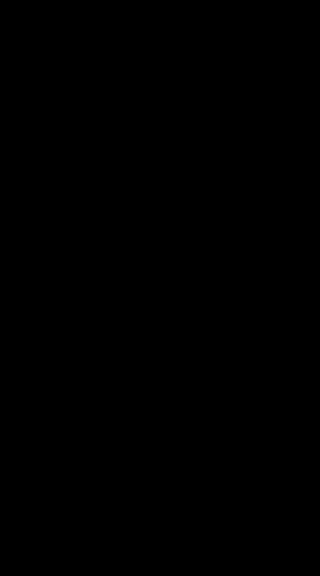

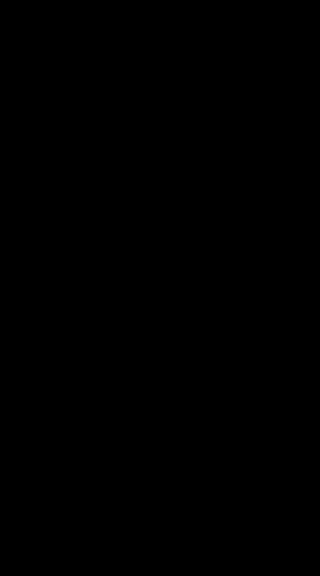

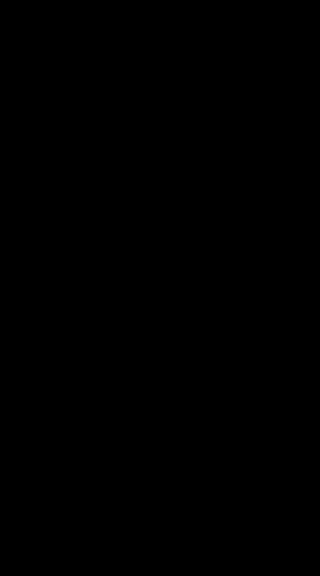

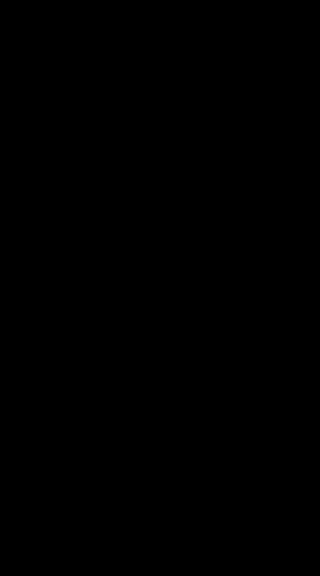

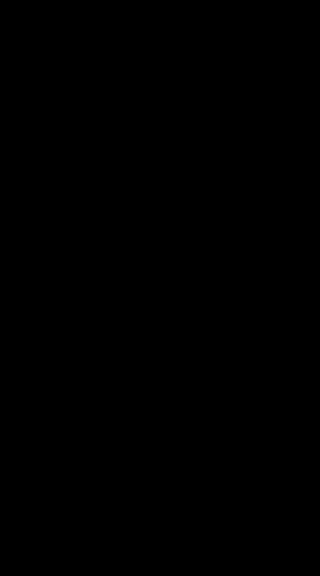

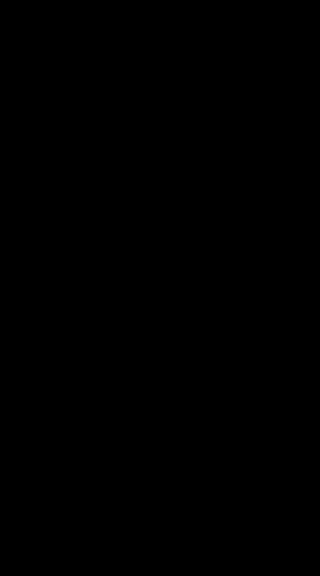

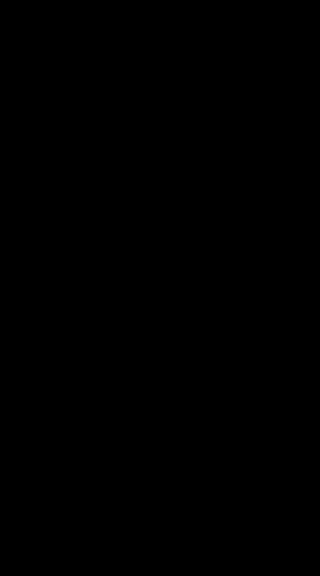

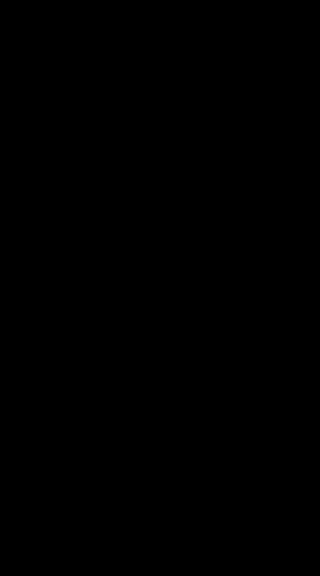

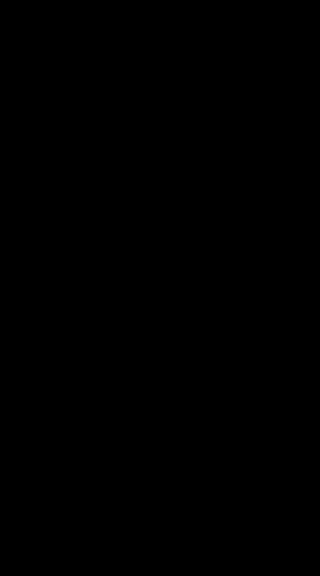

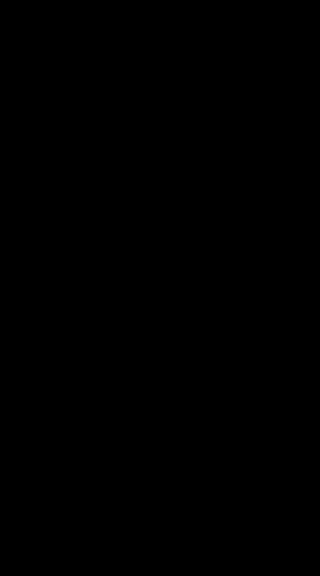

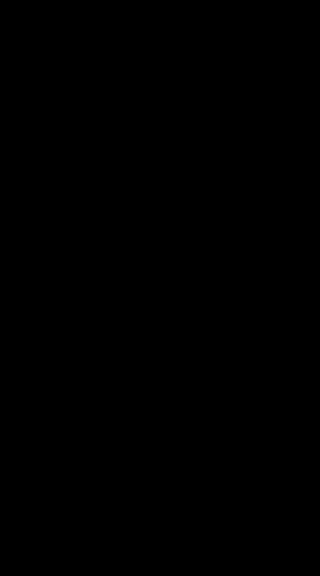

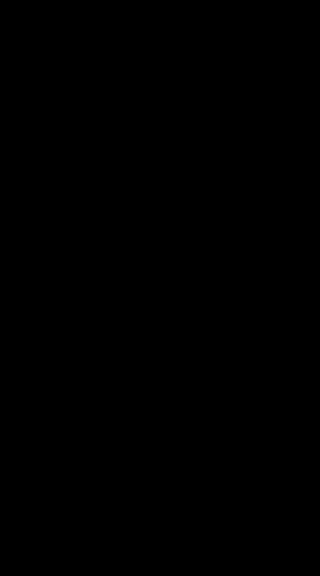

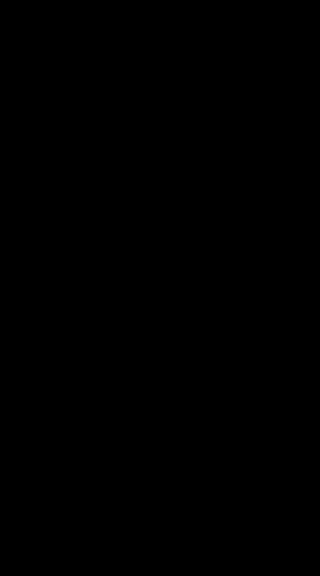

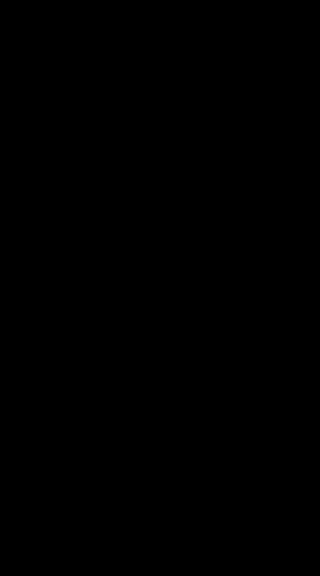

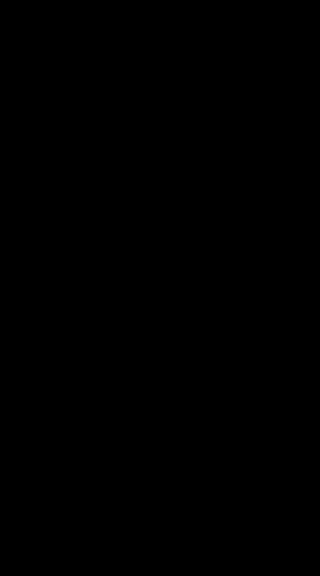

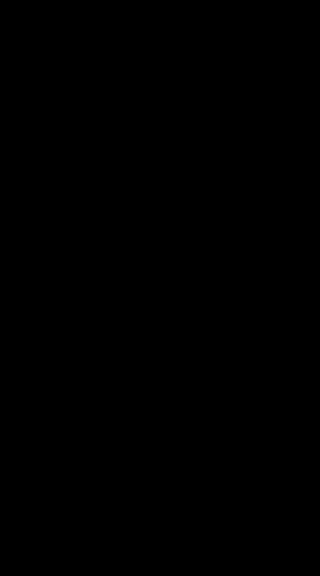

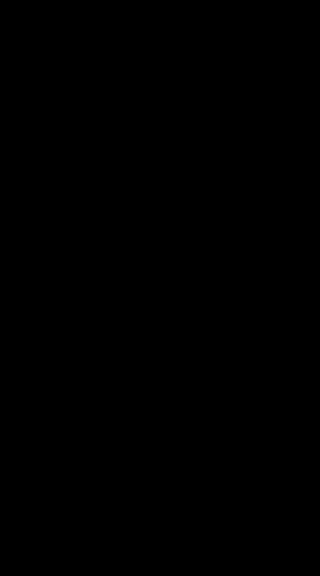

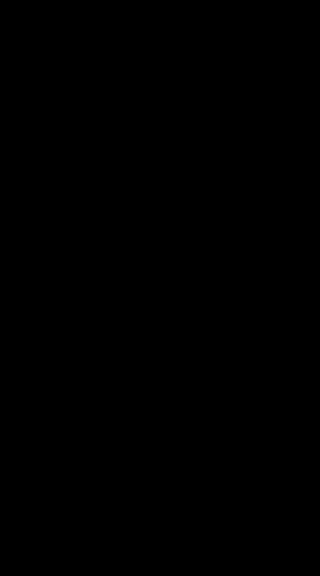

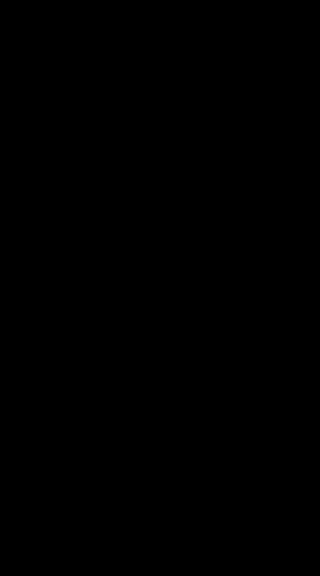

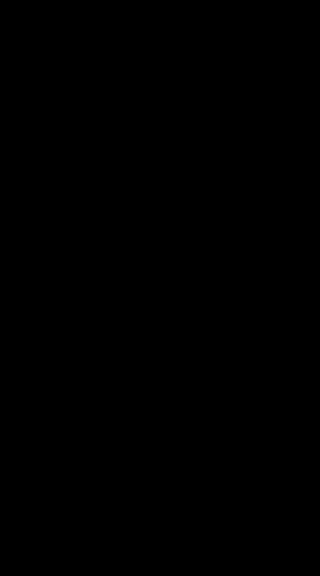

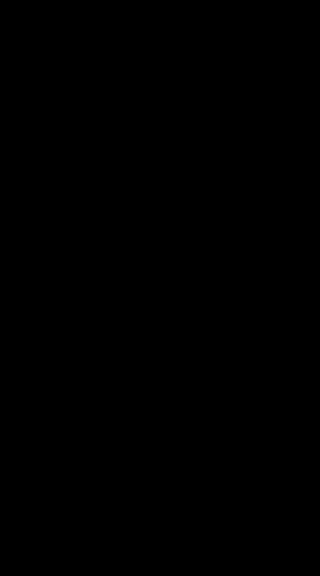

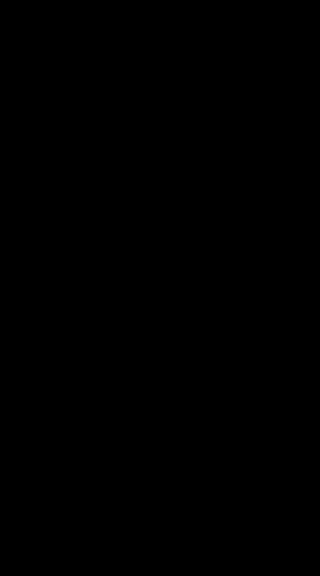

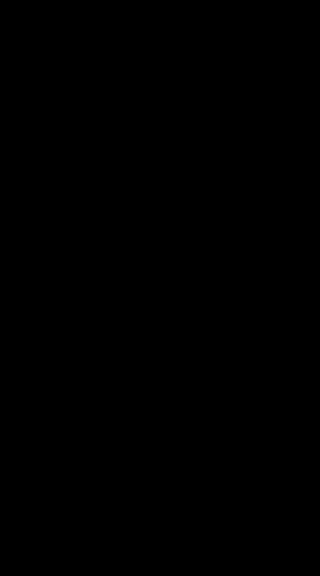

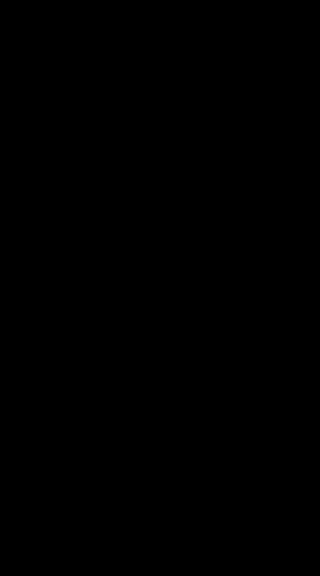

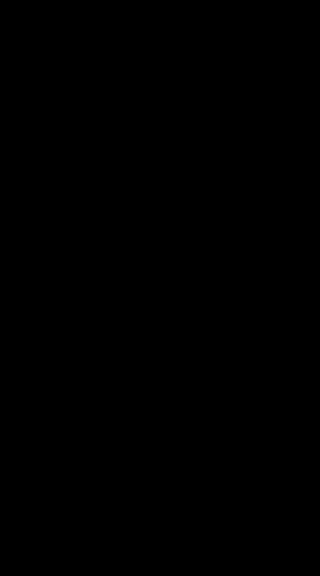

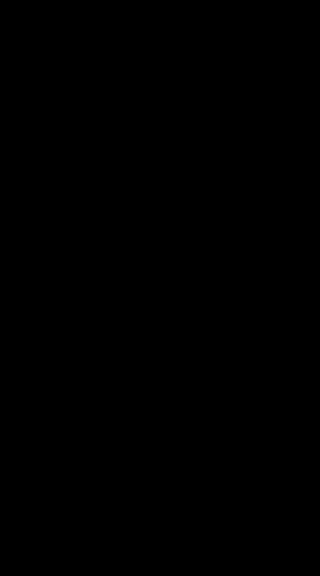

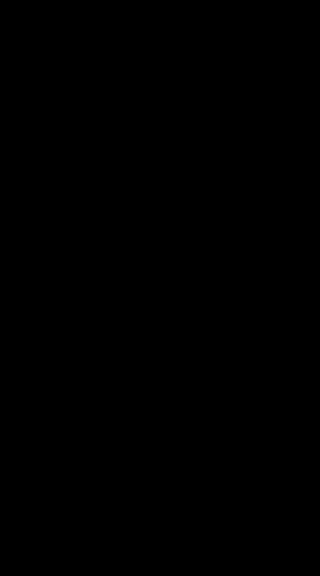

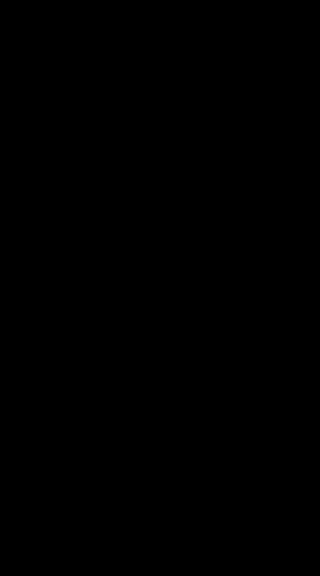

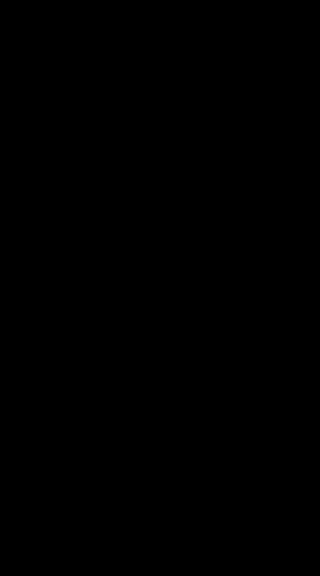

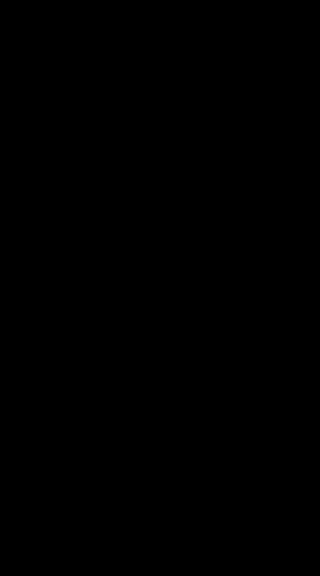

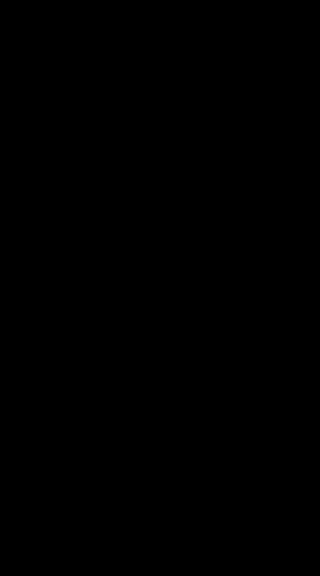

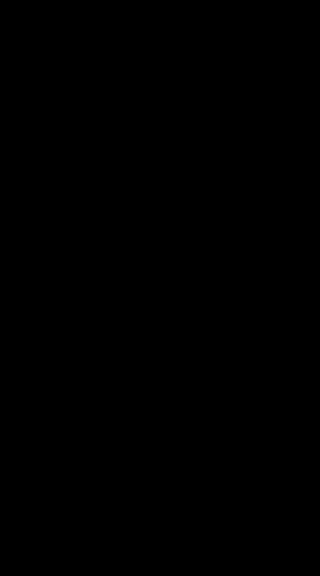

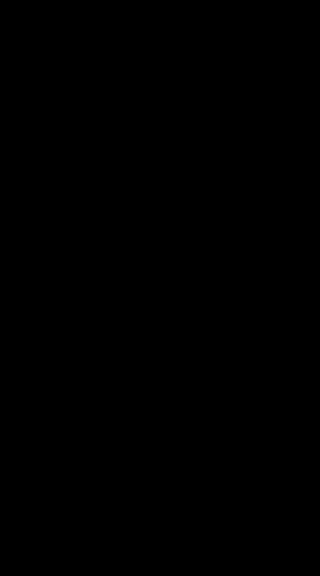

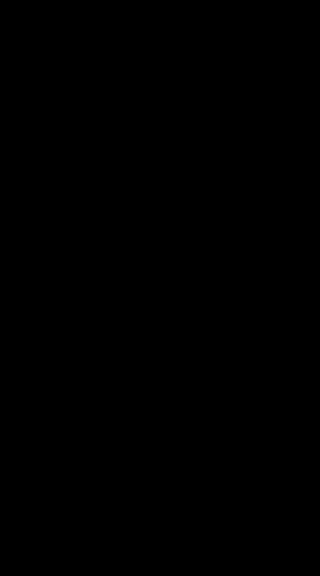

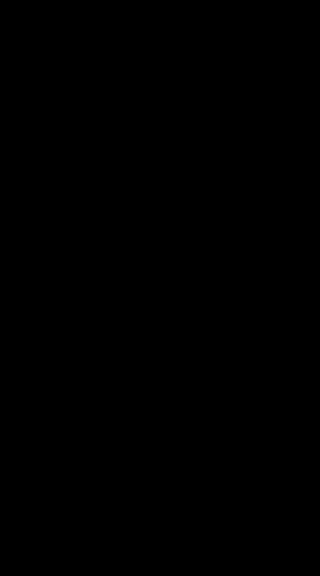

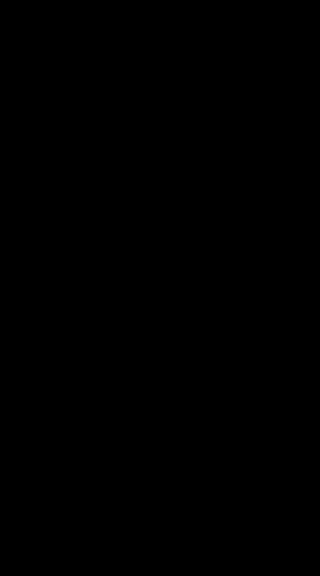

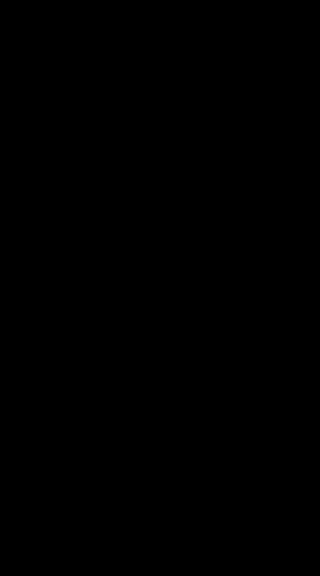

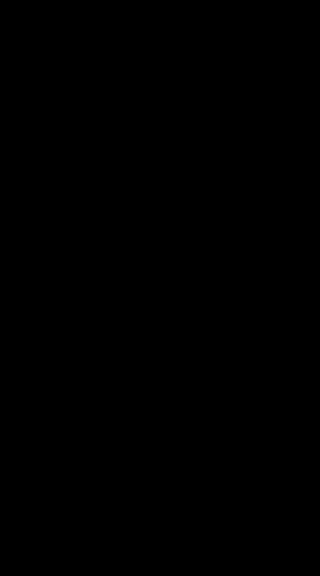

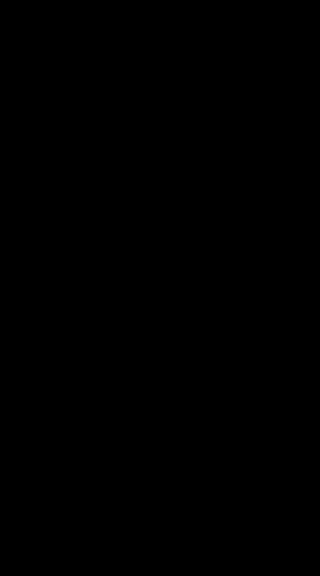

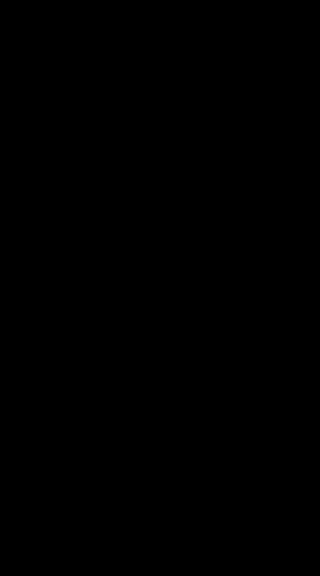

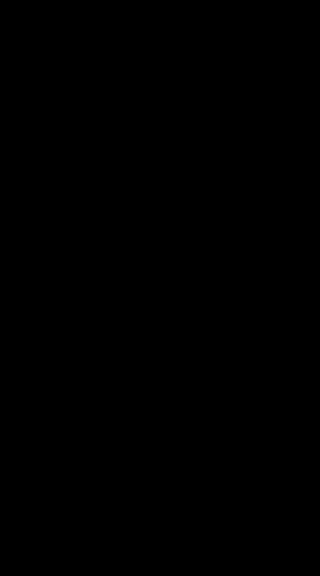

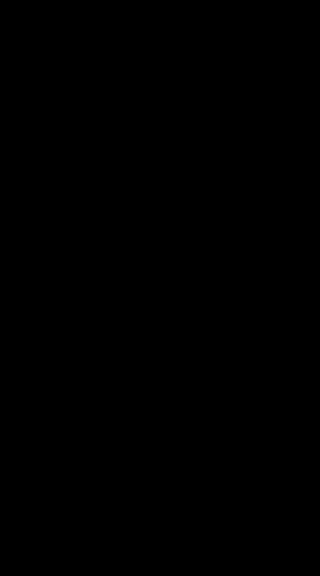

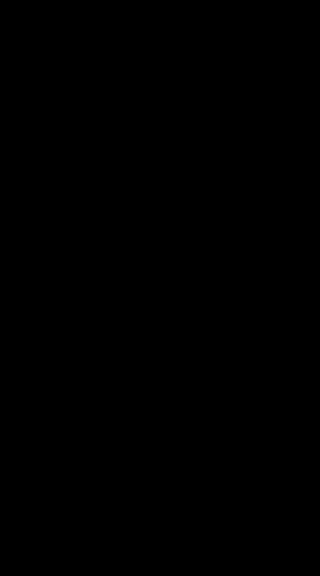

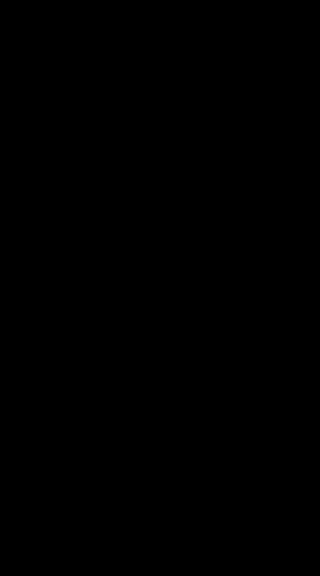

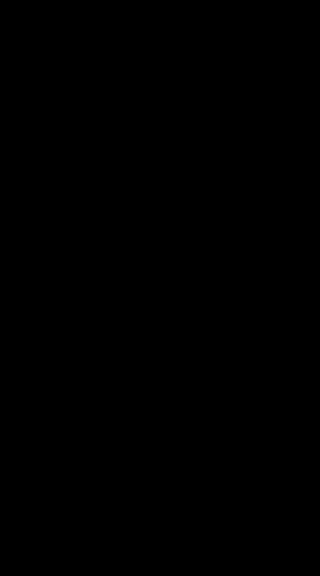

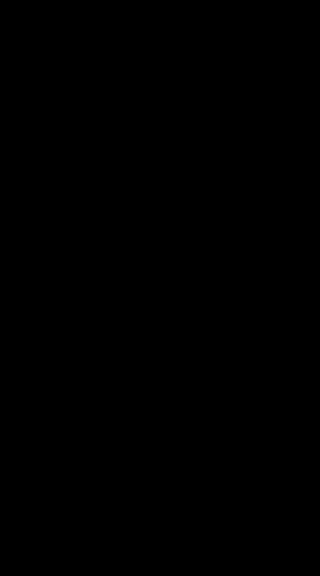

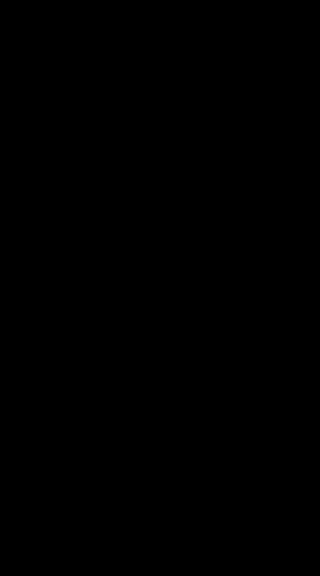

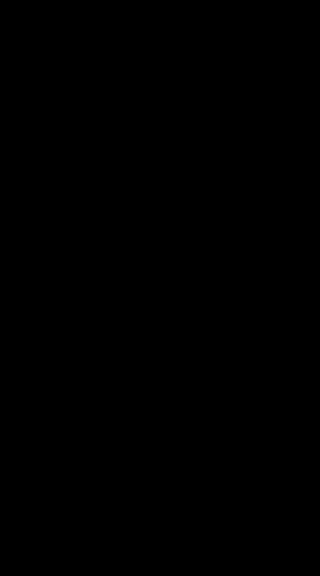

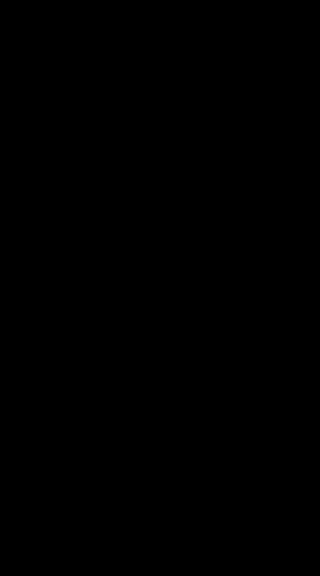

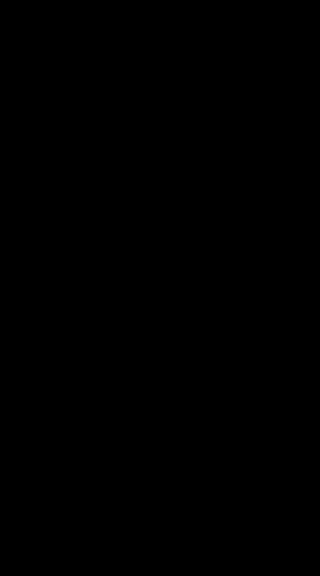

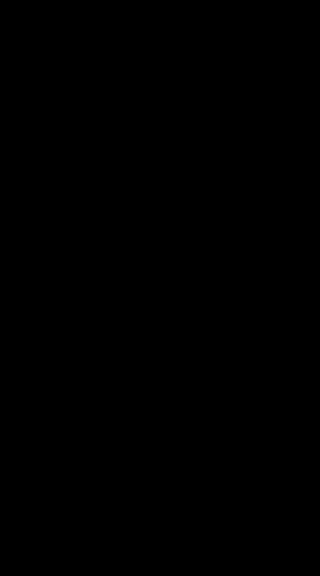

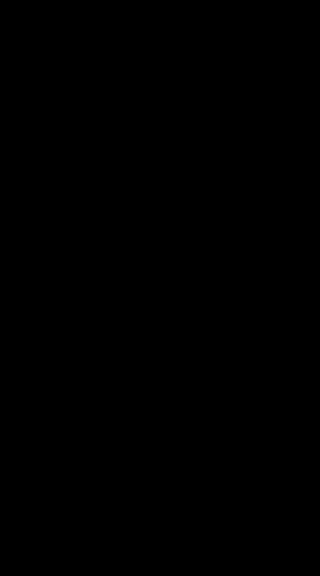

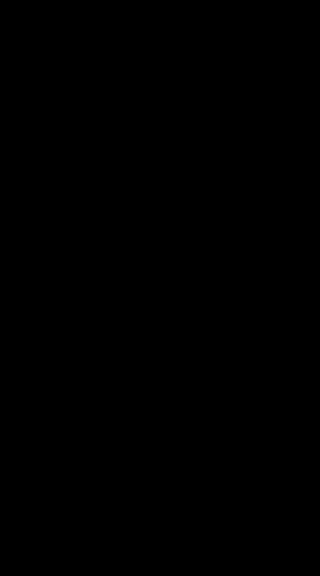

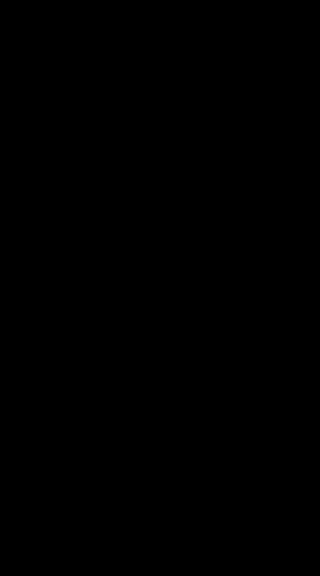

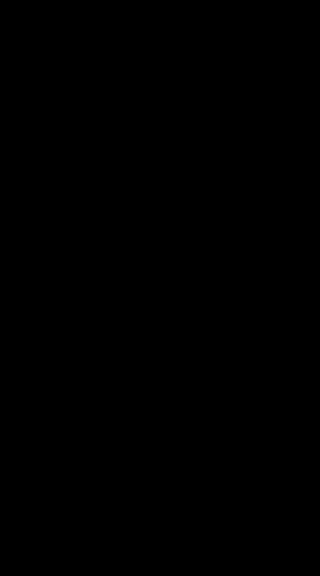

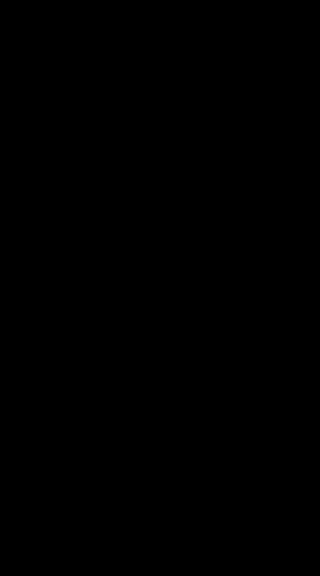

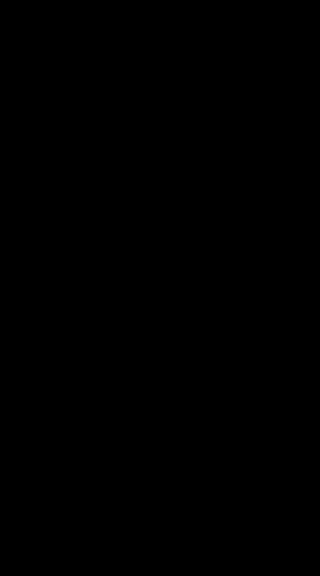

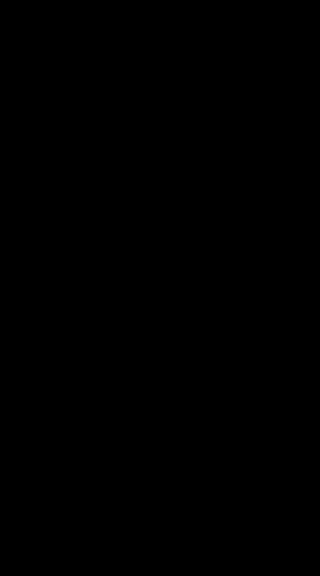

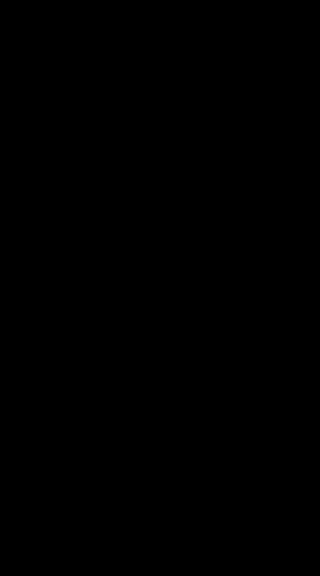

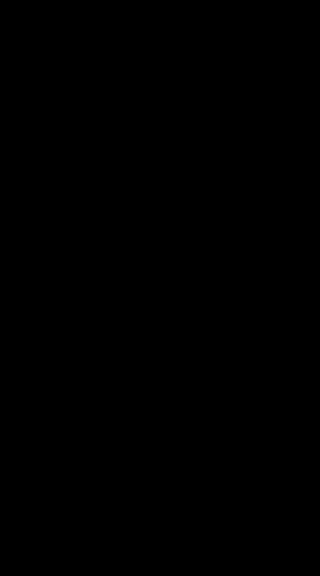

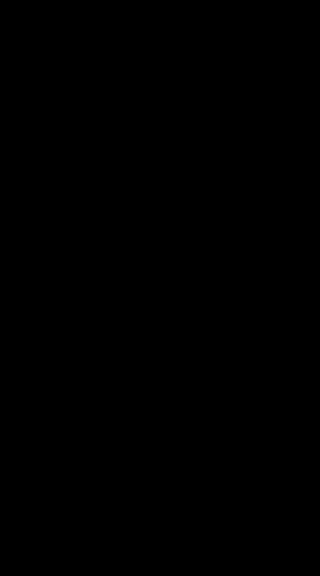

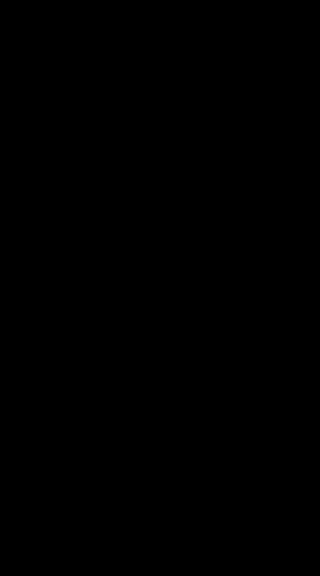

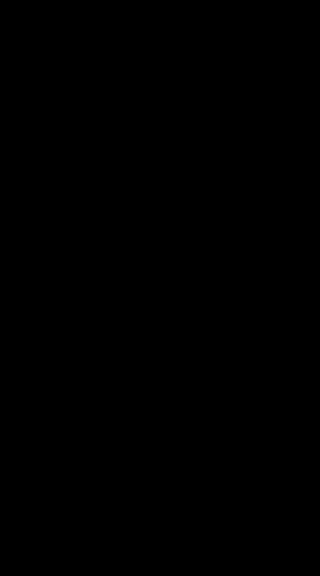

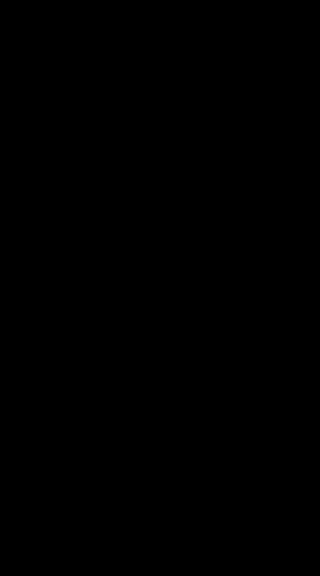

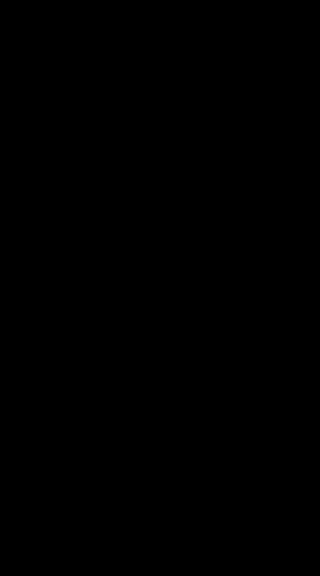

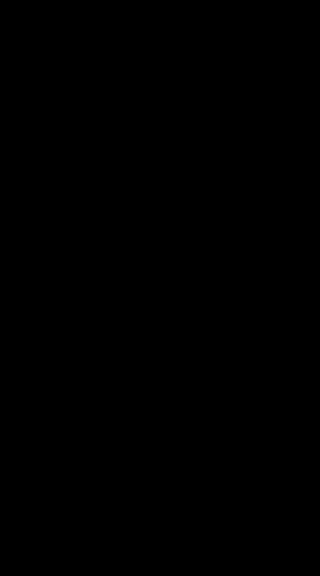

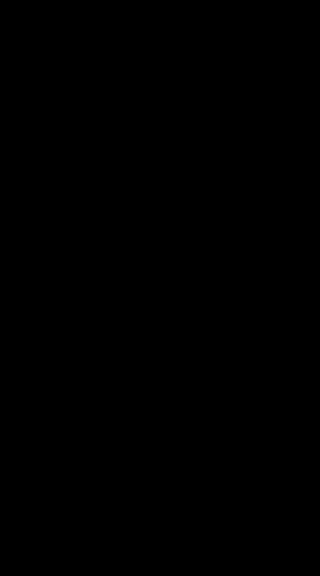

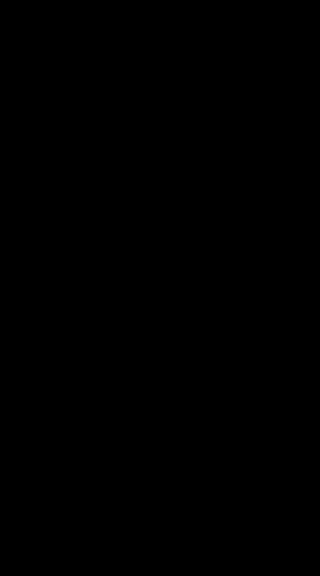

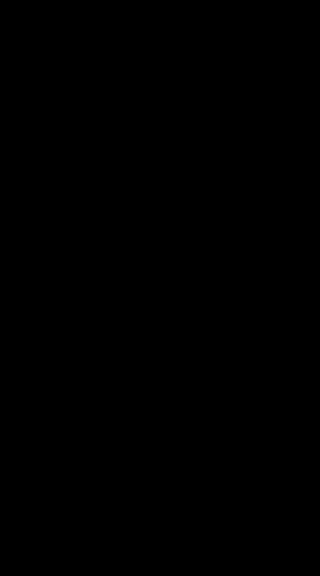

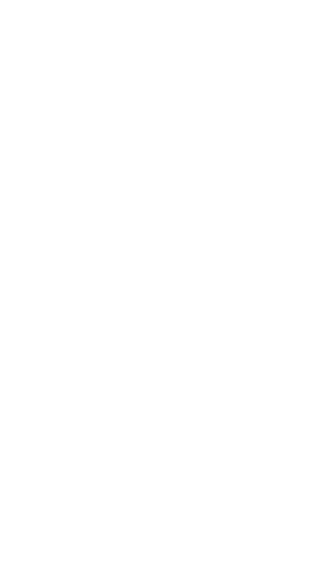

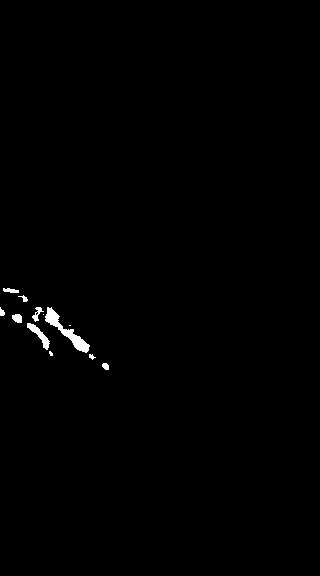

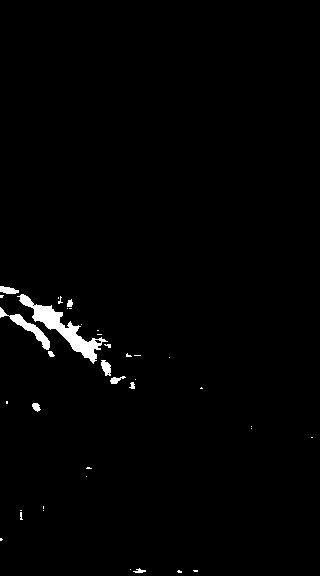

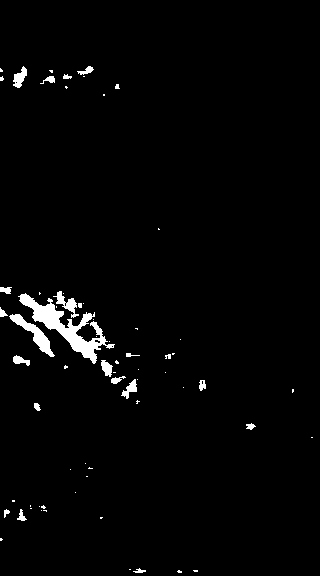

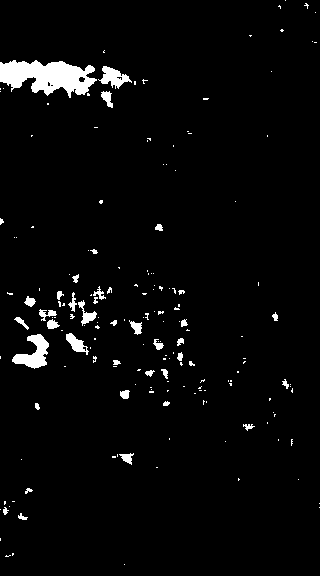

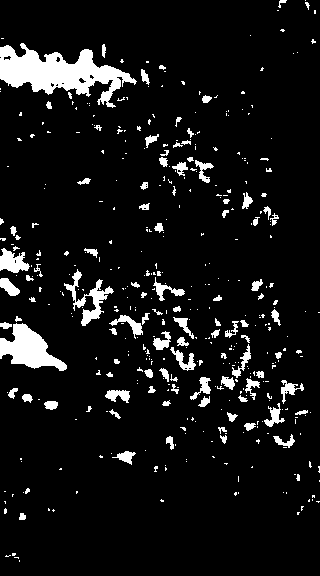

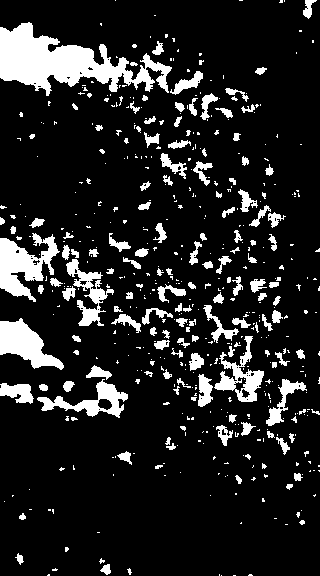

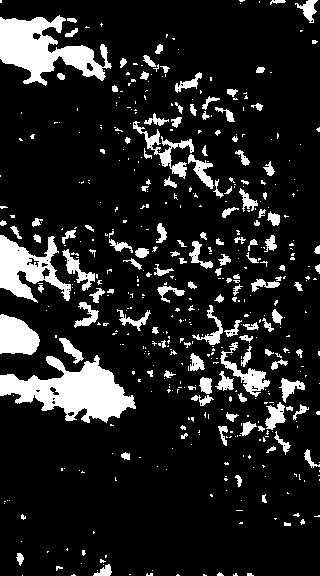

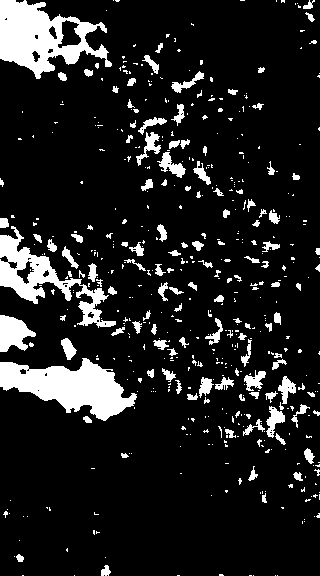

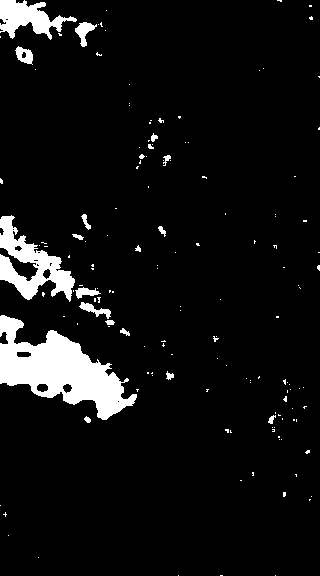

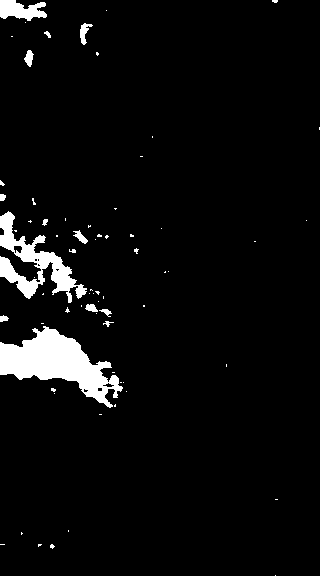

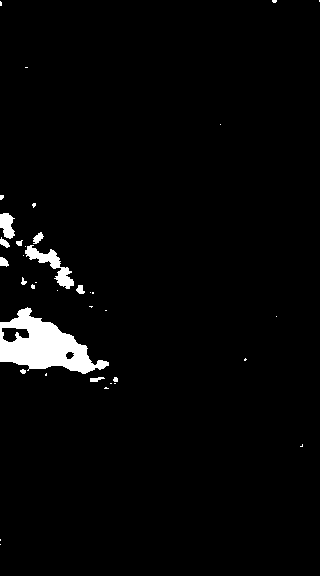

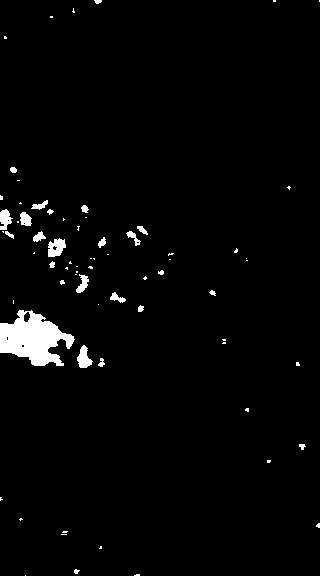

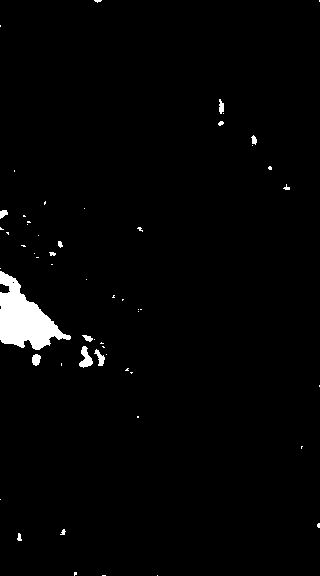

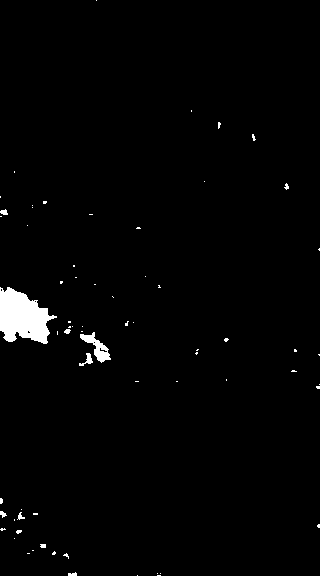

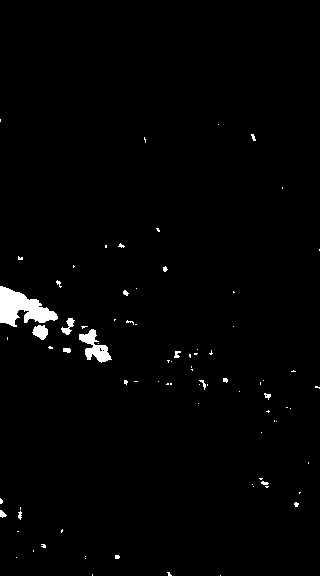

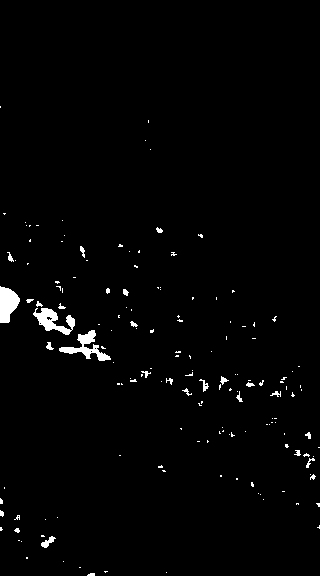

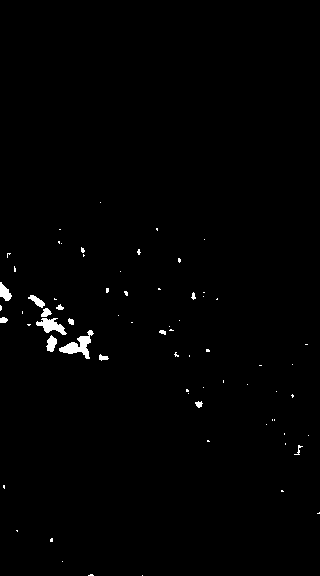

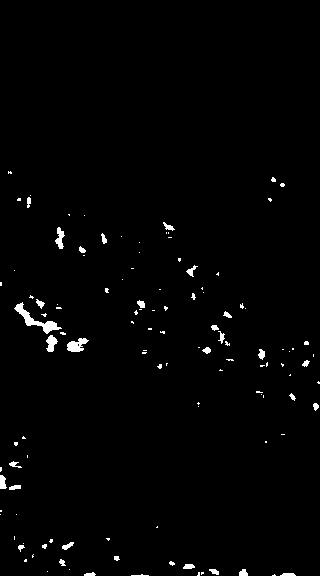

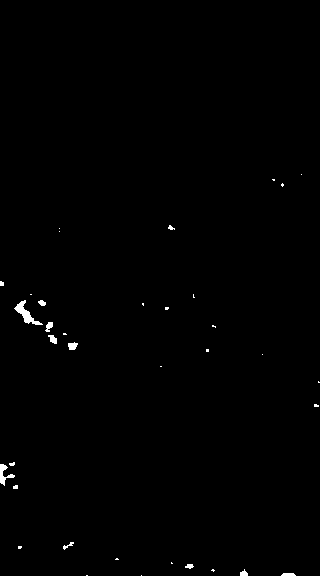

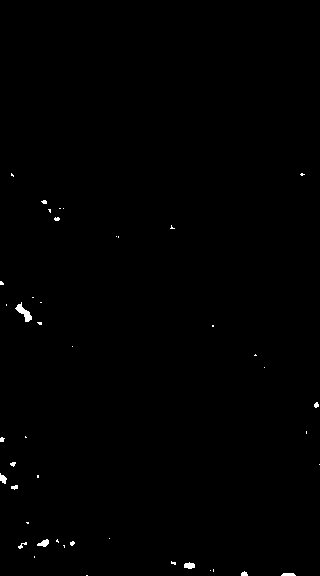

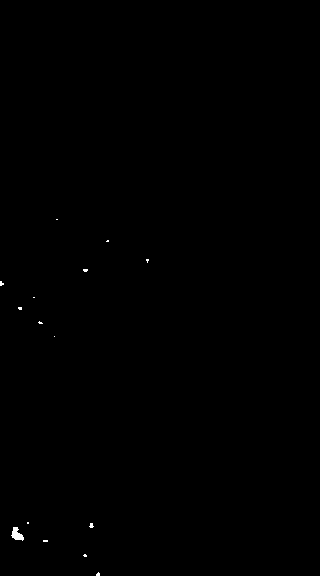

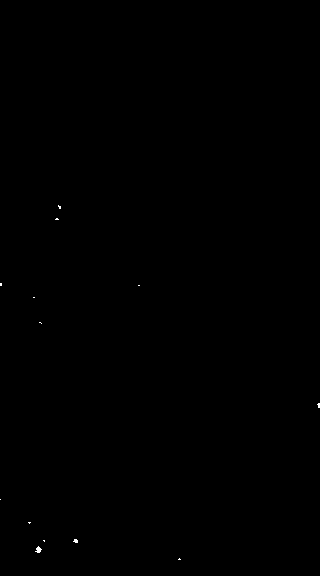

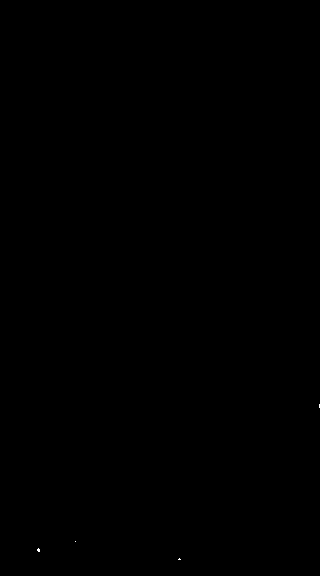

error: ignored

In [ ]:
cap = cv2.VideoCapture('video1-.mp4')

fgbg = cv2.bgsegm.createBackgroundSubtractorGMG()

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)

    cv2_imshow(fgmask)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

**Interprétations:** Cet algorithme utilise les 120 premières images dans la vidéo pour modéliser le fond. Il utilise une approche probabiliste combinée à l'inférence bayesienne en mesurant la durée d'apparition des pixels.
Puisque cet algorithme utilise les 120 premières images comme réference, elles seront tous considérées comme le fond, et seront noires.
Ces résultas sont très bruitées, c'est pour cela qu'on utilise un filtrage morphologique dans la suite.

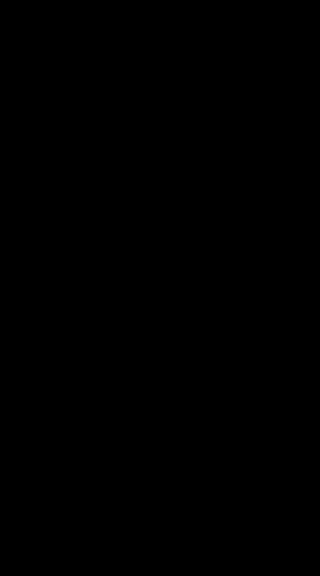

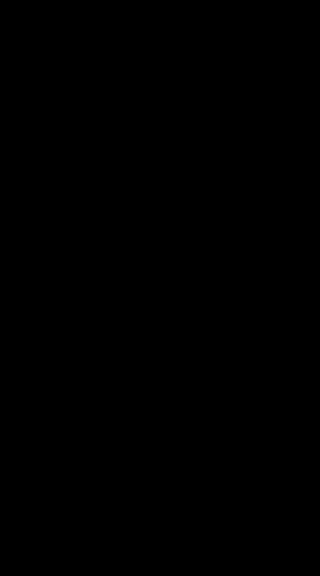

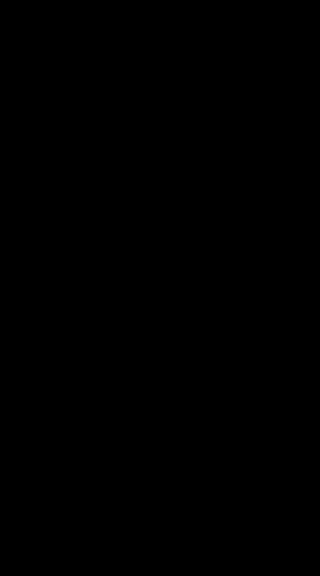

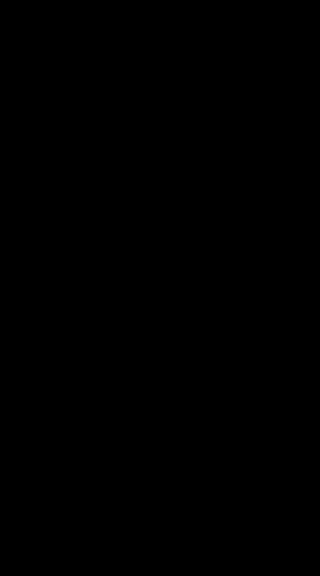

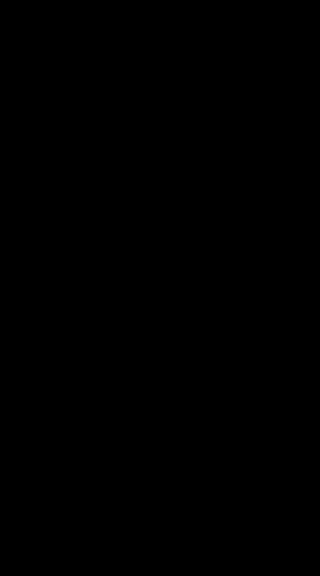

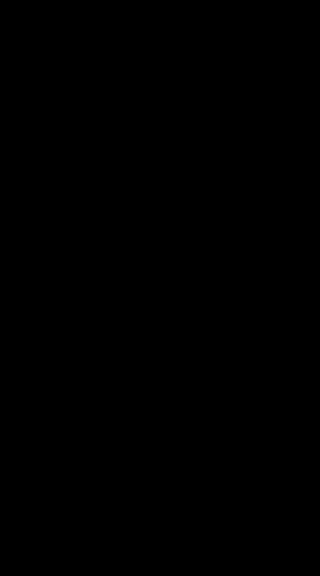

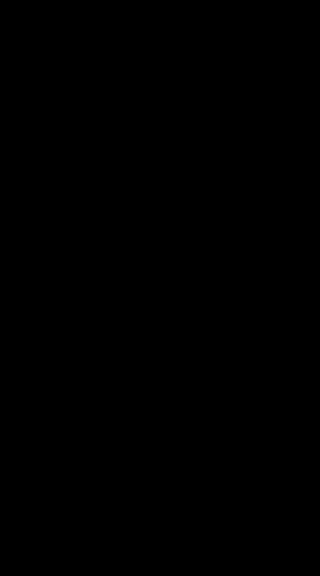

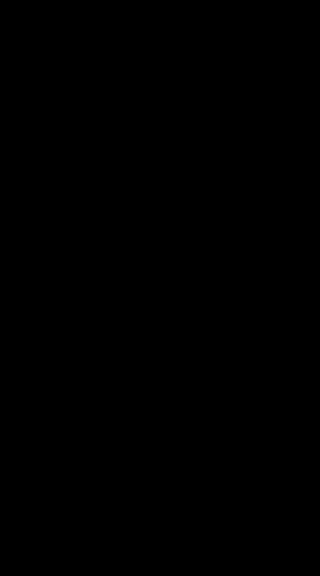

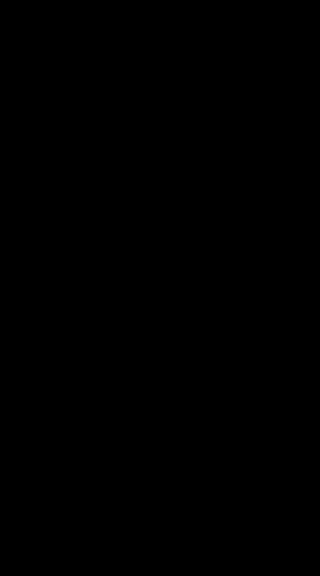

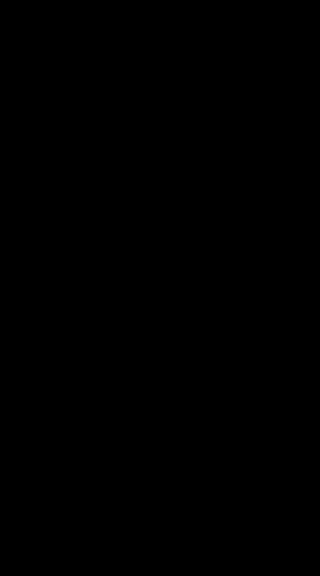

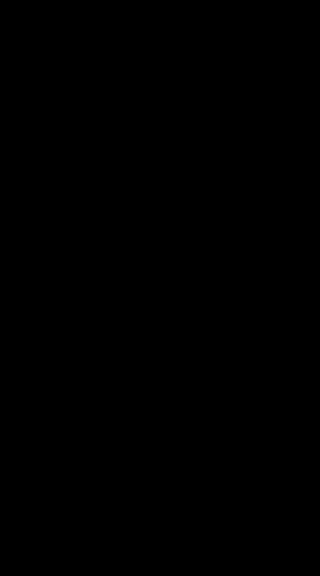

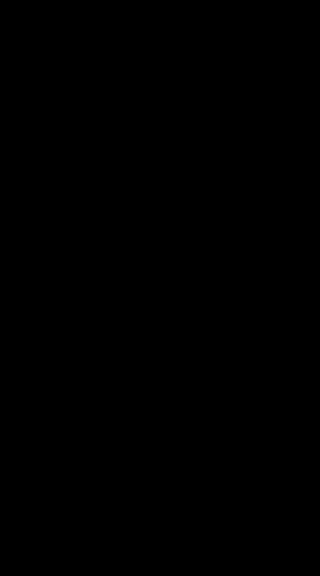

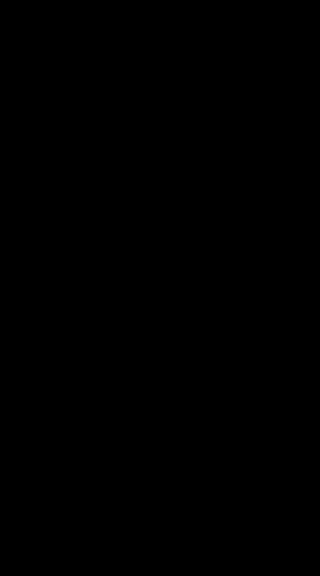

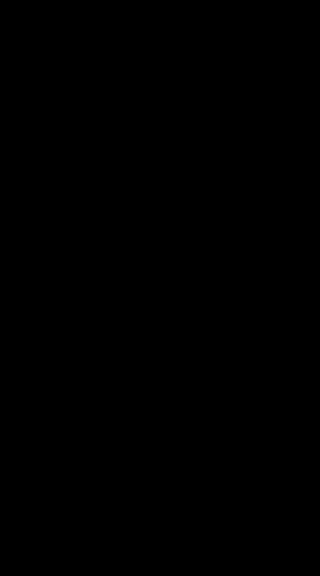

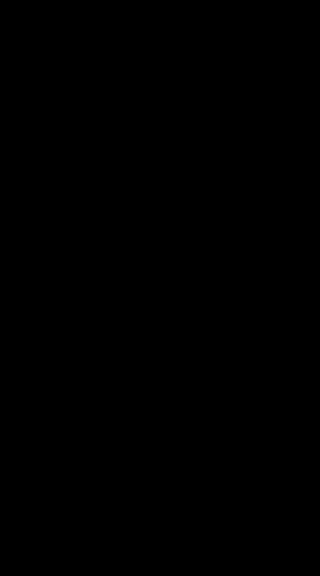

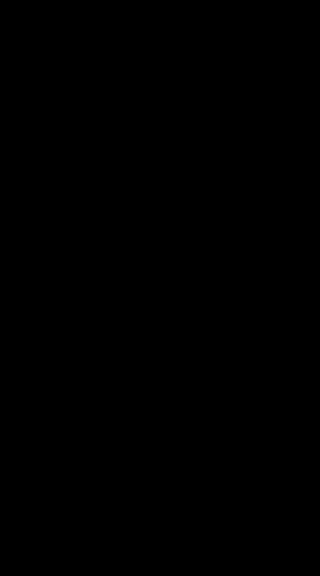

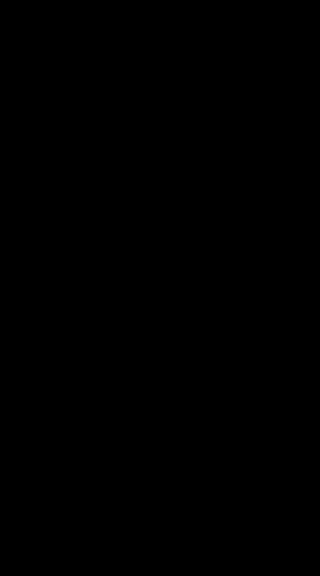

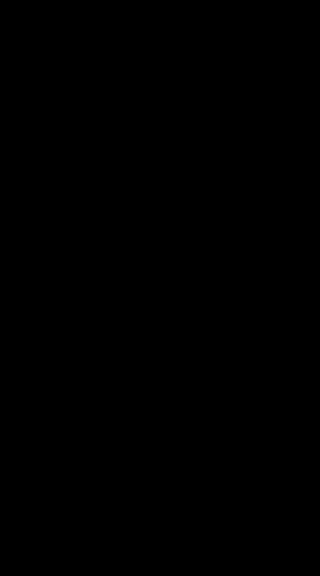

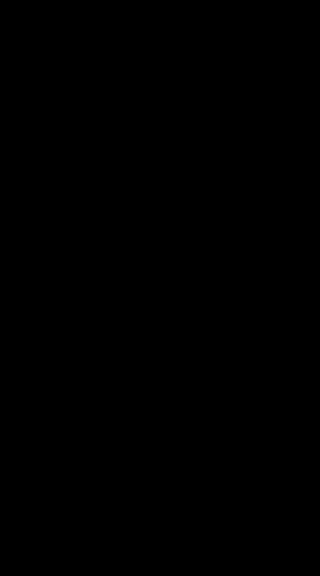

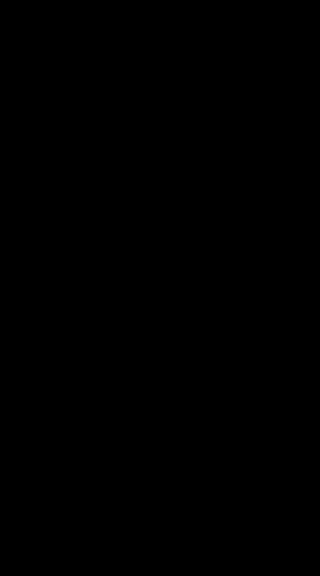

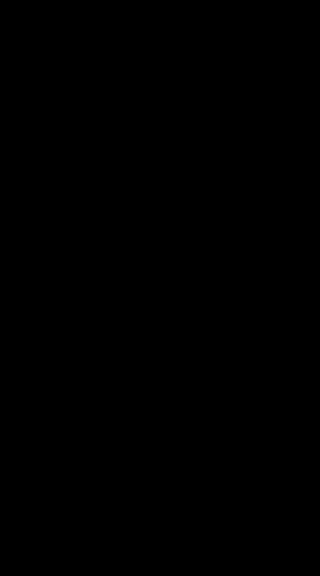

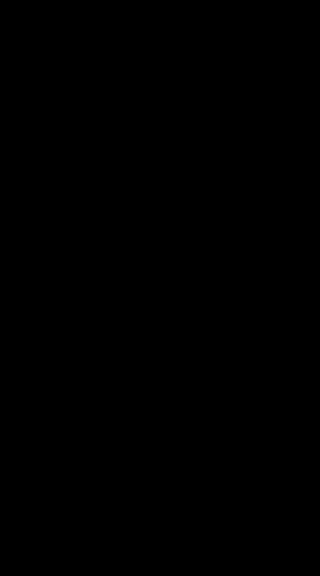

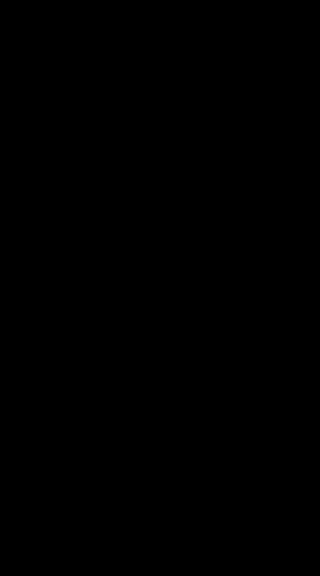

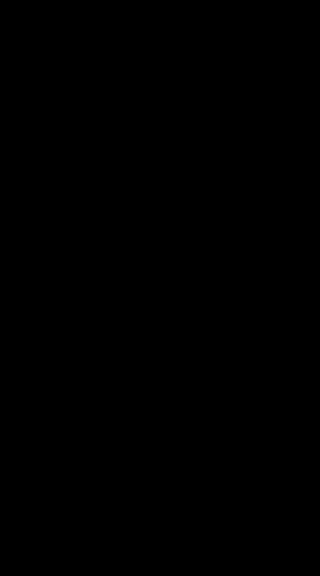

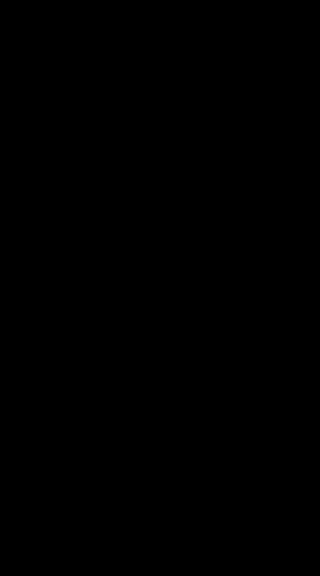

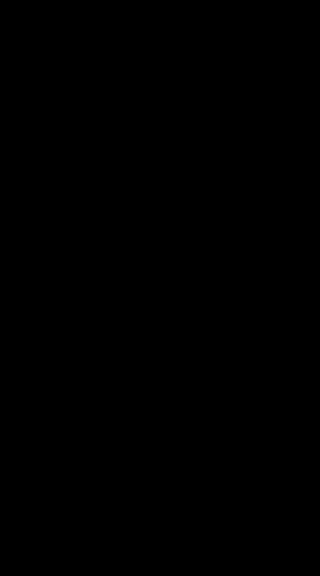

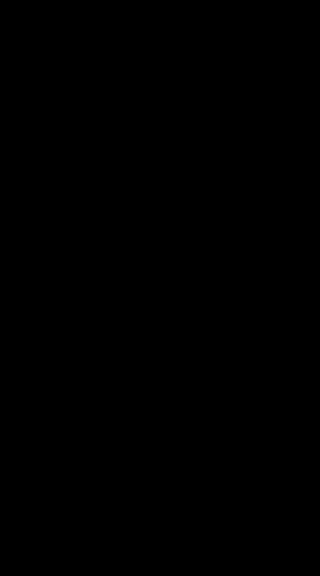

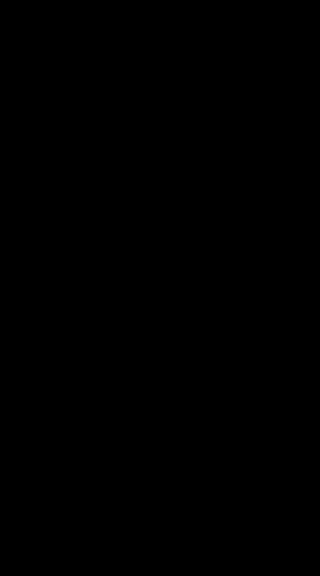

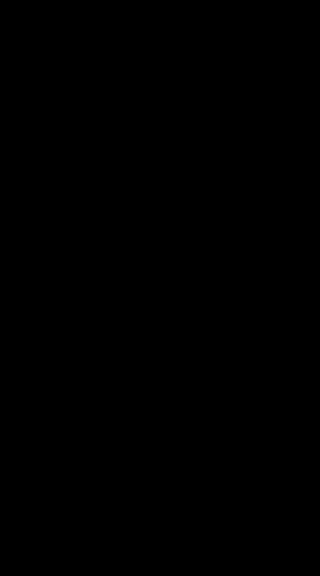

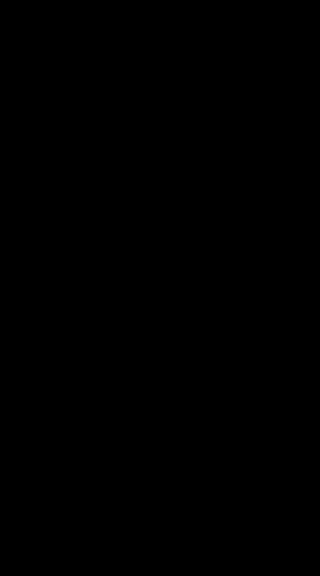

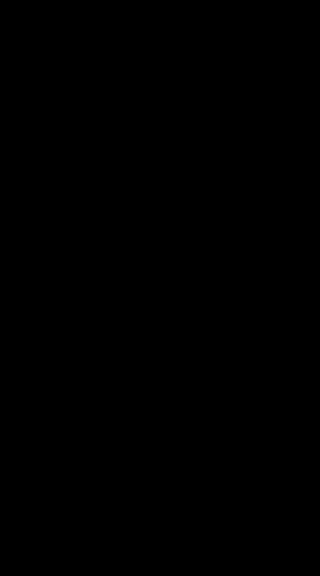

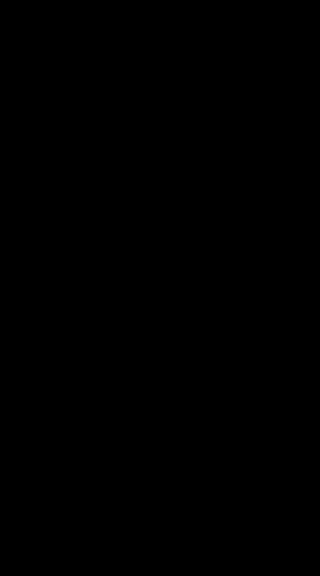

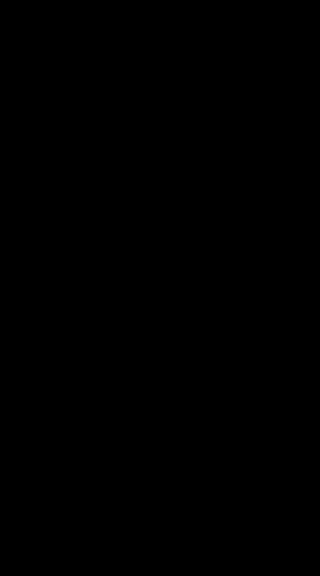

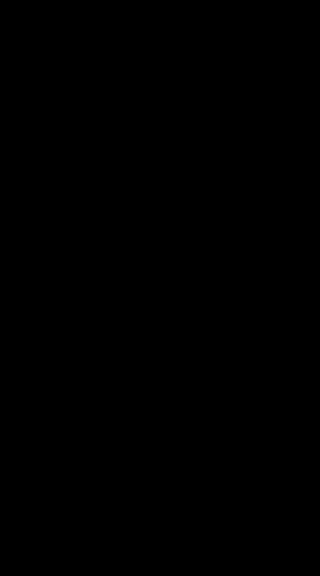

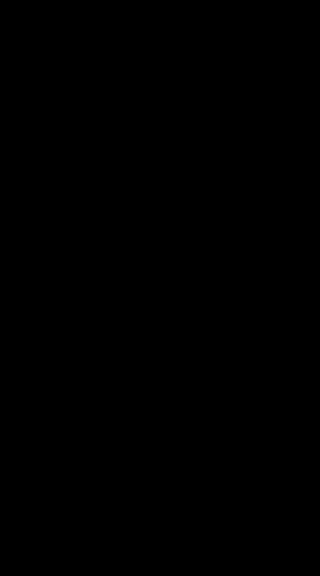

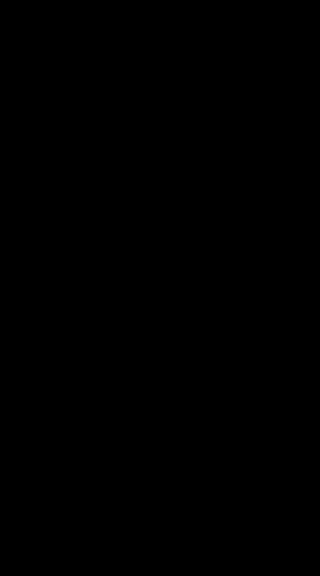

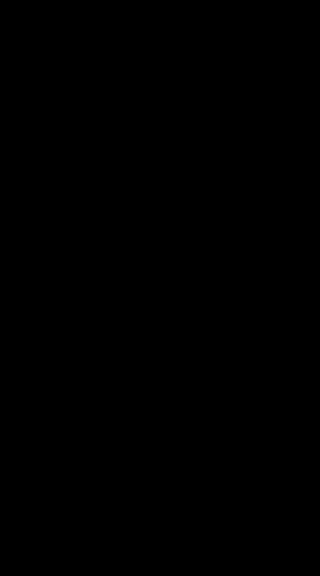

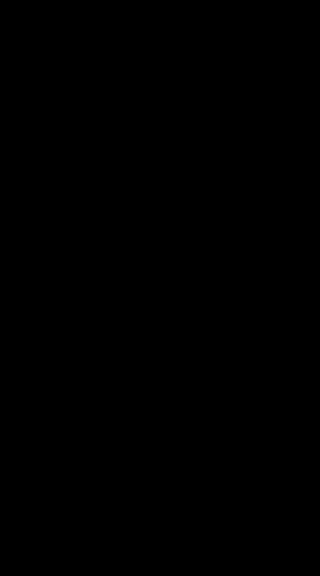

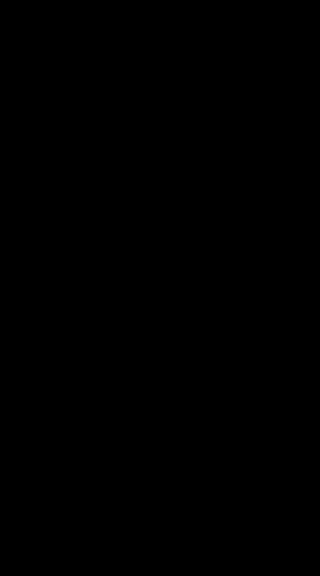

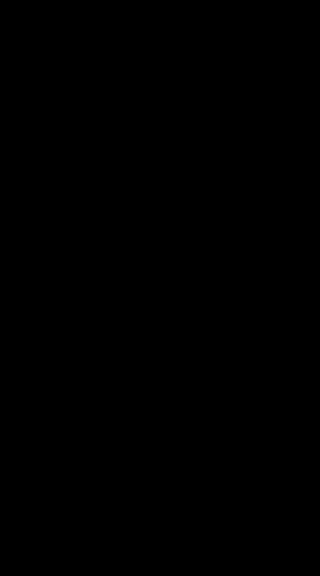

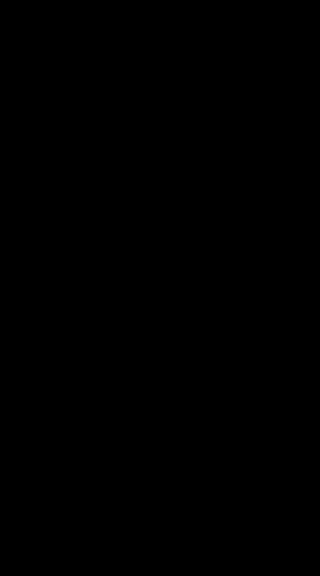

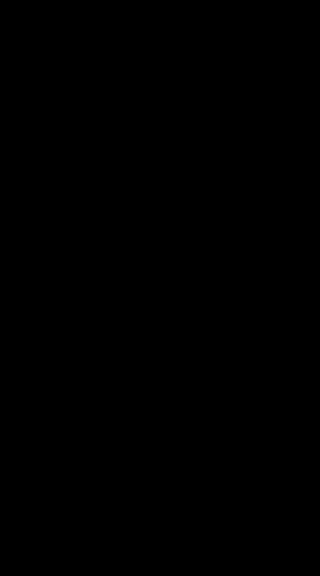

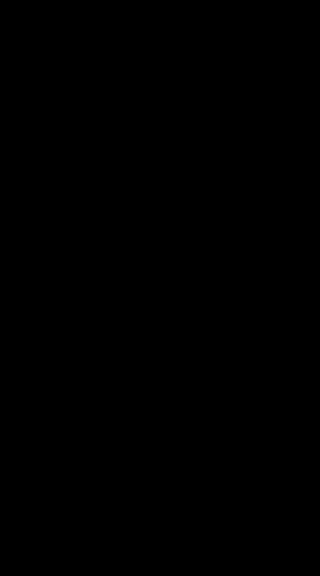

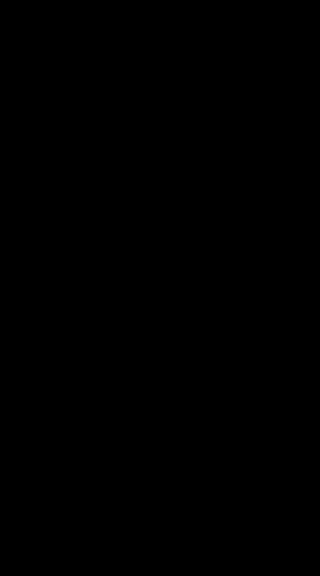

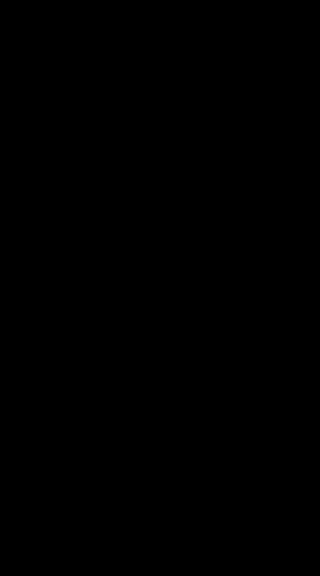

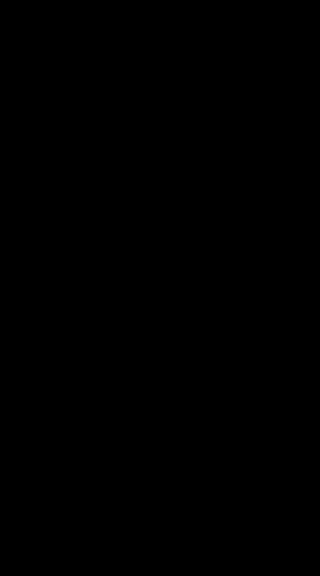

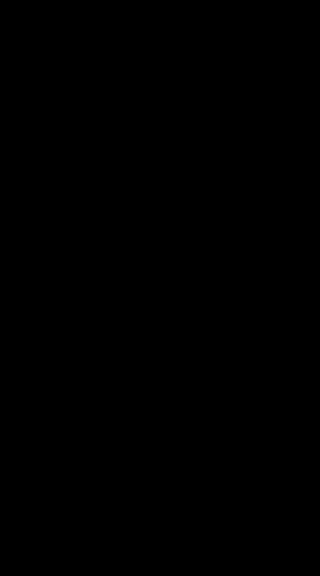

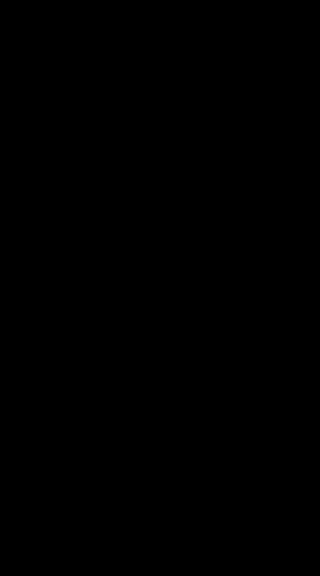

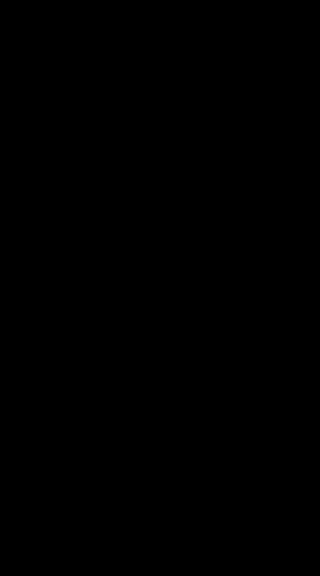

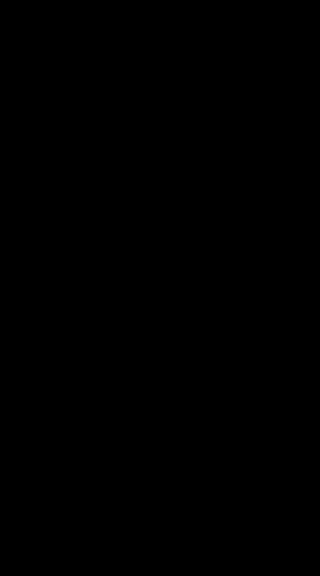

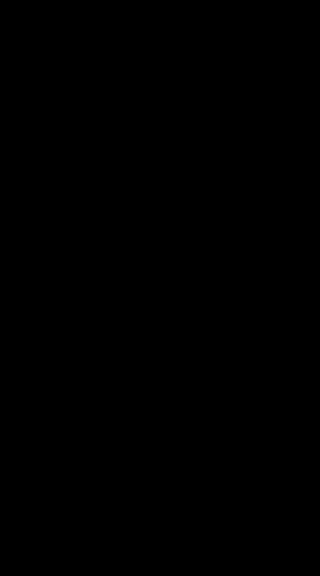

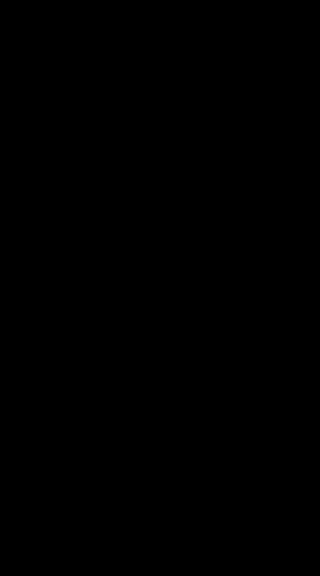

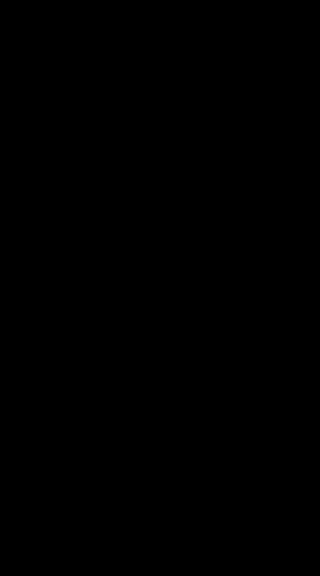

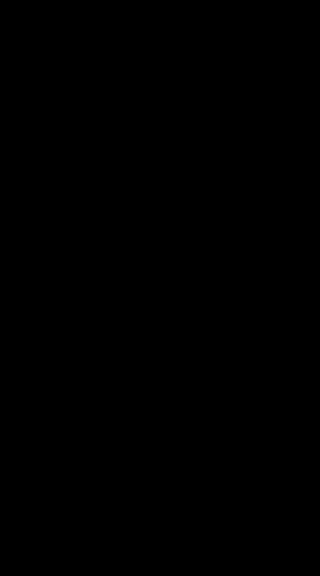

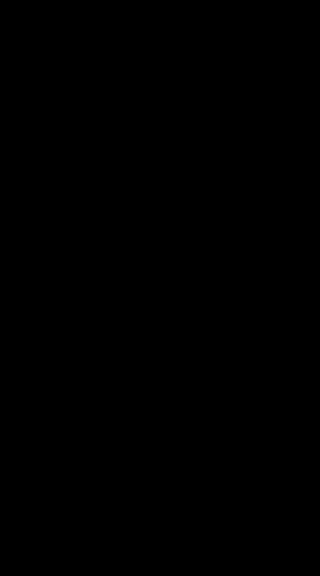

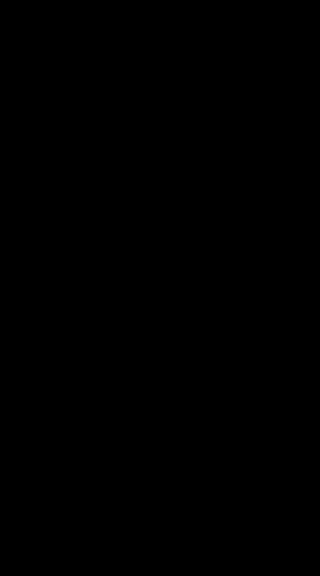

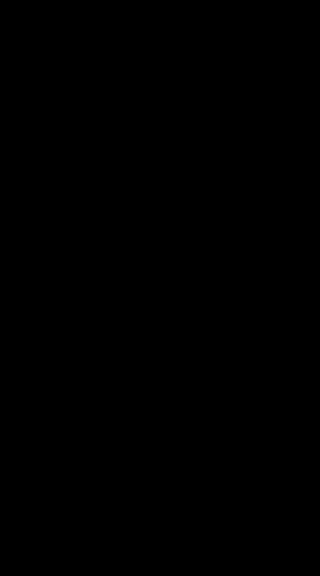

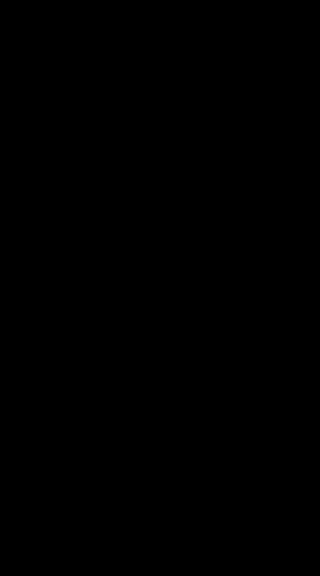

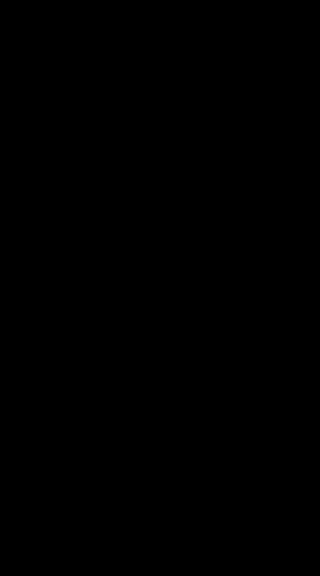

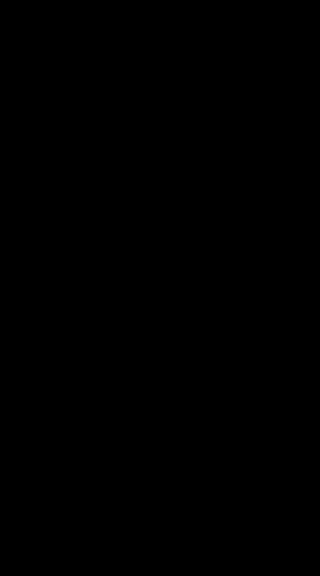

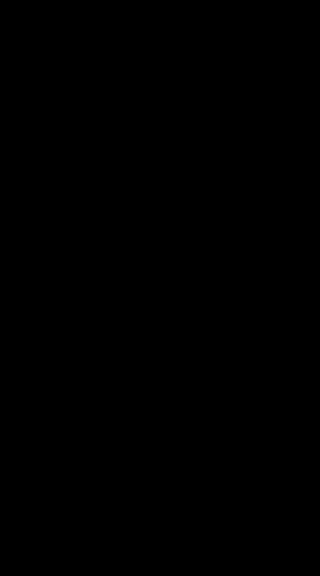

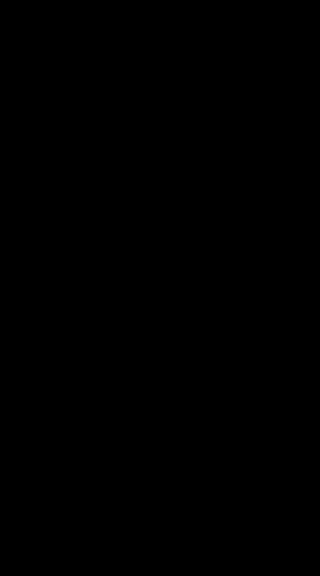

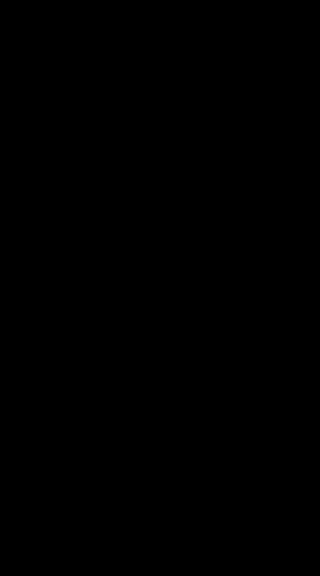

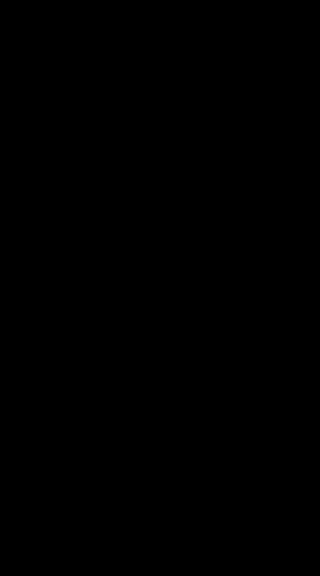

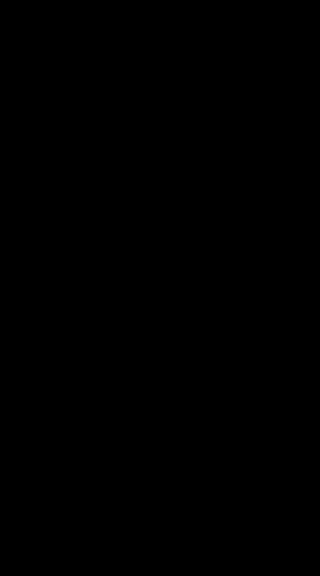

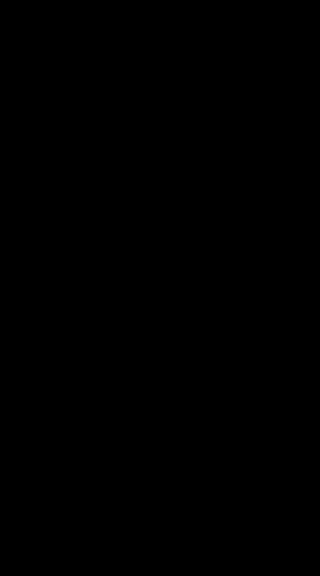

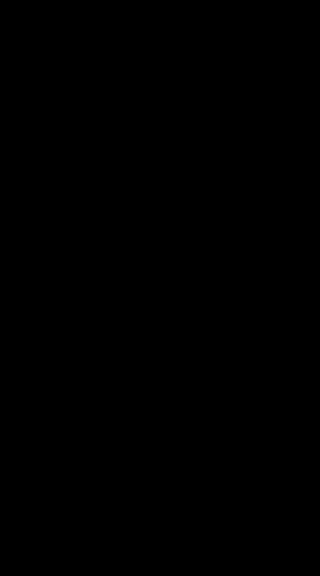

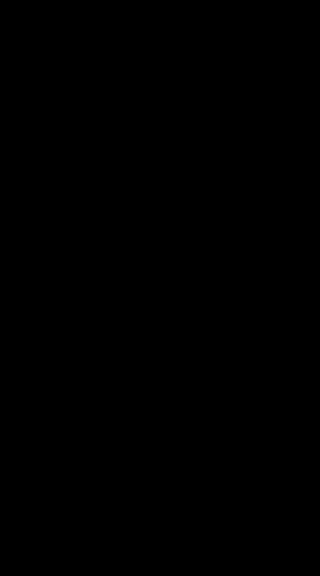

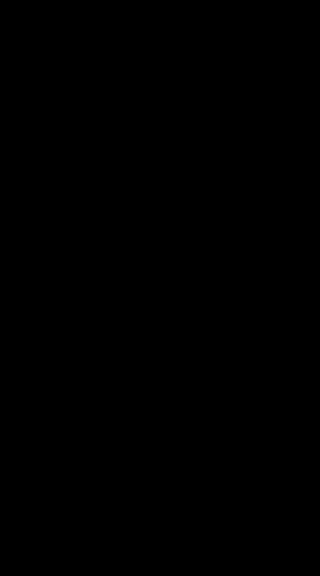

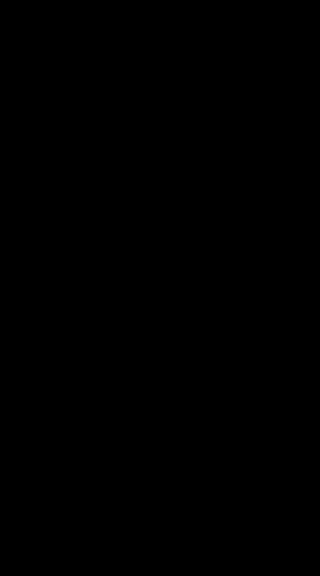

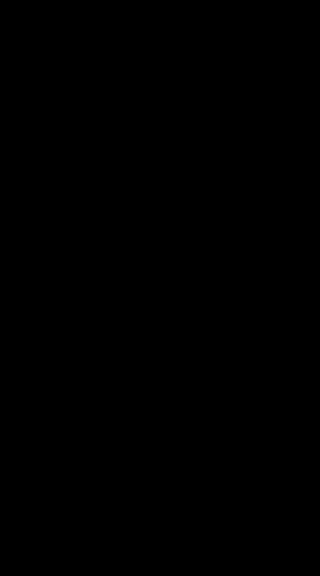

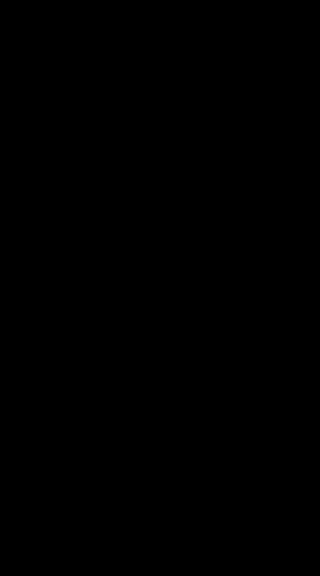

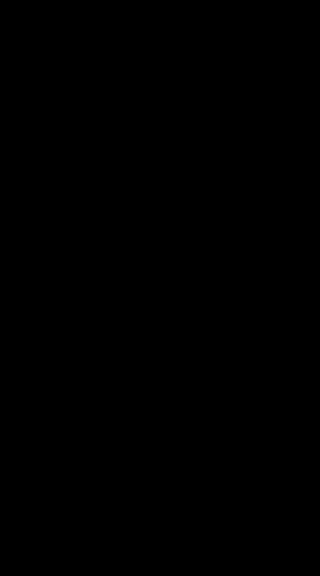

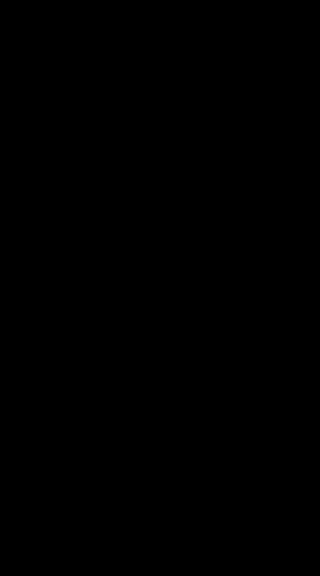

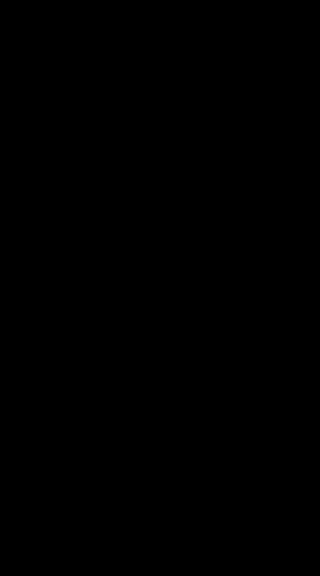

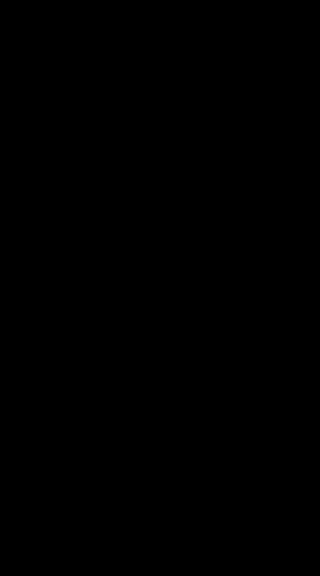

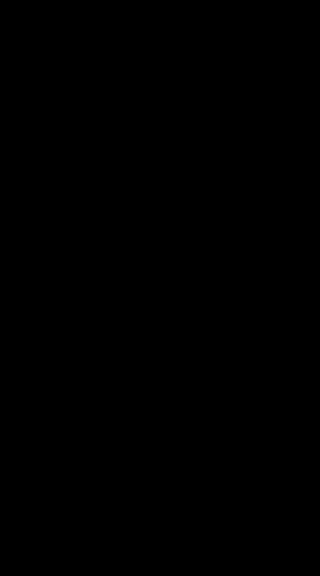

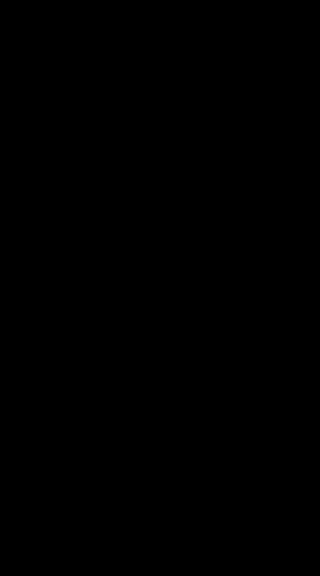

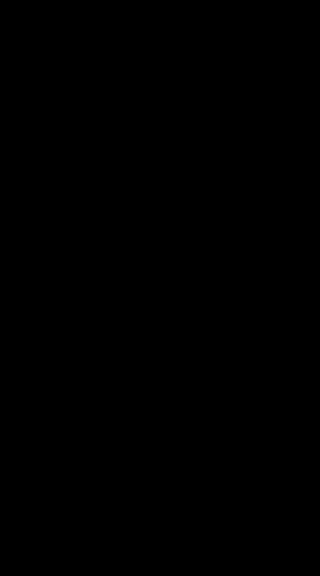

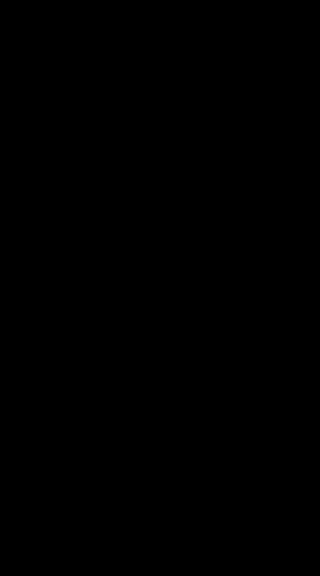

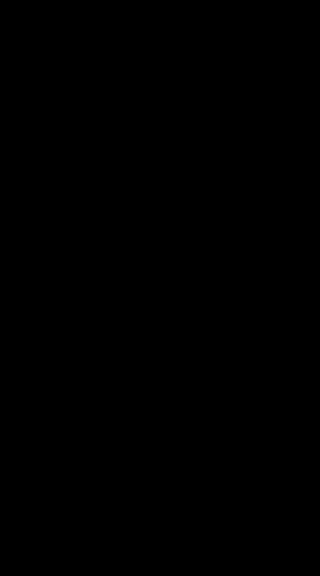

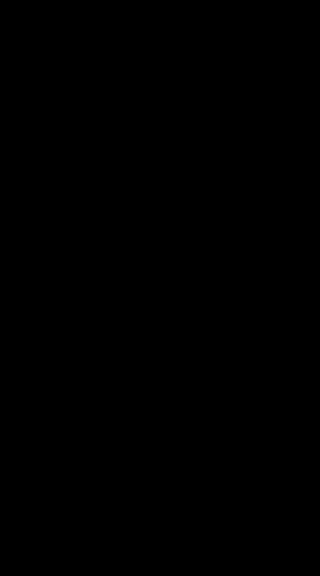

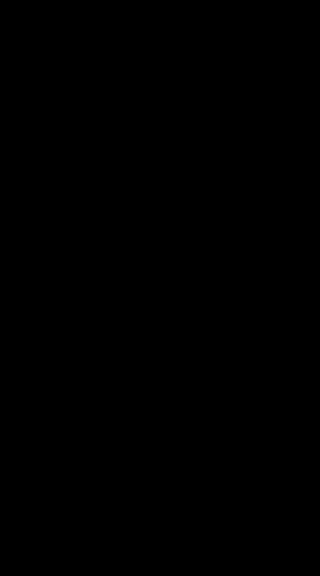

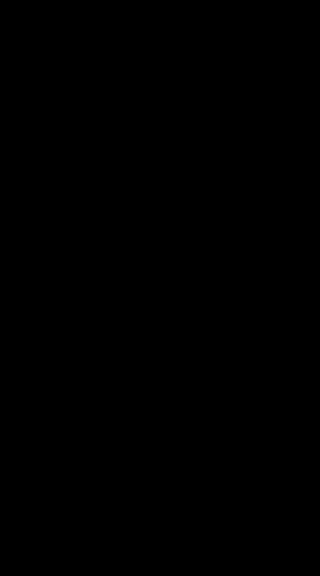

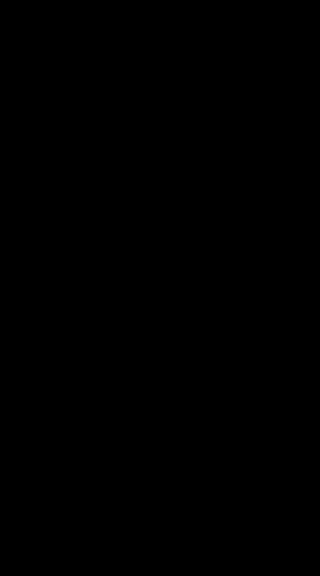

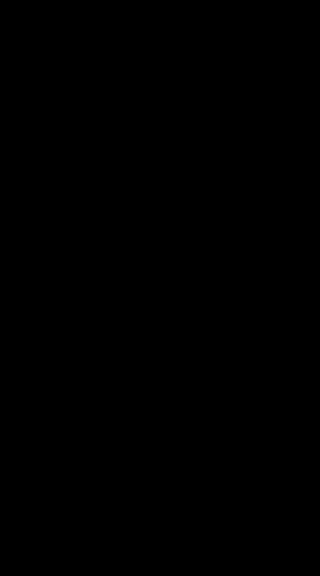

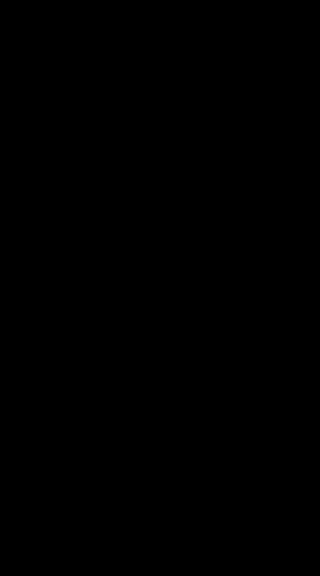

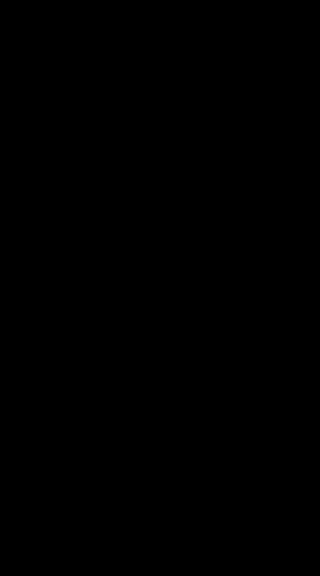

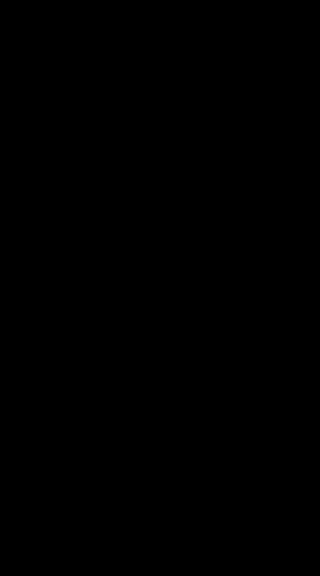

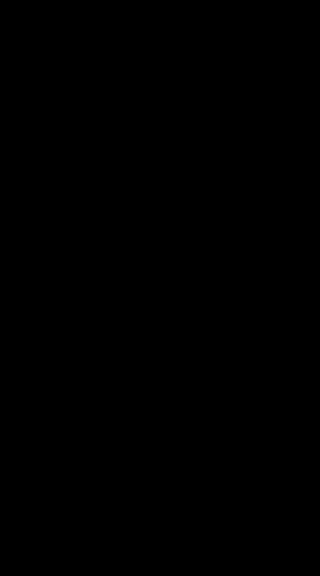

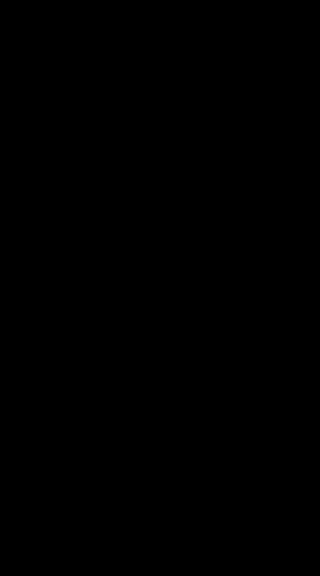

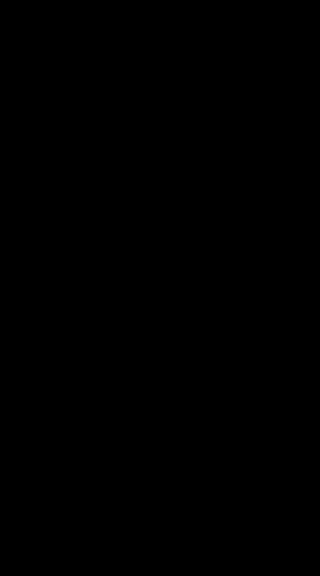

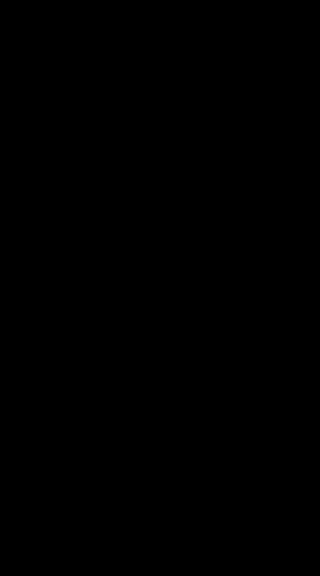

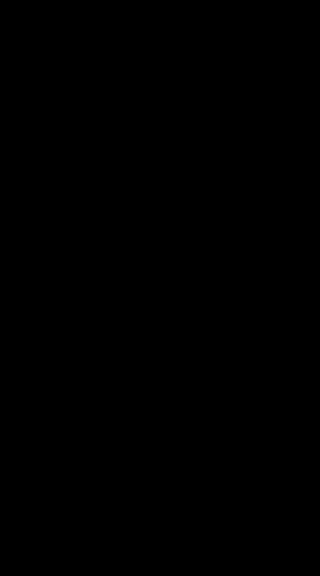

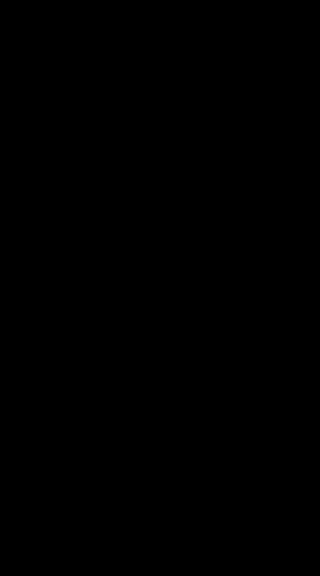

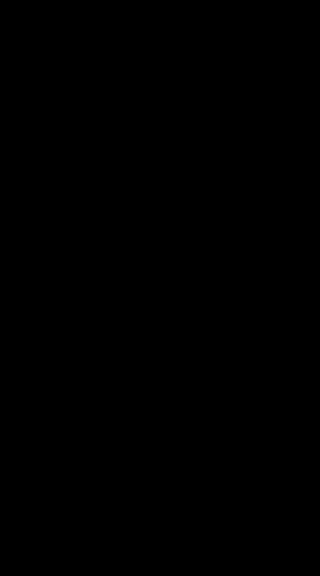

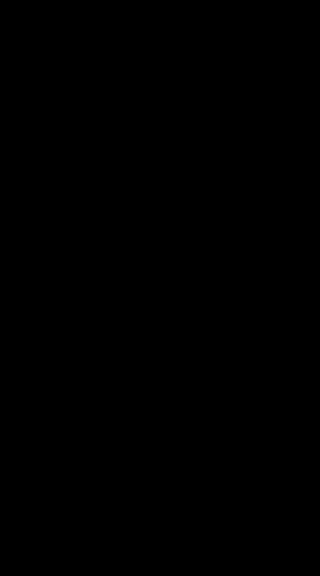

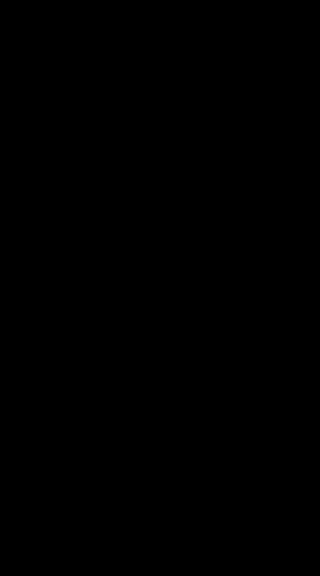

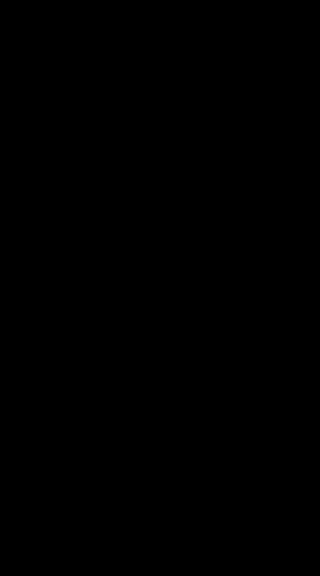

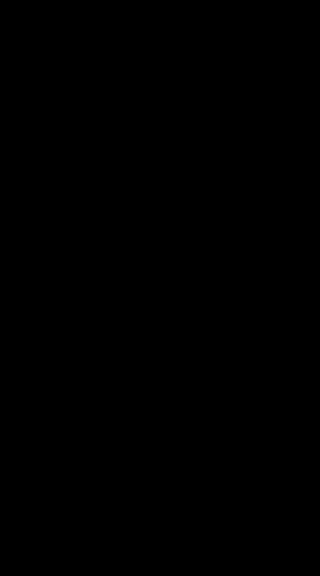

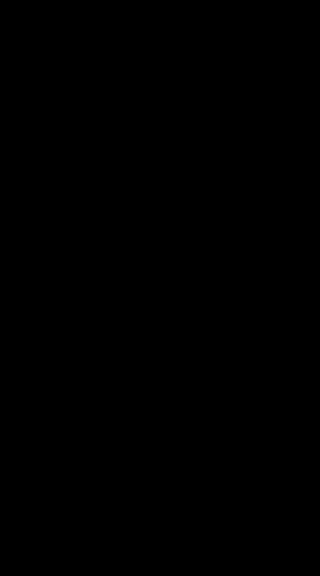

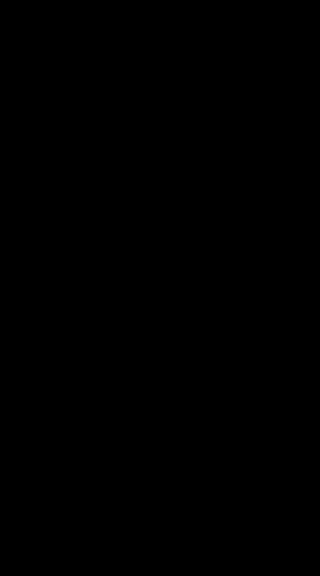

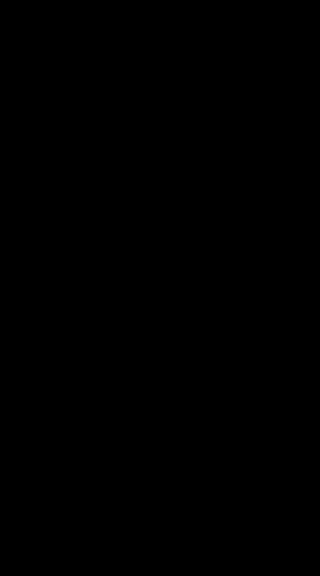

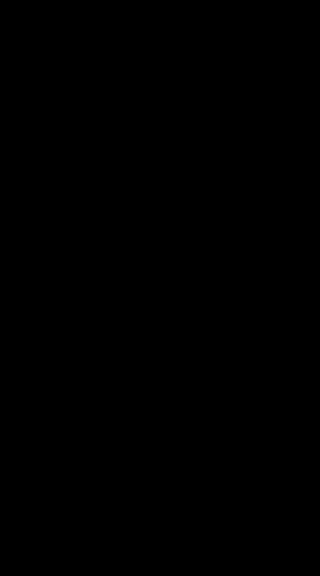

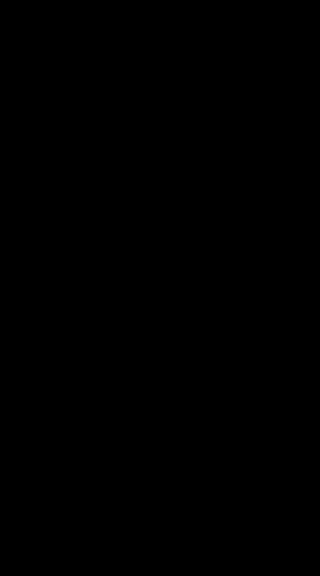

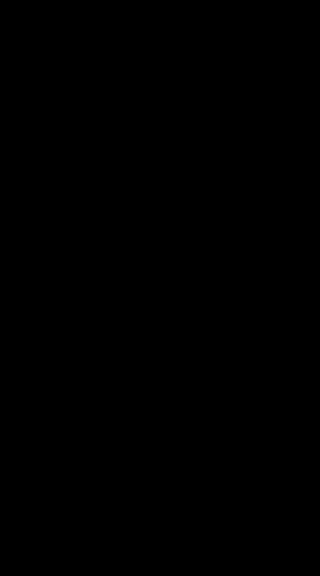

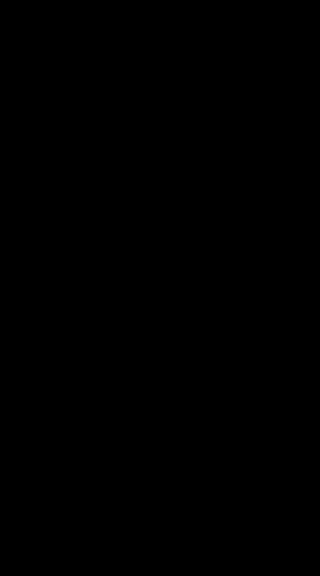

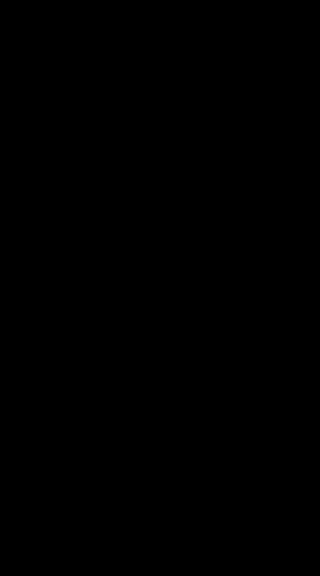

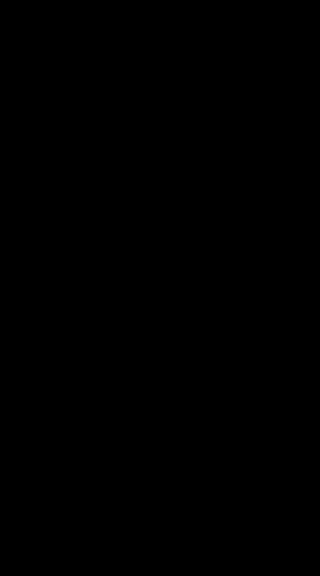

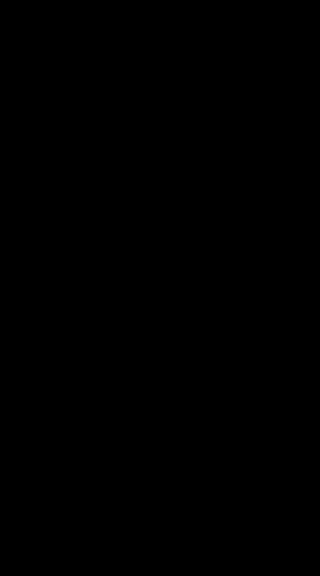

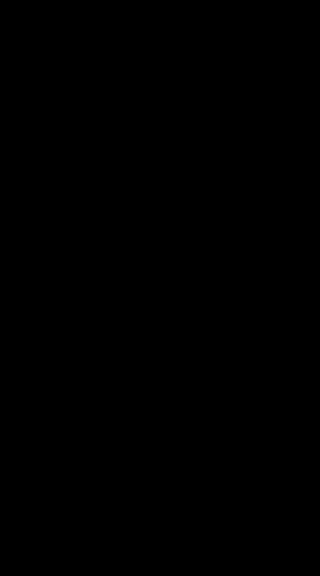

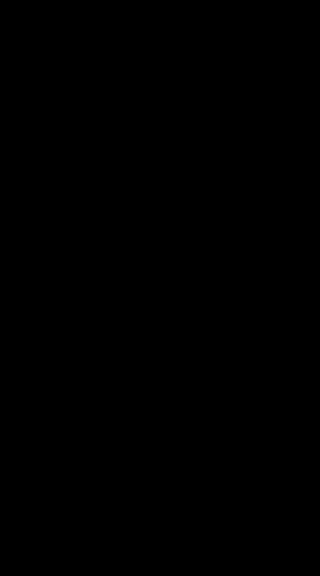

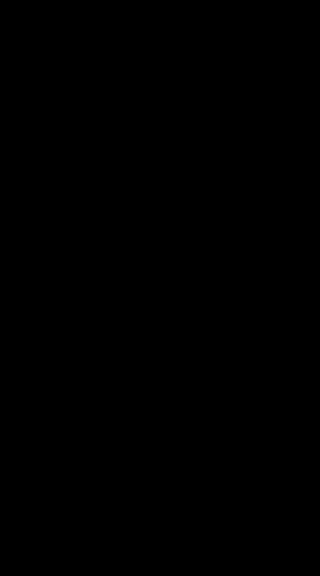

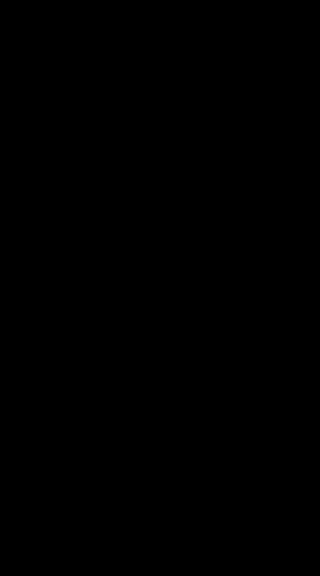

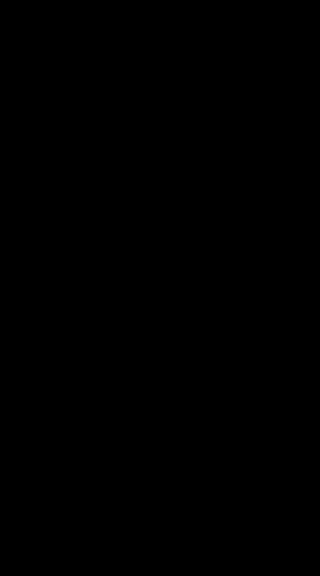

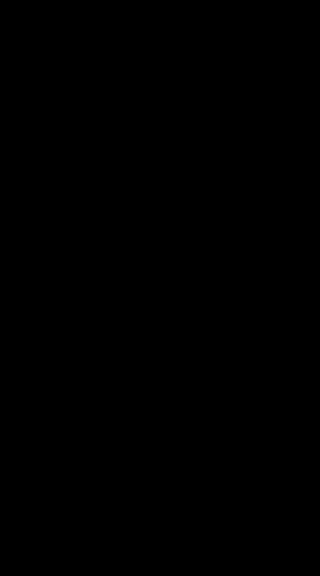

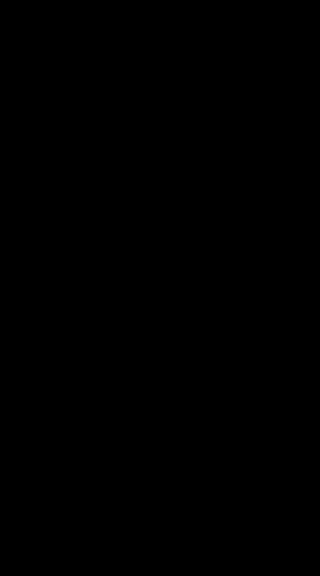

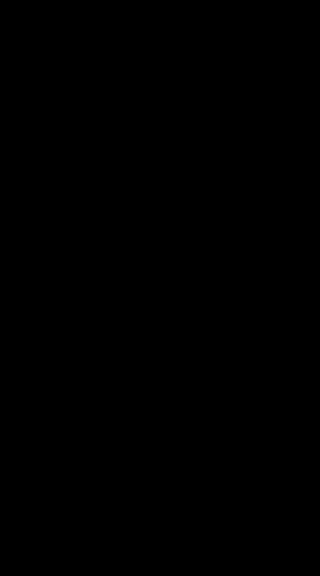

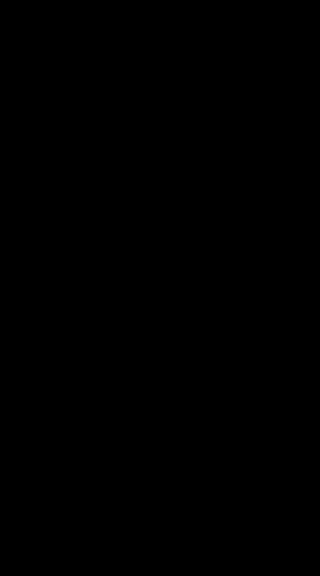

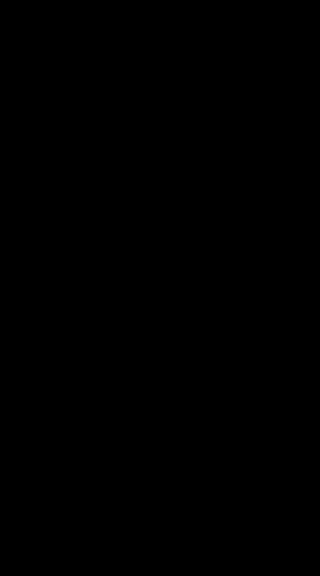

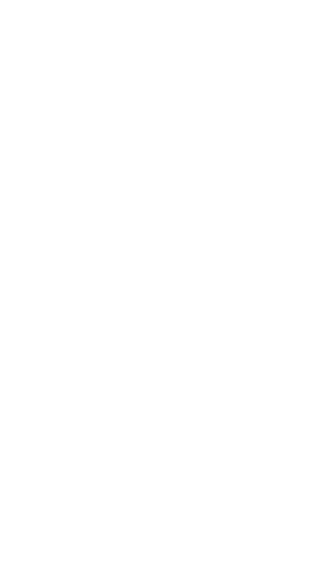

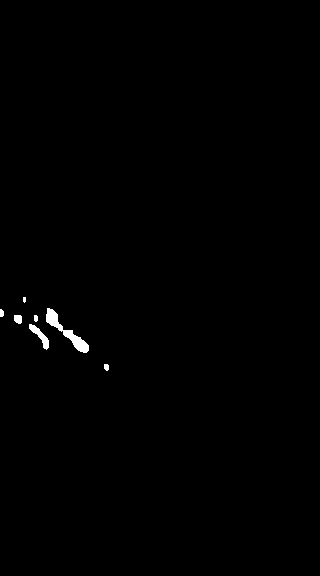

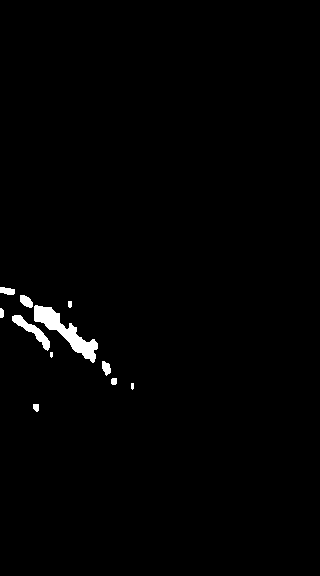

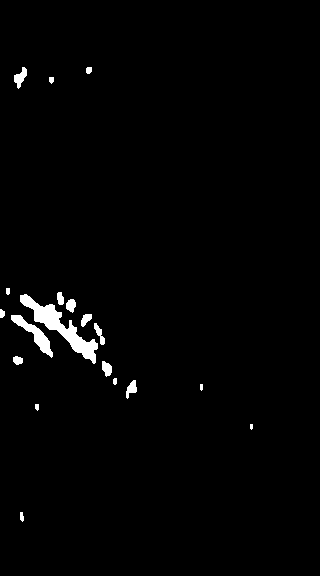

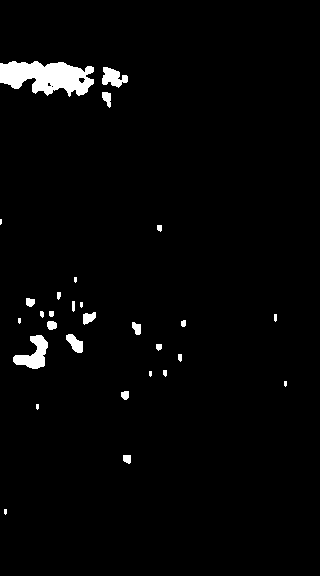

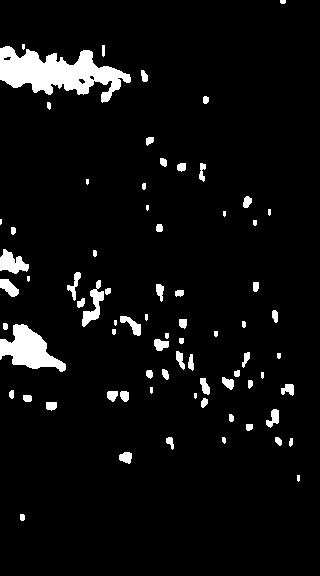

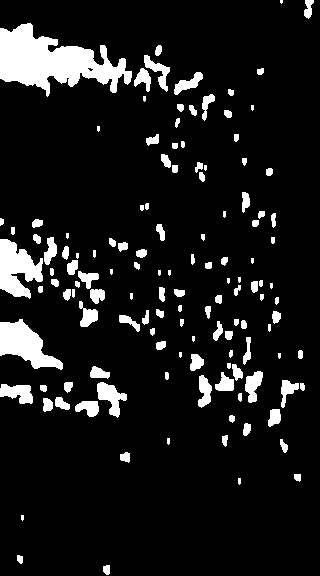

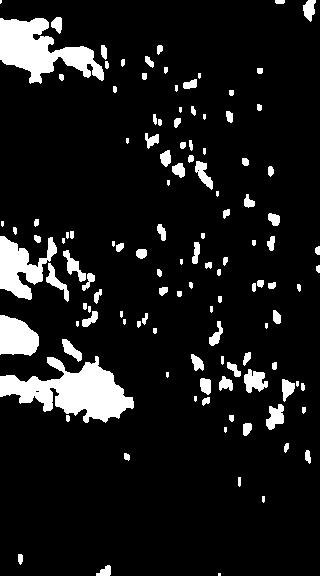

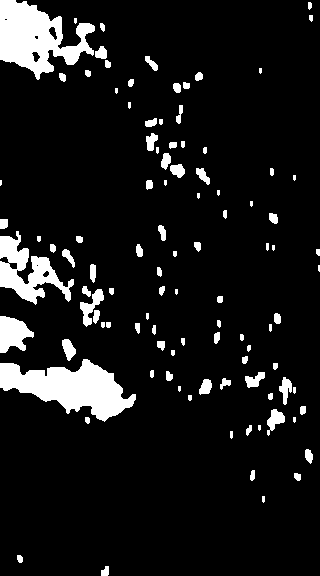

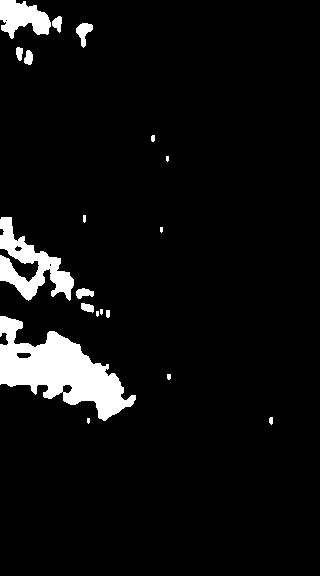

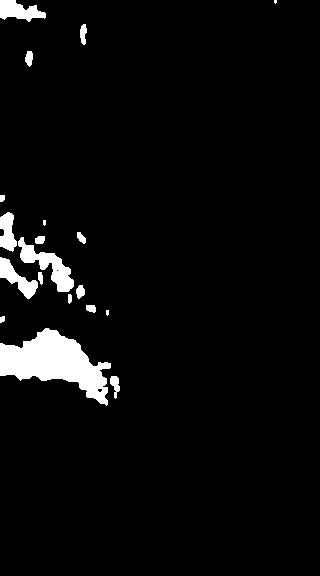

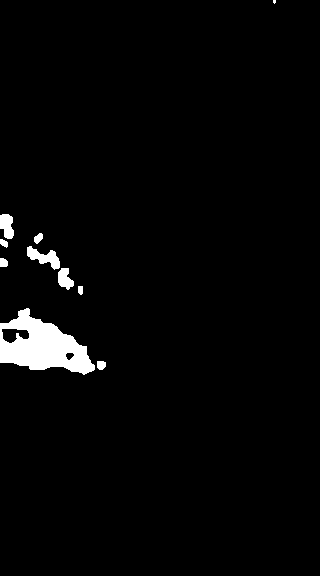

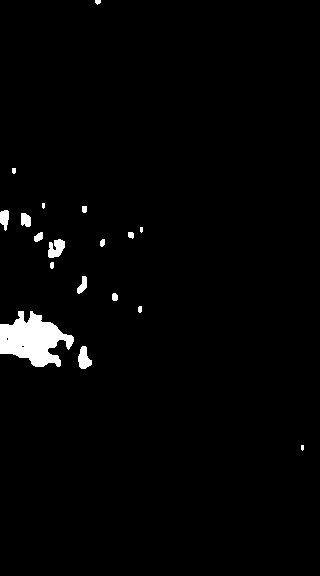

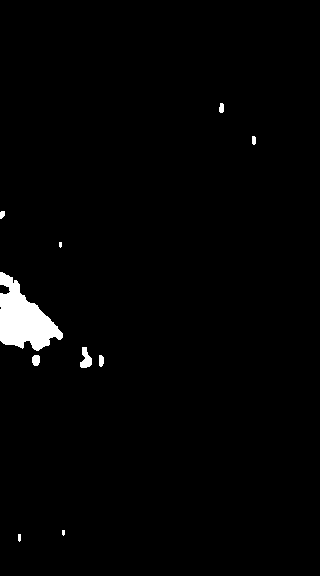

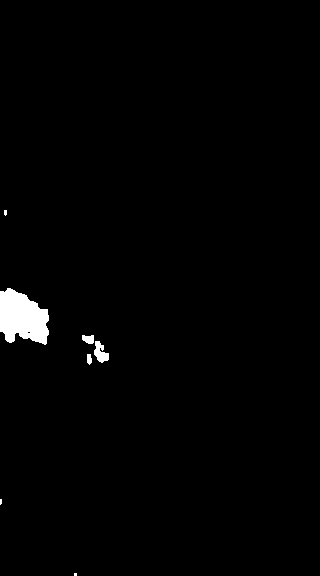

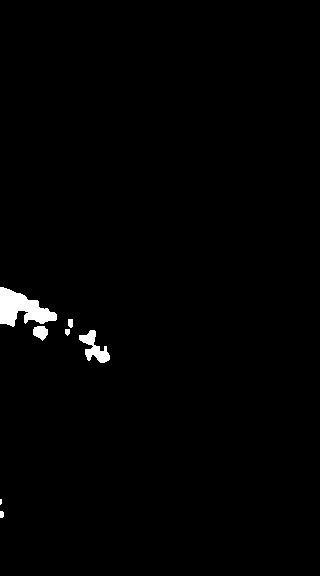

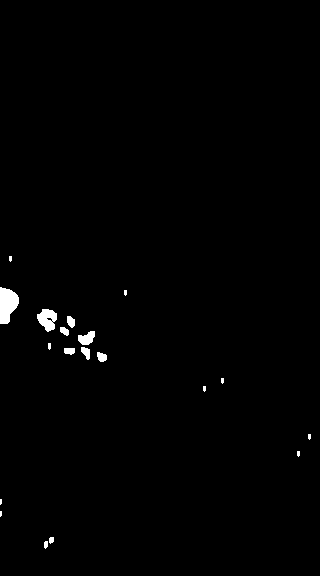

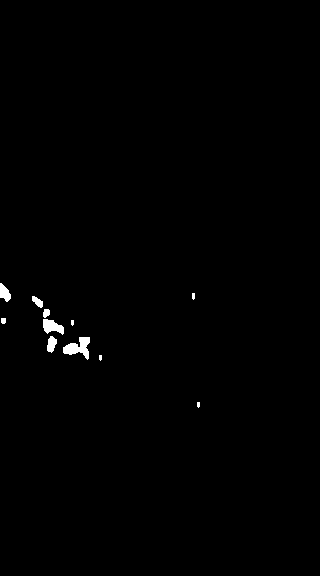

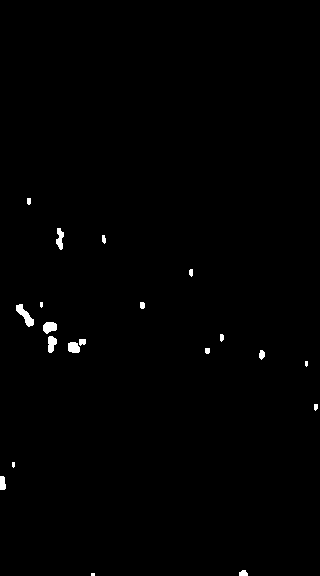

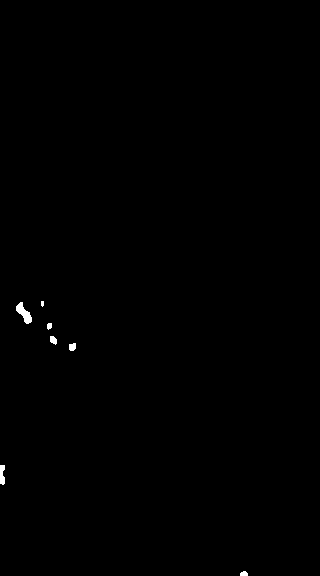

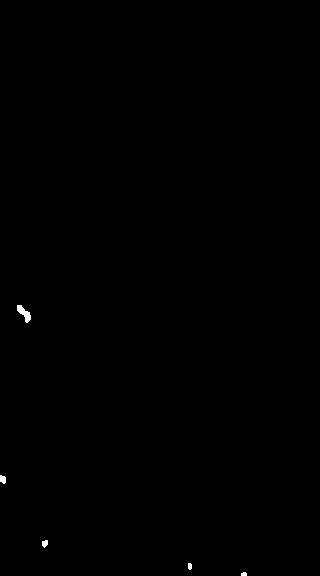

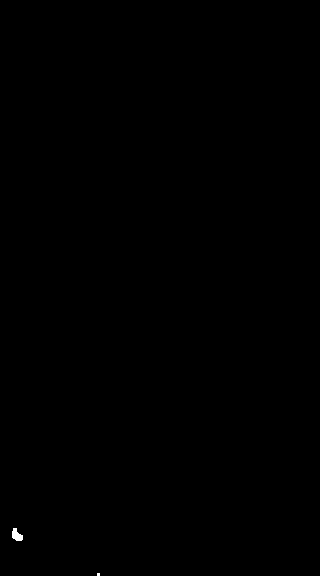

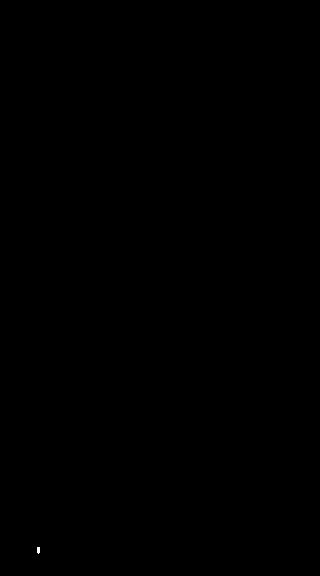

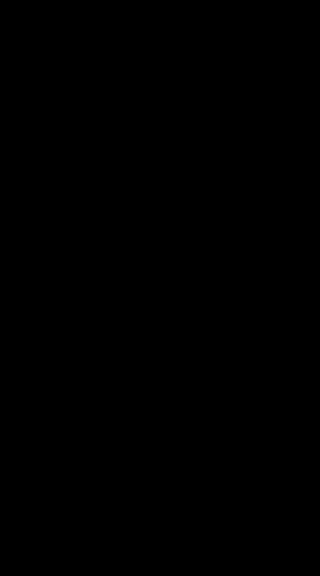

error: ignored

In [ ]:
cap = cv2.VideoCapture('video1-.mp4')

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,6))
fgbg = cv2.bgsegm.createBackgroundSubtractorGMG()

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)

    cv2_imshow(fgmask)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()